# <center>Credit Card Fraud Detection</center>
## <center>Submitted By: Jacob Simon Areickal </center>
## <center>Submitted On: 16 March 2024 </center>
## <center>Email ID: jareickal@arizona.edu </center>

__Problem Statement__

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyze customer-level data that has been collected and analyzed during a research collaboration between Worldline and Machine Learning Group.

The data set is taken from the Kaggle website and has a total of 284,807 transactions; out of these, 492 are fraudulent. Since the data set is highly imbalanced, it needs to be handled before model building.

__Business problem overview__
Retaining high profitable customers is the number one business goal for many banks. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust, and credibility, this is a concerning issue for both banks and customers alike.


It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, fraudulent transactions are occurring in new and different ways. This number is increasing rapidly.

In the banking industry, credit card fraud detection using machine learning is not just a trend. It is necessary for players in the industry to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping them reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

__Understanding and defining fraud__

Credit card fraud is any dishonest act or behavior whose goal is to obtain information without proper authorization from the account holder for financial gain. Among different ways of committing fraud, skimming is the most common one, which is a way of duplicating information located on the card’s magnetic strip. A few other ways are given below:

●     Manipulation/alteration of genuine cards

●     Creation of counterfeit cards

●     Stealing/loss of credit cards

●     Fraudulent telemarketing

__Data dictionary__

The data set includes credit card transactions made by European cardholders for 2 days in September 2013. Out of the 284,807 transactions in total, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from “time” and “amount,” all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature “time” contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature “amount” is the transaction amount. The feature “class” represents class labeling, and it takes the value of 1 in cases of fraud and 0 in others.

__Project pipeline__

The project pipeline can be briefly summarized in the following four steps:

●     Data understanding: Here, you need to load the data and understand the features present in it. This would help you choose the features that you will need for your final model.

●     Exploratory data analytics (EDA): Usually, in this step, you need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, you need not perform Z-scaling. However, you can check whether there is any skewness in the data and try to mitigate it, as it might cause problems during the model building phase.

●     Train/Test split: Now, you are familiar with the train/test split that you can perform to check the performance of your models with unseen data. Here, for validation, you can use the k-fold cross-validation method. You need to choose an appropriate k value so that the minority class is correctly represented in the test folds.

●     Model building / hyperparameter tuning: This is the final step where you can try different models and fine-tune their hyperparameters until you get the desired level of performance on the given data set. You should try and check if you get a better model by various sampling techniques.

●     Model evaluation: Here, you need to evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is more important to identify fraudulent transactions accurately than non-fraudulent ones. Choose an appropriate evaluation metric that reflects this business goal.


## Notebook Specifications

This Jupyter Notebook is executed on the following specifications:

- **Operating System:** Windows 10
- **Python Version:** 3.8.5
- **Jupyter Version:** 6.2.0
- **Processor:** Intel Core i9-13900K
- **CPU Cores:** 24 Cores 32 Threads
- **RAM:** 32 GB DDR5
- **Notebook Runtime Date:** February 12, 2024

__Note__: The notebook has been completely executed on my local system (My system specifications given above). The training time can highly differ based on the system specifications on which the notebook has been run. I have tested some models on Google Collab where it took more than 2 hours to finish but my local system completed the same in less 15 minutes, possibly due to the high core count of i9 chip.

In [1]:
import numpy as np
import pandas as pd
from enum import Enum
import joblib
import os
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report, roc_curve, f1_score, precision_recall_fscore_support, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn import over_sampling
from imblearn.metrics import sensitivity_specificity_support

from scipy.stats import skew

In [2]:
# Setting a default theme for Seeaborn plots

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [3]:
# Constant values/params used for plotting
SCATTER_PLOT_PALLETTE = {0: 'blue', 1: 'red'}
SCATTER_LEGEND_LABELS = ['0: Non-Fraudulent', '1: Fraudulent']
SNS_DEFAULT_FIG_SIZE = (15, 7)

MODEL_RANDOM_STATE = 42

BASE_PROJECT_FOLDER = 'D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)'
DRIVE_MODEL_FOLDER = os.path.join(BASE_PROJECT_FOLDER, 'Saved Models')
DATASET_FOLDER = os.path.join(BASE_PROJECT_FOLDER, 'creditcard.csv') 

In [4]:
df = pd.read_csv(DATASET_FOLDER)
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory Data Analysis (EDA)


---



In [6]:
def annotate_plot(ax, rotation:int = 0) -> None:
    '''
    This is a helper function to annotate plots. This function when given an axis object annotates plots
    Inputs:
    ax: Axis object

    Returns None
    '''
    for p in ax.patches:
      ax.annotate(f'{p.get_height()}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 5),
                  textcoords='offset points', rotation=rotation)

In [7]:
def get_legend_handlers_from_palette(palette: dict) -> list:
    '''
    This helper fucntion returns the legend handlers when given palette as input

    Input:
    palatte: A dict object

    Returns:
    list containing lengend handlers
    '''
    return [Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10) for i in palette]

Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(f'The percentage of non fraudulent transactions is {normal_share}% and fradulent transactions is {fraud_share}%')

The percentage of non fraudulent transactions is 99.82725143693798% and fradulent transactions is 0.1727485630620034%


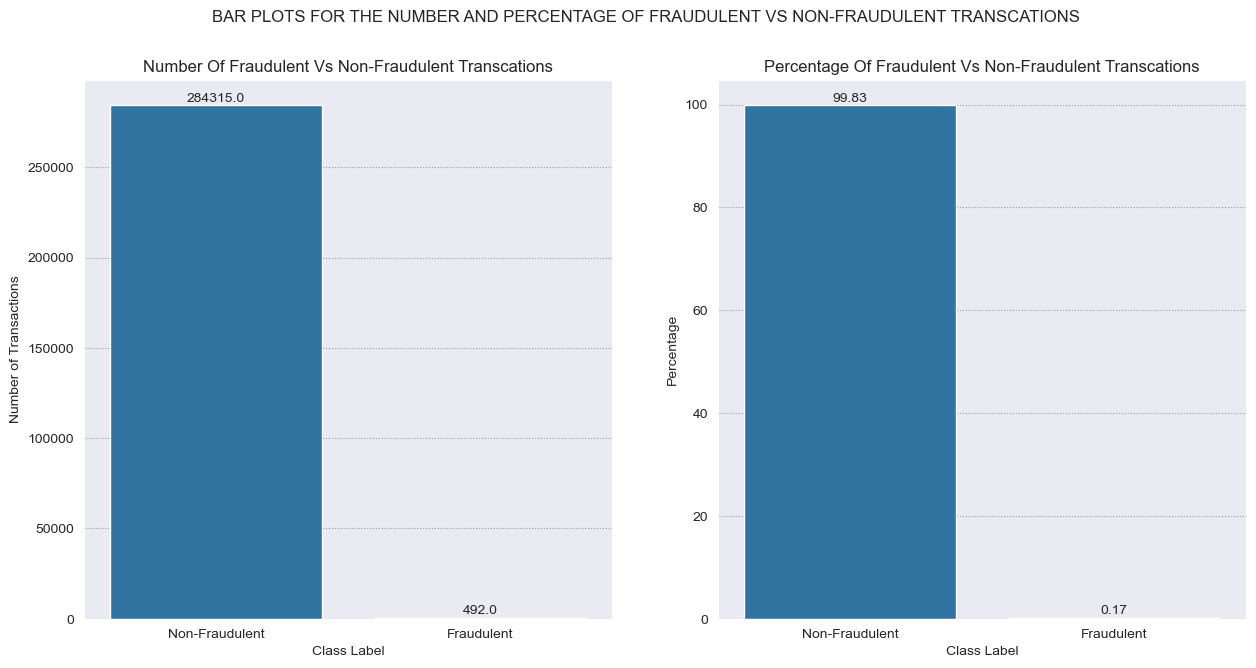

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

def plot_fraud_distribution(df: pd.DataFrame) -> None:
    '''
    Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transactions.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing the 'Class' column indicating fraud (1) or not fraud (0).

    Returns:
    --------
    None

    Example:
    --------
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming your DataFrame is named 'df'
    plot_fraud_distribution(df)
    '''
    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    plt.subplot(1,2,1)
    number_transactions = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Count':[classes[0], classes[1]]}
    df_fraud_count = pd.DataFrame(number_transactions)
    ax = sns.barplot(x='Class',y='Count', data=df_fraud_count)
    annotate_plot(ax)
    plt.ylabel('Number of Transactions')
    plt.xlabel('Class Label')
    plt.title('number of fraudulent vs non-fraudulent transcations'.title())

    plt.subplot(1,2,2)
    fraud_percentage = {'Class Label':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share.round(2), fraud_share.round(2)]}
    df_fraud_percentage = pd.DataFrame(fraud_percentage)
    ax = sns.barplot(x='Class Label',y='Percentage', data=df_fraud_percentage)
    annotate_plot(ax)
    plt.title('Percentage of fraudulent vs non-fraudulent transcations'.title())

    plt.suptitle('bar plots for the number and percentage of fraudulent vs non-fraudulent transcations'.upper())

    plt.show()

# Let us call the function we defined above to get our bar plot
plot_fraud_distribution(df)

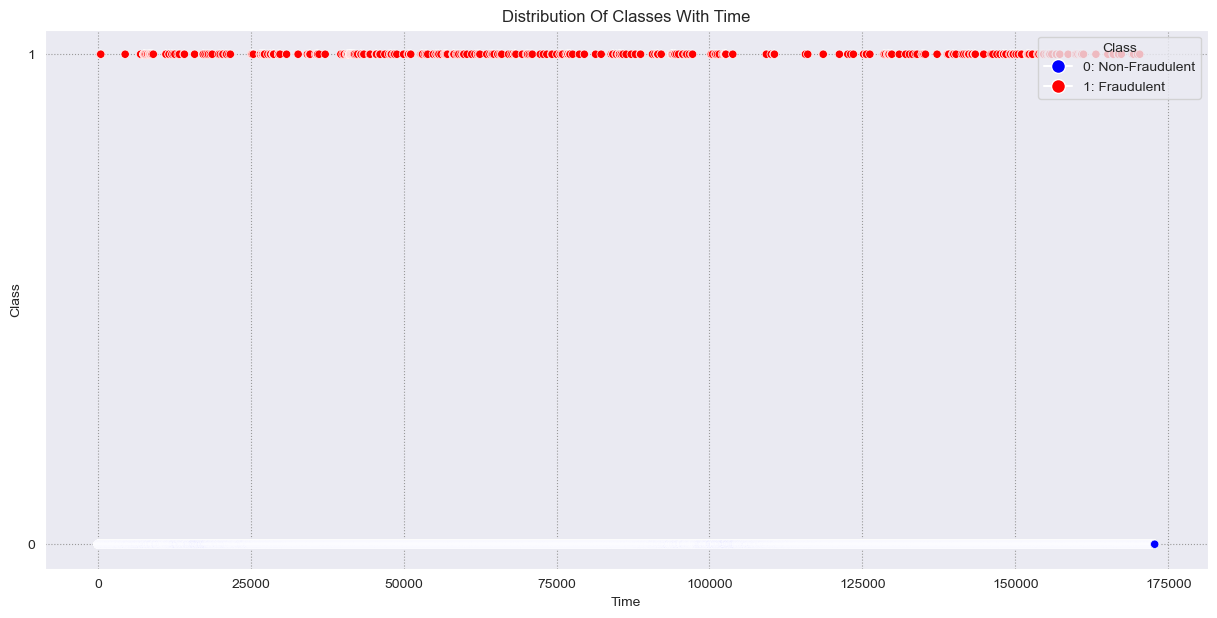

In [10]:
# Create a scatter plot to observe the distribution of classes with time

def plot_class_distribution_with_time(df: pd.DataFrame) -> None:
    """
    Create a scatter plot to observe the distribution of classes with time.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing the necessary columns, including 'Time' and 'Class'.

    Returns:
    --------
    None

    Example:
    --------
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming your DataFrame is named 'df'
    plot_class_distribution_with_time(df)
    """
    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    ax = sns.scatterplot(data=df, x='Time', y='Class', hue='Class', palette=SCATTER_PLOT_PALLETTE)
    plt.title('Distribution of Classes with Time'.title())
    # Setting y ticks explicitly since we have only 2 class labels
    plt.yticks([0, 1])
    # Setting custom legends to make plot easier to visualise
    ax.legend(get_legend_handlers_from_palette(SCATTER_PLOT_PALLETTE), SCATTER_LEGEND_LABELS, loc='upper right', title='Class')
    plt.show()

plot_class_distribution_with_time(df)

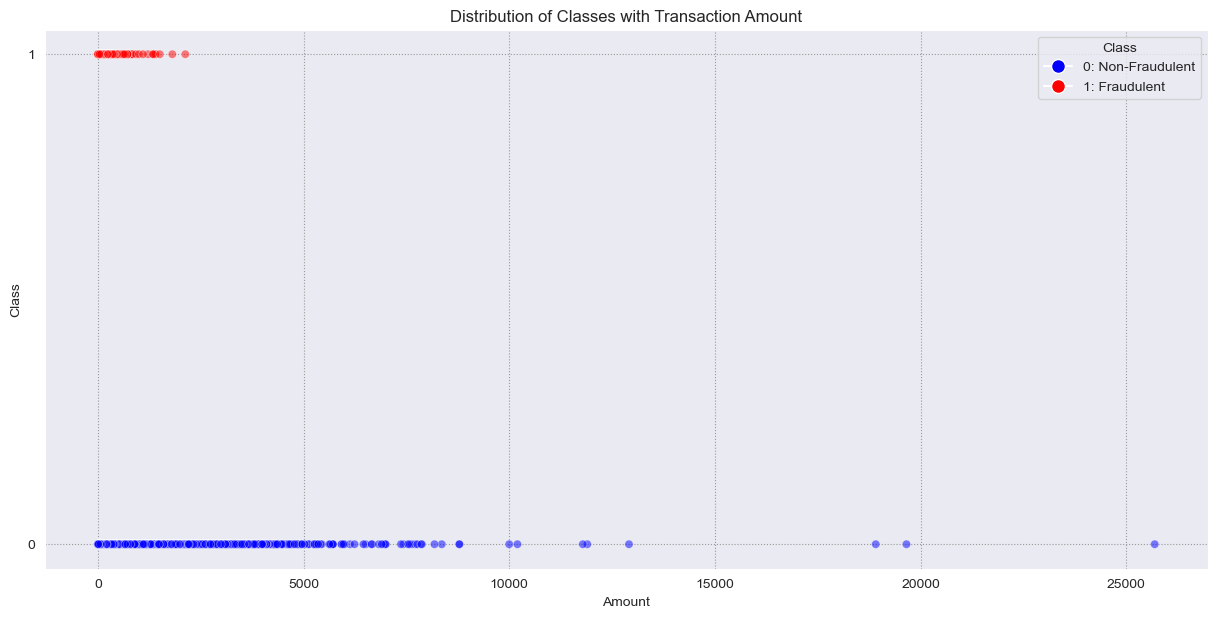

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
def scatter_plot_classes_with_amount(df: pd.DataFrame) -> None:
    """
    Create a scatter plot to observe the distribution of classes with the transaction amount.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing the necessary columns, including 'Amount' and 'Class'.

    Returns:
    --------
    None

    Example:
    --------
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming your DataFrame is named 'df'
    scatter_plot_classes_with_amount(df)
    """
    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    ax = sns.scatterplot(x='Amount', y='Class', data=df, alpha=0.5, hue='Class', palette=SCATTER_PLOT_PALLETTE)
    plt.title('Distribution of Classes with Transaction Amount')
    plt.xlabel('Amount')
    plt.ylabel('Class')
    # Setting y ticks explicitly since we have only 2 class labels
    plt.yticks([0, 1])
    # Setting custom legends to make plot easier to visualise
    ax.legend(get_legend_handlers_from_palette(SCATTER_PLOT_PALLETTE), SCATTER_LEGEND_LABELS, loc='upper right', title='Class')
    plt.show()

# Calling the function defined above to get the scatter plot
scatter_plot_classes_with_amount(df)

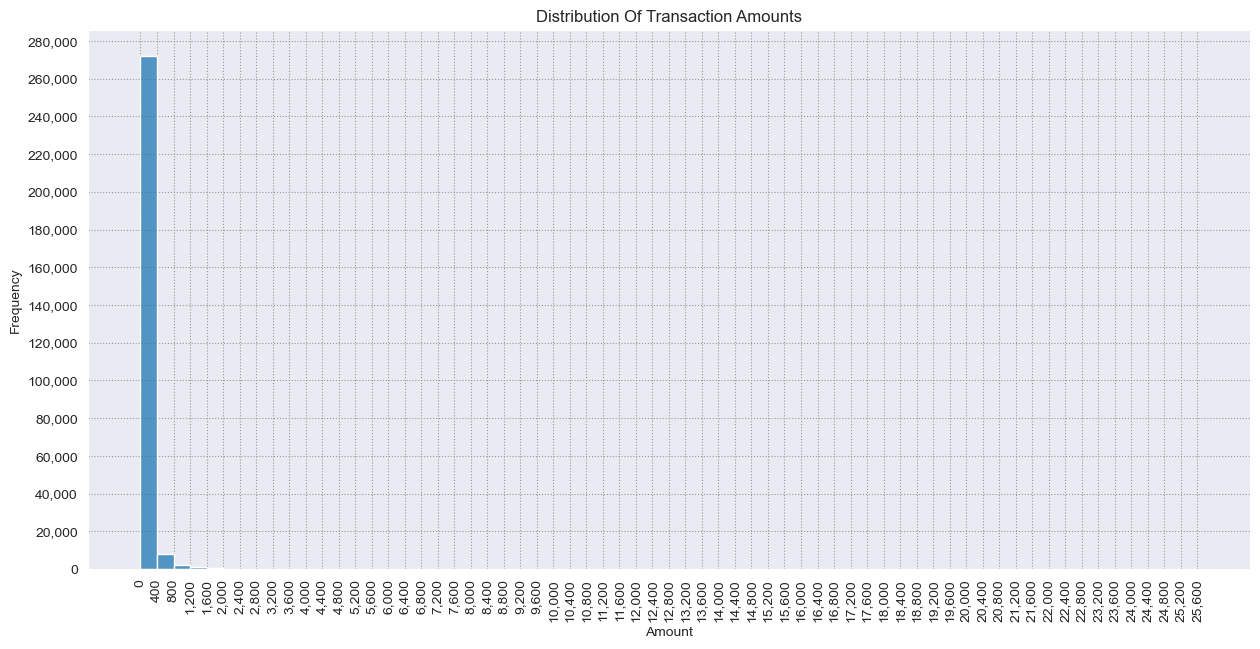

In [12]:
# A histogram to observe the distribution of transaction amounts
def plot_transaction_amount_distribution(dataframe: pd.DataFrame) -> None:
    """
    Create a histogram to observe the distribution of transaction amounts.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        Input DataFrame containing the 'Amount' column.

    Returns:
    --------
    None

    Example:
    --------
    # Assuming your DataFrame is named 'df'
    plot_transaction_amount_distribution(df)
    """
    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    custom_bins = list(range(0, 26000, 400))
    sns.histplot(dataframe['Amount'], bins=custom_bins, kde=False)
    # Set custom x-axis labels for better readability
    x_ticks = [f'{tick:,}' for tick in custom_bins]
    plt.xticks(custom_bins, x_ticks, rotation=90)
    plt.title('Distribution of Transaction Amounts'.title())
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    # Reduce y-axis ticks and labels for better readability
    y_ticks = range(0, 300000, 20000)
    plt.yticks(y_ticks, [f'{tick:,}' for tick in y_ticks])
    plt.show()

plot_transaction_amount_distribution(df)

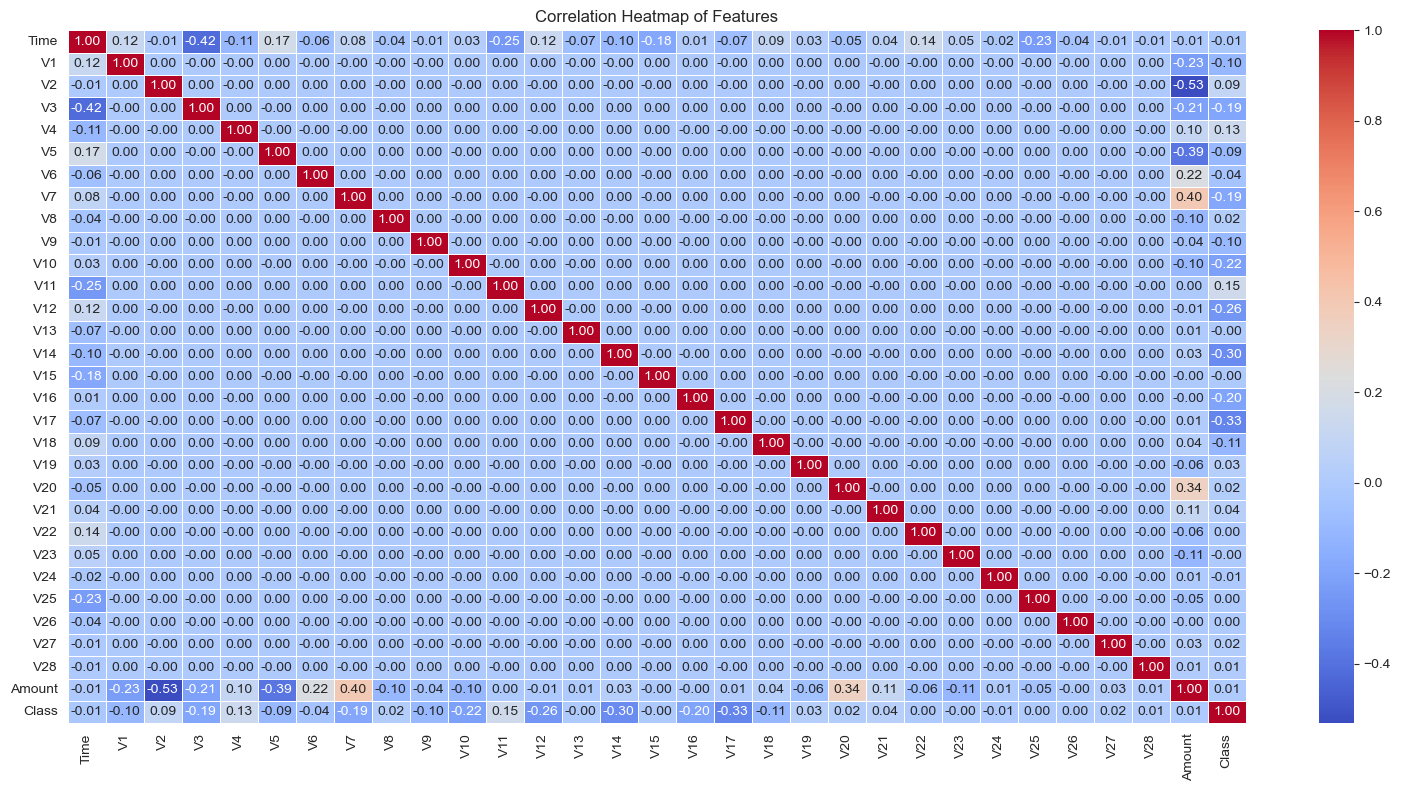

In [13]:
def plot_correlation_heatmap(dataframe):
    """
    Create a heatmap to visualize the correlation matrix of the features.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing features.

    Returns:
    --------
    None

    Example:
    --------
    # Assuming your DataFrame is named 'df'
    plot_correlation_heatmap(df)
    plt.show()
    """
    plt.figure(figsize=(SNS_DEFAULT_FIG_SIZE[0]+4, SNS_DEFAULT_FIG_SIZE[1]+2))
    correlation_matrix = dataframe.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Features')
    plt.show()

plot_correlation_heatmap(df)

Note: The below plots can take an approximate 2-5 minutes to complete since we have more than 2 lakh records in our dataset

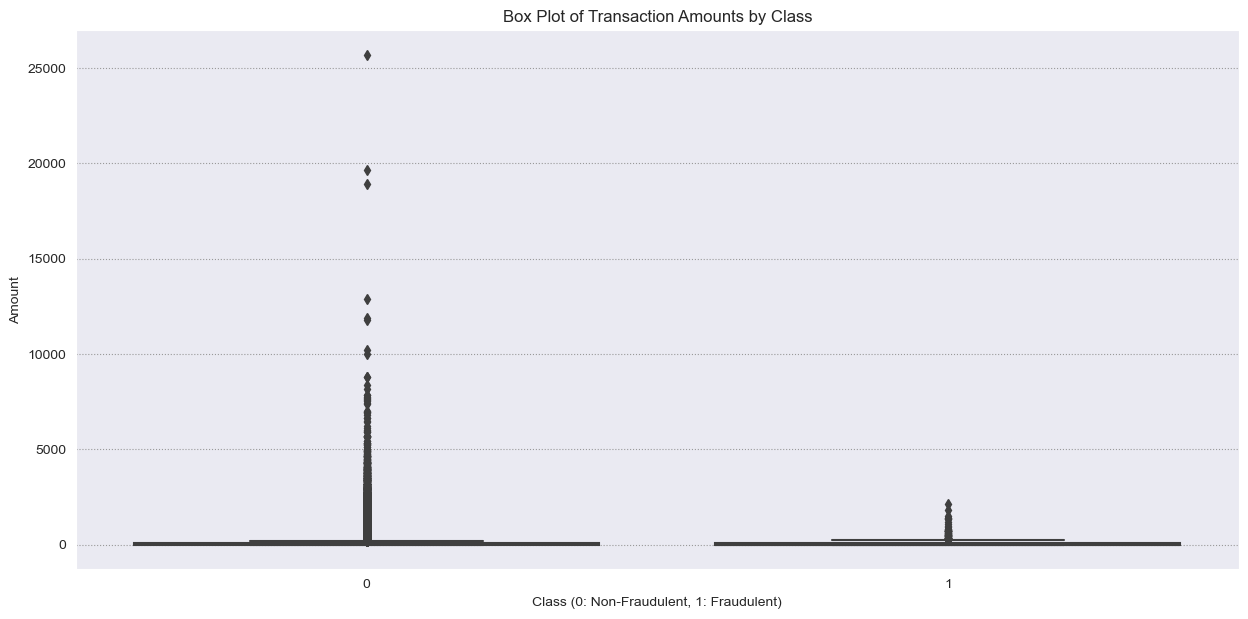

In [14]:
def plot_box_plot_amount_by_class(df: pd.DataFrame) -> None:
    """
    Create a box plot to visualize the distribution of transaction amounts by class.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing 'Amount' and 'Class' columns.

    Returns:
    --------
    None

    Example:
    --------
    # Assuming your DataFrame is named 'df'
    plot_box_plot_amount_by_class(df)
    """
    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    sns.boxplot(x='Class', y='Amount', data=df)
    plt.title('Box Plot of Transaction Amounts by Class')
    plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
    plt.ylabel('Amount')
    plt.show()

plot_box_plot_amount_by_class(df)

<Figure size 1500x700 with 0 Axes>

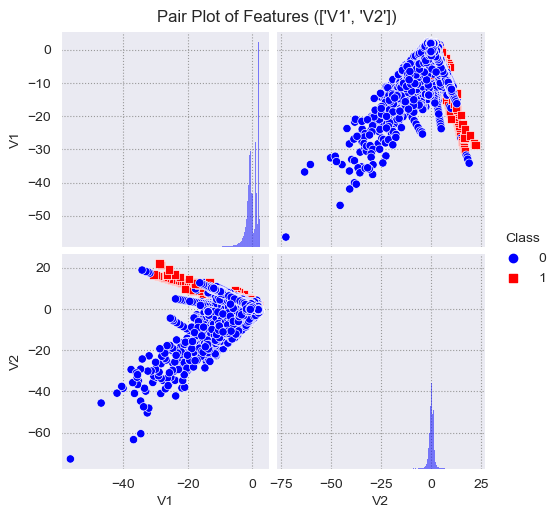

In [15]:
def plot_pair_plot(df: pd.DataFrame, columns:list=None):
    """
    Create a pair plot to visualize pairwise relationships between features.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing features.

    columns : list, optional
        List of columns to include in the pair plot. If not specified, all numeric columns will be considered.

    Returns:
    --------
    None

    Example:
    --------
    # Assuming your DataFrame is named 'df'
    plot_pair_plot(df)
    """
    if columns is None:
        columns = df.select_dtypes(include='number').columns

    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    ax = sns.pairplot(data=df, vars=columns, hue='Class', diag_kind='hist', markers=['o', 's'], palette=SCATTER_PLOT_PALLETTE)
    plt.suptitle(f'Pair Plot of Features ({columns})', y=1.02)
    plt.show()

# Let's plot a pair plot for the below 2 features
features_to_plot = ['V1', 'V2']
plot_pair_plot(df, features_to_plot)

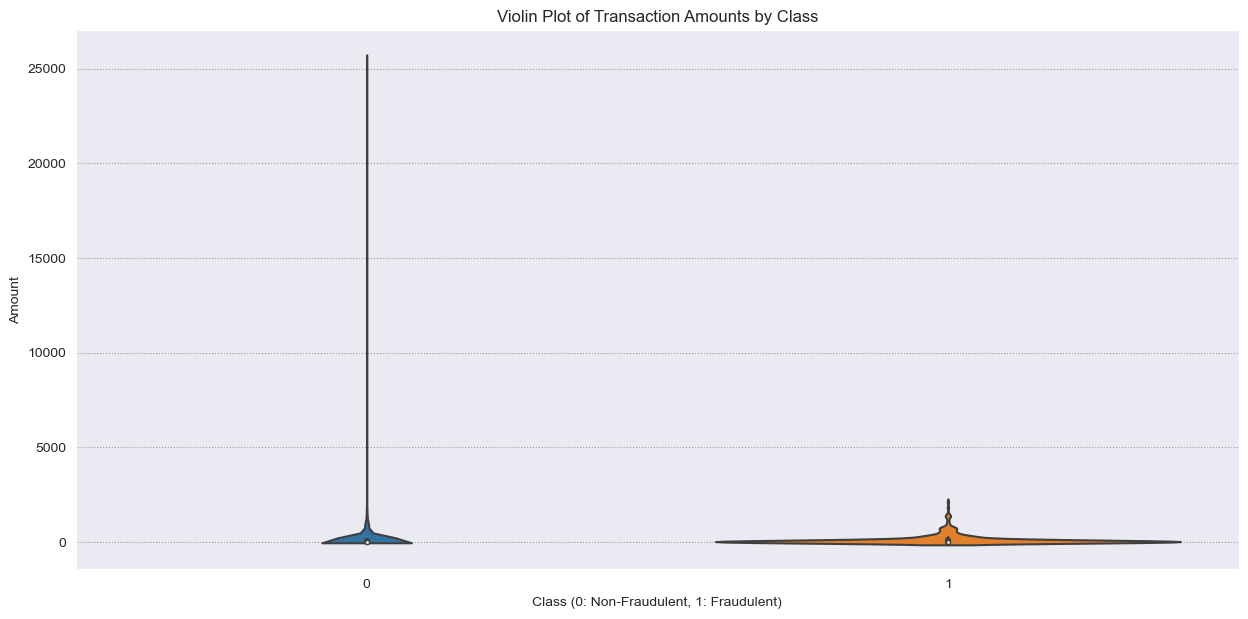

In [16]:
def plot_violin_plot_amount_by_class(df: pd.DataFrame):
    """
    Create a violin plot to visualize the distribution of transaction amounts by class.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing 'Amount' and 'Class' columns.

    Returns:
    --------
    None

    Example:
    --------
    # Assuming your DataFrame is named 'df'
    plot_violin_plot_amount_by_class(df)
    """
    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    sns.violinplot(x='Class', y='Amount', data=df)
    plt.title('Violin Plot of Transaction Amounts by Class')
    plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
    plt.ylabel('Amount')
    plt.show()

plot_violin_plot_amount_by_class(df)

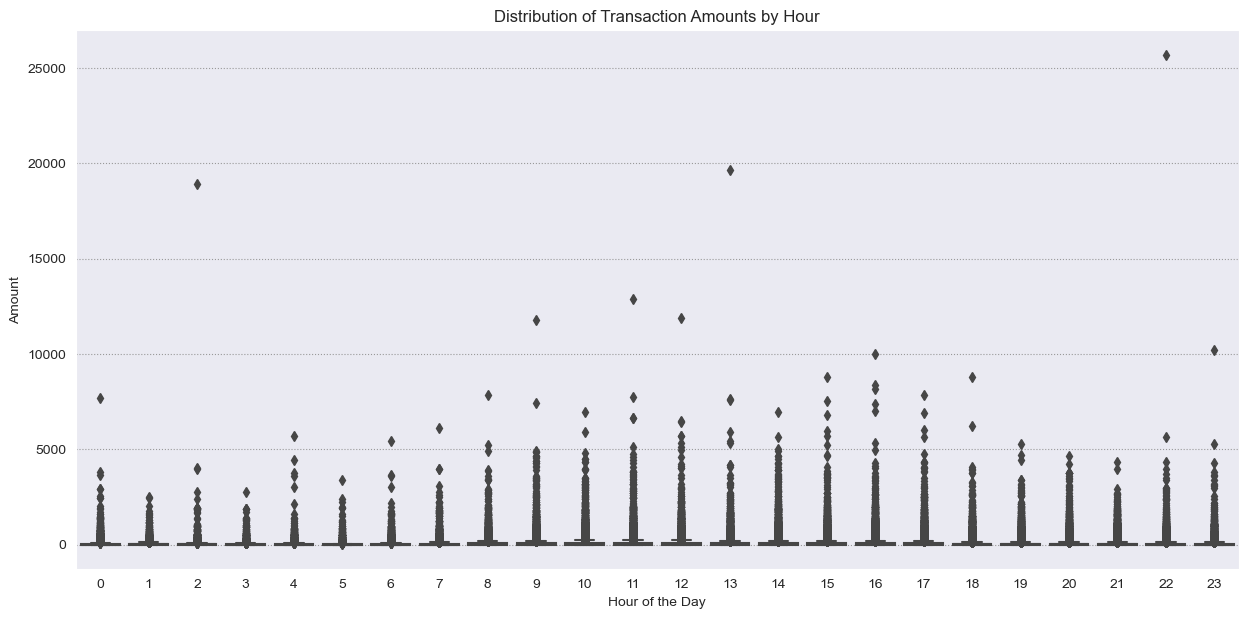

In [17]:
def plot_amount_distribution_by_hour(df:pd.DataFrame):
    """
    Create a box plot to visualize the distribution of transaction amounts by hour.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing 'Time' and 'Amount' columns.

    Returns:
    --------
    None

    Example:
    --------
    # Assuming your DataFrame is named 'df'
    plot_amount_distribution_by_hour(df)
    """
    # Extract hour from 'Time' column
    dataframe = df.copy()
    dataframe['Hour'] = dataframe['Time'].apply(lambda x: int(x // 3600 % 24))

    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    sns.boxplot(x='Hour', y='Amount', data=dataframe)
    plt.title('Distribution of Transaction Amounts by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Amount')
    plt.show()

plot_amount_distribution_by_hour(df)

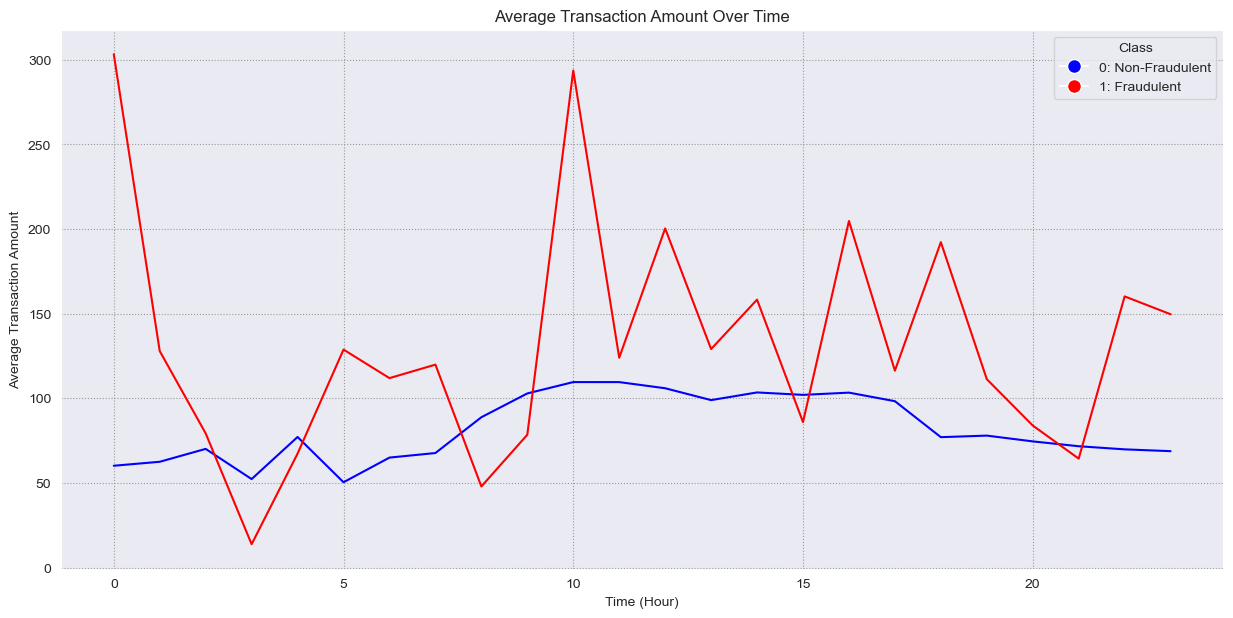

In [18]:
def plot_avg_amount_over_hour_with_grouped_class(df: pd.DataFrame):
    """
    Create a line plot to visualize the average transaction amount over time.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing 'Time' and 'Amount' columns.

    Returns:
    --------
    None

    Example:
    --------
    # Assuming your DataFrame is named 'df'
    plot_avg_amount_over_hour_with_grouped_class(df)
    """
    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    dataframe = df.copy()
    dataframe['Hour'] = dataframe['Time'].apply(lambda x: int(x // 3600 % 24))
    avg_amount_over_hour = dataframe.groupby(['Hour', 'Class'])['Amount'].mean().reset_index()
    ax = sns.lineplot(x='Hour', y='Amount', hue='Class', data=avg_amount_over_hour, palette=SCATTER_PLOT_PALLETTE)
    # Setting custom legends to make plot easier to visualise
    ax.legend(get_legend_handlers_from_palette(SCATTER_PLOT_PALLETTE), SCATTER_LEGEND_LABELS, loc='upper right', title='Class')
    plt.title('Average Transaction Amount Over Time')
    plt.xlabel('Time (Hour)')
    plt.ylabel('Average Transaction Amount')
    plt.show()

plot_avg_amount_over_hour_with_grouped_class(df)

The feature `Time` does not add any information or context making it an unnecessary feature when building our model. Let us create a generalised funtion that accepts a list of columns and removes them from the dataframe

In [19]:
# Drop unnecessary columns

def drop_unnecessary_columns(df: pd.DataFrame, columns_to_drop: list) -> pd.DataFrame:
    """
    Drop unnecessary columns from the DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame.

    columns_to_drop : list
        List of column names to be dropped.

    Returns:
    --------
    pandas.DataFrame
        DataFrame with unnecessary columns removed.

    Example:
    --------
    # Assuming your DataFrame is named 'df' and you want to drop columns 'Column1' and 'Column2'
    df_cleaned = drop_unnecessary_columns(df, ['Column1', 'Column2'])
    """
    cleaned_dataframe = df.drop(columns=columns_to_drop, errors='ignore')
    return cleaned_dataframe

# Let us drop the time column using the function we defined above
columns_to_drop = ['Time']
df_cleaned = drop_unnecessary_columns(df, columns_to_drop)
df_cleaned.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

In [20]:
try:
  for col in columns_to_drop:
    assert col not in df_cleaned.columns
    print(f'Successfully asserted columne "{col}" is dropped from dataframe')
except AssertionError as e:
  print(f'Asseertion failed with error: {str(e)}')

Successfully asserted columne "Time" is dropped from dataframe


### Splitting the data into train & test data

In [21]:
y = df_cleaned['Class']
X = df_cleaned.drop("Class", axis = 1)

In [22]:
# Let us do a 80:20 train test split on our cleaned dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [23]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

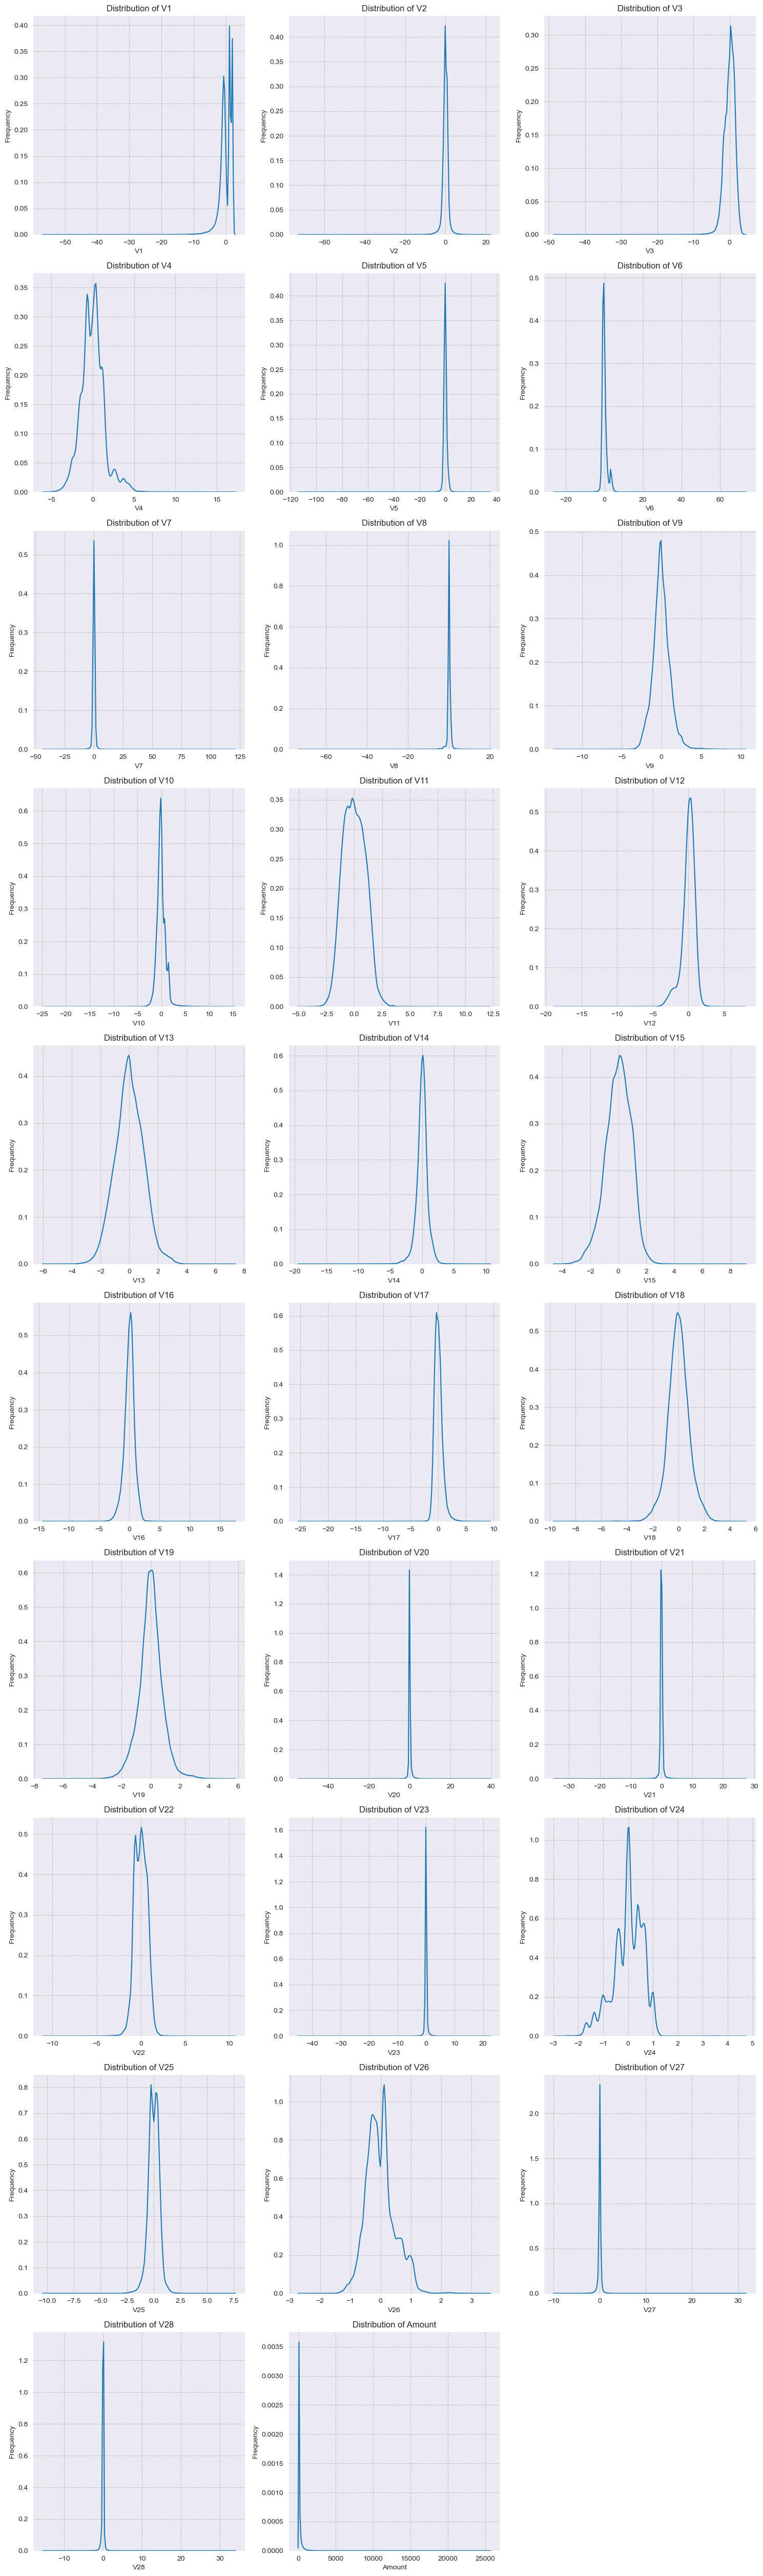

In [24]:
def plot_histograms_for_all_columns(dataframe):
    """
    Create histograms for all columns in the DataFrame.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        Input DataFrame.

    Returns:
    --------
    None

    Example:
    --------
    # Assuming your DataFrame is named 'df'
    plot_histograms_for_all_columns(df)
    plt.tight_layout()  # To prevent overlapping
    plt.show()
    """
    num_cols = dataframe.shape[1]  # Number of columns in the DataFrame
    num_rows = (num_cols // 3) + (num_cols % 3)  # Adjust rows for better layout

    plt.figure(figsize=(15, 5 * num_rows))

    for i, column in enumerate(dataframe.columns):
        plt.subplot(num_rows, 3, i + 1)
        sns.kdeplot(dataframe[column])
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()

plot_histograms_for_all_columns(X_train)
plt.show()

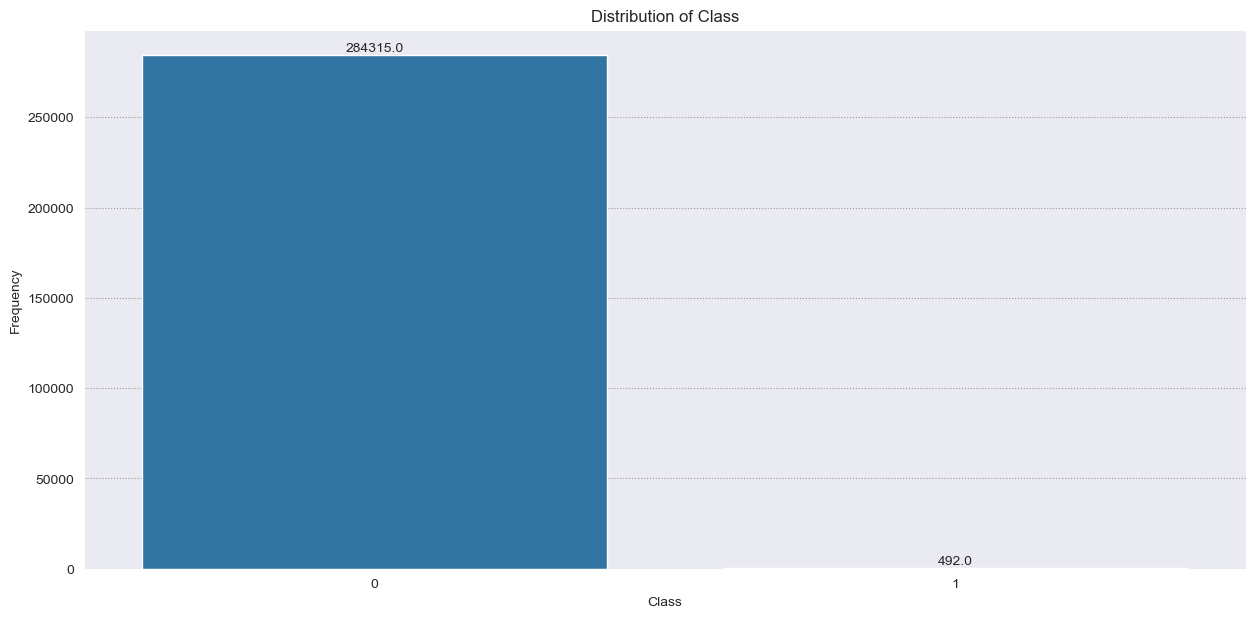

In [25]:
# plot the histogram of a variable from the dataset to see the skewness
def plot_histogram_of_variable(dataframe, variable):
    """
    Create a histogram to visualize the distribution of a variable.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        Input DataFrame containing the variable of interest.

    variable : str
        Name of the variable for which the histogram will be plotted.

    Returns:
    --------
    None

    Example:
    --------
    # Assuming your DataFrame is named 'df' and the variable is 'Amount'
    plot_histogram_of_variable(df, 'Amount')
    """
    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    ax = sns.countplot(data=dataframe, x=variable)
    annotate_plot(ax)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

# Let's visualise the im,balance in the Class labels
plot_histogram_of_variable(df_cleaned, 'Class')

As we can see, we have quite a number of features which are skewed. Let us create a function that gets a list of skewed features to be Power Transformed later

In [26]:
def get_skewed_features(dataframe: pd.DataFrame, skew_threshold: float):
    """
    Get a list of features with skewness greater than a specified threshold.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        Input DataFrame.

    skew_threshold : float

    Returns:
    --------
    list
        List of features with skewness greater than the threshold.

    Example:
    --------
    # Assuming your DataFrame is named 'df'
    skewed_features = get_skewed_features(df)
    """
    skewed_features = []

    for column in dataframe.columns:
        if abs(skew(dataframe[column])) > skew_threshold:
            skewed_features.append(column)

    return skewed_features

skew_threshold = 1
skewed_features_list = get_skewed_features(X_train, skew_threshold)
print("Features with skewness greater than 1 or less than -1:", skewed_features_list)

Features with skewness greater than 1 or less than -1: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V28', 'Amount']


# <center>DATA WRANGLING AND DATA PRE-PROCESSING<center>


---



### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [27]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

pt = PowerTransformer(copy=False)
X_train[skewed_features_list] = pt.fit_transform(X_train[skewed_features_list])
X_test[skewed_features_list] = pt.transform(X_test[skewed_features_list])

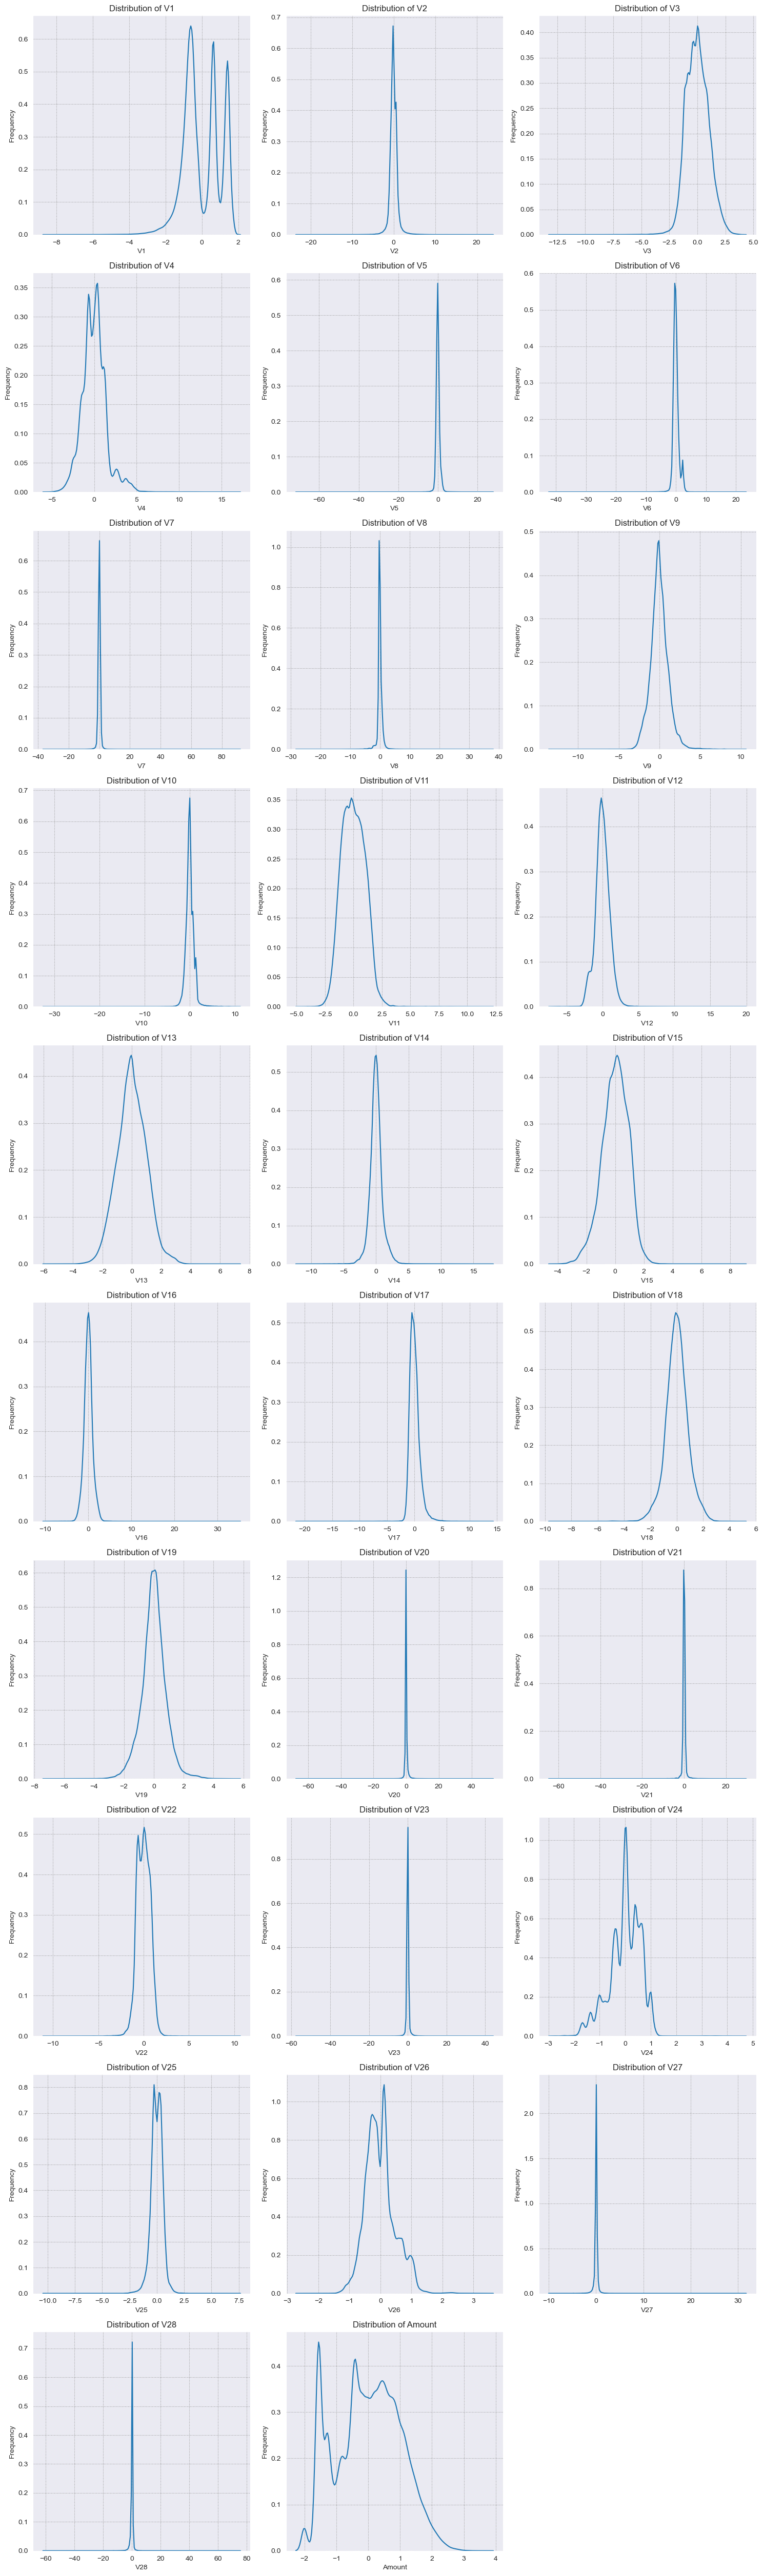

In [28]:
# plot the histogram of a variable from the dataset again to see the result

plot_histograms_for_all_columns(X_train)
plt.show()

In [29]:
# Using standard scaalar to scale the 'Amount' column
sc = StandardScaler()
X_train['Amount'] = sc.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount'] = sc.transform(X_test['Amount'].values.reshape(-1,1))
X_train.describe(include='all')

V1            V2            V3             V4            V5  \
count  2.278450e+05  2.278450e+05  2.278450e+05  227845.000000  2.278450e+05   
mean  -1.983389e-17  4.490691e-18  2.931423e-17      -0.001458 -2.494828e-18   
std    1.000002e+00  1.000002e+00  1.000002e+00       1.415853  1.000002e+00   
min   -8.488986e+00 -2.331158e+01 -1.301025e+01      -5.683171 -7.153036e+01   
25%   -7.231025e-01 -4.551315e-01 -7.126243e-01      -0.849270 -5.068809e-01   
50%   -2.491362e-01 -4.336159e-02 -2.517013e-02      -0.020959 -5.378375e-02   
75%    7.355798e-01  4.750541e-01  6.736701e-01       0.741630  4.316413e-01   
max    1.867856e+00  2.376984e+01  4.103002e+00      16.875344  2.776752e+01   

                 V6            V7            V8             V9           V10  \
count  2.278450e+05  2.278450e+05  2.278450e+05  227845.000000  2.278450e+05   
mean   1.216229e-17  1.213110e-17  3.212092e-18       0.000961  8.731900e-18   
std    1.000002e+00  1.000002e+00  1.000002e+00       1.097553  1.000002e+00   
min   -4.216909e+01 -3.652353e+01 -2.798561e+01     -13.320155 -3.227273e+01   
25%   -5.551411e-01 -4.422705e-01 -2.761910e-01      -0.642386 -4.740120e-01   
50%   -1.143795e-01  3.673720e-02 -5.576828e-02      -0.050414 -4.348037e-02   
75%    4.103726e-01  4.611257e-01  2.575807e-01       0.599040  4.563889e-01   
max    2.317212e+01  9.186255e+01  3.784550e+01      10.392889  1.094462e+01   

       ...           V20           V21            V22           V23  \
count  ...  2.278450e+05  2.278450e+05  227845.000000  2.278450e+05   
mean   ... -1.496897e-18  1.300429e-17      -0.001215  1.029117e-18   
std    ...  1.000002e+00  1.000002e+00       0.725311  1.000002e+00   
min    ... -6.731684e+01 -6.443004e+01     -10.933144 -5.747316e+01   
25%    ... -2.769685e-01 -3.038349e-01      -0.542809 -2.718027e-01   
50%    ... -8.425327e-02 -2.295742e-02       0.005491 -2.974664e-02   
75%    ...  1.687753e-01  2.752695e-01       0.527408  2.283488e-01   
max    ...  5.310903e+01  2.940564e+01      10.503090  4.387673e+01   

                 V24            V25            V26            V27  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean       -0.000217      -0.000979      -0.000192      -0.000032   
std         0.605446       0.521764       0.482443       0.401821   
min        -2.836627     -10.295397      -2.604551      -9.895244   
25%        -0.354887      -0.317835      -0.327476      -0.070960   
50%         0.040766       0.015101      -0.052011       0.001359   
75%         0.439790       0.350453       0.240813       0.091400   
max         4.584549       7.519589       3.517346      31.612198   

                V28        Amount  
count  2.278450e+05  2.278450e+05  
mean  -3.243277e-18 -2.140875e-17  
std    1.000002e+00  1.000002e+00  
min   -6.173171e+01 -2.013472e+00  
25%   -1.536076e-01 -7.503466e-01  
50%    4.652204e-02  2.782380e-02  
75%    2.535192e-01  7.483155e-01  
max    7.539139e+01  3.669755e+00  

[8 rows x 29 columns]

# <center>MODEL BUILDING</center>

---



# PART A: Imbalanced Dataset



In [30]:
class ModelTrainDatasetType(Enum):
      BALANCED = 'Balanced'
      IMBALANCED = 'Imbalanced'
      RANDOM_OVERSAMPLING = 'Random Oversampling'
      SMOTE = 'SMOTE'
      ADASYN = 'ADASYN'

In [31]:
# Initialising an empty dataframe to store model results
model_results_master_df = pd.DataFrame()

In [32]:
def plot_performance_metrics_all_models(df: pd.DataFrame, balancing_technique: ModelTrainDatasetType) -> None:
    """
    Plot dual bar plot for performance metrics of different models.

    Parameters:
    - df (pd.DataFrame): DataFrame with columns 'Model', 'Dataset_Balance_Technique', 
                        'Recall/Sensitivity', 'Specificity', 'Precision', 'F1_Score', 'AUC'.

    Returns:
    - None: Displays the dual bar plot using seaborn.
    """
    
    # Melt the DataFrame to convert it to long format for Seaborn
    df_long = pd.melt(model_results_master_df[model_results_master_df.Dataset_Balance_Technique==balancing_technique.value], id_vars=['Model', 'Dataset_Balance_Technique'], 
                      var_name='Metric', value_name='Value')

    # Create a dual bar plot using seaborn
    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    ax = sns.barplot(x='Model', y='Value', hue='Metric', data=df_long, palette="hls", ci=None)
    plt.title('Performance Metrics for Different Models')
    plt.xticks(rotation=90)
    plt.legend(title='Metric', bbox_to_anchor=(1, 1))
    plt.ylabel('Metrics [0-1]')
    plt.show()

In [33]:
def plot_class_distribution(y_train):
    """
    Plot a pie chart showing the distribution of class labels in the target variable using seaborn.

    Parameters:
    - y_train (pandas Series or pandas DataFrame): The target variable containing class labels.

    Returns:
    None

    Example:
    plot_class_distribution(y_train)
    """
    # Count the occurrences of each class label
    class_counts = y_train.value_counts()

    # Plot a pie chart using seaborn
    plt.figure(figsize=(4, 4))
    explode = [0, 0.1]
    # define Seaborn color palette to use
    palette_color = sns.color_palette('bright')
    sns.color_palette("pastel")
    pie = plt.pie(x=class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90, explode=explode, colors=palette_color)
    plt.title('Class Label Distribution')
    plt.show()

In [34]:
def plot_confusion_matrix(model: BaseEstimator, threshold: float):
    """
    Plot the confusion matrix for a binary classification model.

    Parameters:
    - model (BaseEstimator): The scikit-learn model to evaluate.
    - threshold (float): The threshold used to convert predicted probabilities into binary predictions.

    Returns:
    None

    Example:
    >>> plot_confusion_matrix(my_model, 0.5)
    """
    print(f'Model: {str(type(model).__name__)}')
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = y_pred_prob[:, 1]
    y_pred = list(map(lambda x: 1 if x > threshold else 0, y_pred_prob))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=SNS_DEFAULT_FIG_SIZE)
    disp.plot(ax=ax)

In [35]:
def save_model_to_my_drive(model: BaseEstimator, dataset_train_type: ModelTrainDatasetType) -> None:
    """
    Save a scikit-learn model to a specified folder.

    Parameters:
    - model (BaseEstimator): The scikit-learn model to be saved.
    - dataset_train_type (ModelTrainDatasetType): An instance of ModelTrainDatasetType representing the type of training dataset.

    Returns:
    None

    Raises:
    - Exception: If an error occurs during the saving process, an exception is caught and an error message is printed.

    Example:
    >>> save_model_to_my_drive(my_model, ModelTrainDatasetType("train"))
    """
    model_filename = os.path.join(DRIVE_MODEL_FOLDER, f'{str(type(model).__name__).upper()+"_"+dataset_train_type.value.upper()+".pkl"}')
    try:
      joblib.dump(model, model_filename)
    except Exception as e:
      print(f'Error occured while saving model to drive: {e}')
      return
    print(f'Model successfully saved in {model_filename}')

In [36]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(model):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f'Model: {str(type(model).__name__)}')
    y_train_pred  = model.predict(X_train)
    y_pred = model.predict(X_test)
    print('='*5, 'Training Data Scores', '='*5)
    print(f"F1 Score: {round(f1_score(y_train, y_train_pred)*100,2)}%")
    print(f"Classification Report: \n {classification_report(y_train, y_train_pred)}")
    print()
    print('='*5, 'Test Data Scores', '='*5)
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [37]:
def plot_roc_auc_curve(model, X_test:pd.DataFrame, y_test:pd.DataFrame) -> float:
    """
    Plot ROC curve and mark the best threshold.

    Parameters:
    -----------
    model : sklearn estimator
        The trained model.

    X_test : pandas.DataFrame
        Test features.

    y_test : pandas.Series
        True labels for the test set.

    Returns:
    --------
    None

    Example:
    --------
    # Assuming your model is named 'logistic_model'
    plot_roc_auc_curve(logistic_model, X_test, y_test)
    """
    # predict probabilities
    y_pred_prob = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    y_pred_prob = y_pred_prob[:, 1]

    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    print()

    # plot the roc curve for the model
    plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, label=str(type(model).__name__))
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    return best_thresh

In [38]:
def add_model_results_to_master_df(model_results_master_df:pd.DataFrame, model: BaseEstimator, best_thresh: float, dataset_train_type: ModelTrainDatasetType) -> pd.DataFrame:
    """
    Add model evaluation results to the master DataFrame.

    Parameters:
    -----------
    model_results_master_df : pd.DataFrame
        Master DataFrame containing results from multiple models.

    model : sklearn.base.BaseEstimator
        Trained machine learning model.

    best_thresh : float
        Best threshold for binary classification.

    dataset_train_type : ModelTrainDatasetType
        Type of training dataset used. It can be any enum values defined in the class

    Returns:
    --------
    pd.DataFrame
        Updated master DataFrame with added model evaluation results
    """
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = y_pred_prob[:, 1]
    y_pred = list(map(lambda x: 1 if x > best_thresh else 0, y_pred_prob))

    # Calculate recall and precision
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    # check specificity
    _, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
    # Get AUC score
    AUC = round(roc_auc_score(y_test, y_pred), 4)

    if model_results_master_df.empty:
       model_results_master_df = pd.DataFrame([[str(type(model).__name__), dataset_train_type.value, round(recall, 4), round(specificity, 4), round(precision, 4), round(f1_score, 4), AUC]],
                    columns = ['Model', 'Dataset_Balance_Technique', 'Recall/Sensitivity', 'Specificity', 'Precision', 'F1_Score', 'AUC'])
       return model_results_master_df

    model_results_master_df.loc[len(model_results_master_df.index)] = [str(type(model).__name__), dataset_train_type.value, round(recall, 4), round(specificity, 4), round(precision, 4), round(f1_score, 4), AUC]
    return model_results_master_df

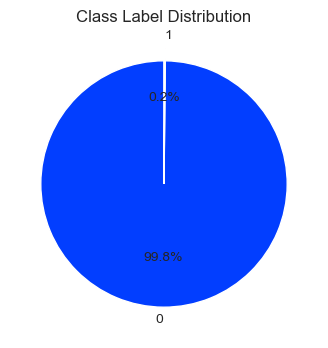

In [39]:
# Plotting the distribution of the 2 classes in the training datatset showing extreme imbalance

plot_class_distribution(y_train)

## MODEL 1 : LOGISTIC REGRESSION

In [40]:
# Logistic Regression
logreg_imbalanced_model = LogisticRegression(solver = 'saga', random_state=MODEL_RANDOM_STATE)

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=MODEL_RANDOM_STATE)

# Define the hyperparameter grid for grid search
param_grid = {'C': [0.01, 0.005, 0.1, 1, 10],  # Regularization parameter
              'penalty': [None, 'l2', 'l1']}  # Penalty type (None or L2)

# Create GridSearchCV object
grid_search_logreg_imbalanced = GridSearchCV(logreg_imbalanced_model, param_grid, cv=folds, scoring='roc_auc', verbose=1, return_train_score=True, n_jobs=-1)

In [41]:
# Fit the grid search to the data
grid_search_logreg_imbalanced.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.005, 0.1, 1, 10],
                         'penalty': [None, 'l2', 'l1']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [42]:
# cross validation results of logistic regression model on imbalanced data
logreg_imbalanced_cv_results = pd.DataFrame(grid_search_logreg_imbalanced.cv_results_)
logreg_imbalanced_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       14.438213      0.388733         0.022834        0.002814    0.01   
1       14.599013      0.246477         0.024800        0.003868    0.01   
2       15.569415      0.244020         0.020000        0.002280    0.01   
3       14.476413      0.398011         0.019800        0.002135   0.005   
4       14.056812      0.171692         0.021800        0.004622   0.005   
5       15.491413      0.139313         0.024800        0.005913   0.005   
6       14.088612      0.387132         0.017001        0.005020     0.1   
7       14.182013      0.487722         0.014400        0.002059     0.1   
8       15.538014      0.258501         0.014001        0.001549     0.1   
9       14.333613      0.548703         0.016000        0.002280       1   
10      14.076804      0.409871         0.014600        0.002577       1   
11      15.359415      0.345067         0.014600        0.000490       1   
12      13.443812      1.584736         0.015601        0.001357      10   
13      10.156409      0.162399         0.011400        0.002154      10   
14      10.667421      0.100217         0.008800        0.000748      10   

   param_penalty                         params  split0_test_score  \
0           None   {'C': 0.01, 'penalty': None}           0.992384   
1             l2   {'C': 0.01, 'penalty': 'l2'}           0.992381   
2             l1   {'C': 0.01, 'penalty': 'l1'}           0.985681   
3           None  {'C': 0.005, 'penalty': None}           0.992384   
4             l2  {'C': 0.005, 'penalty': 'l2'}           0.992314   
5             l1  {'C': 0.005, 'penalty': 'l1'}           0.978908   
6           None    {'C': 0.1, 'penalty': None}           0.992384   
7             l2    {'C': 0.1, 'penalty': 'l2'}           0.992387   
8             l1    {'C': 0.1, 'penalty': 'l1'}           0.992321   
9           None      {'C': 1, 'penalty': None}           0.992384   
10            l2      {'C': 1, 'penalty': 'l2'}           0.992383   
11            l1      {'C': 1, 'penalty': 'l1'}           0.992406   
12          None     {'C': 10, 'penalty': None}           0.992384   
13            l2     {'C': 10, 'penalty': 'l2'}           0.992384   
14            l1     {'C': 10, 'penalty': 'l1'}           0.992384   

    split1_test_score  split2_test_score  ...  mean_test_score  \
0            0.981355           0.982125  ...         0.980249   
1            0.982056           0.982055  ...         0.981063   
2            0.973032           0.976947  ...         0.976934   
3            0.981355           0.982125  ...         0.980249   
4            0.982332           0.981907  ...         0.981423   
5            0.967343           0.974573  ...         0.971605   
6            0.981355           0.982125  ...         0.980249   
7            0.981447           0.982137  ...         0.980382   
8            0.977269           0.982155  ...         0.980012   
9            0.981355           0.982125  ...         0.980249   
10           0.981366           0.982125  ...         0.980263   
11           0.980606           0.982095  ...         0.980193   
12           0.981355           0.982125  ...         0.980249   
13           0.981355           0.982125  ...         0.980251   
14           0.981281           0.982125  ...         0.980245   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.007421                6            0.980664            0.981556   
1         0.006650                2            0.981081            0.981773   
2         0.006436               14            0.976262            0.979431   
3         0.007421                6            0.980664            0.981556   
4         0.006260                1            0.981289            0.981876   
5         0.009416               15            0.971707            0.974907   
6         0.007421                6            0.980664 

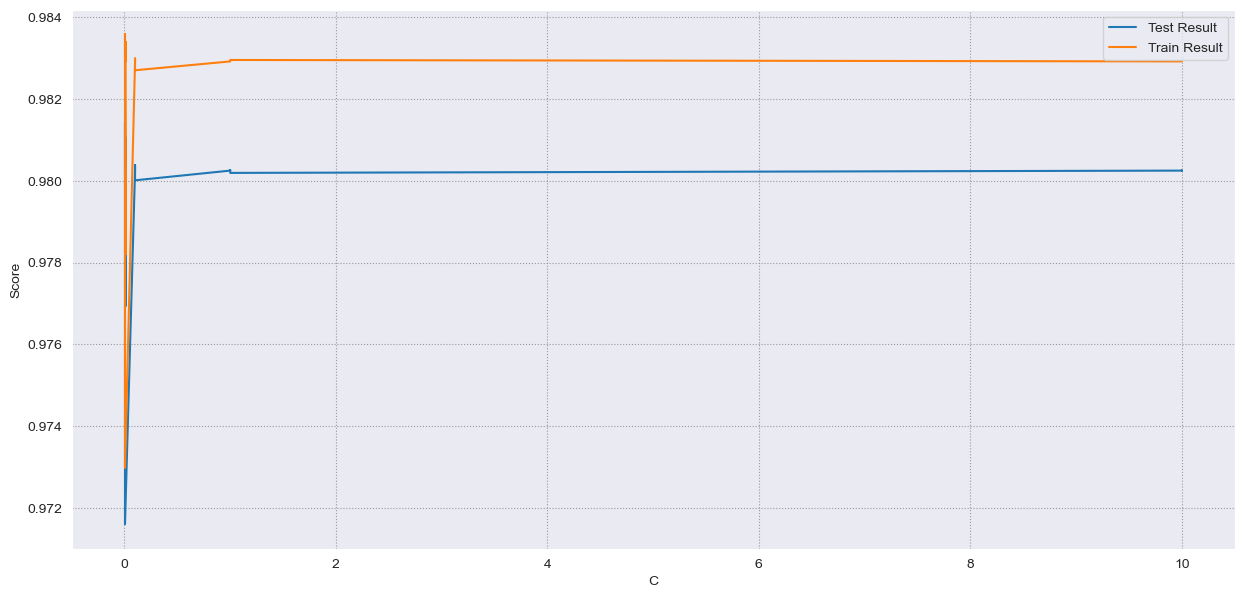

In [43]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(logreg_imbalanced_cv_results['param_C'], logreg_imbalanced_cv_results['mean_test_score'])
plt.plot(logreg_imbalanced_cv_results['param_C'], logreg_imbalanced_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [44]:
#print the optimum value of hyperparameters

grid_search_logreg_imbalanced.best_estimator_

LogisticRegression(C=0.005, random_state=42, solver='saga')

In [45]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_logreg_imbalanced.best_score_)
print("Best hyperparameters: ", grid_search_logreg_imbalanced.best_params_)

Best ROC_AUC:  0.981422539880054
Best hyperparameters:  {'C': 0.005, 'penalty': 'l2'}


In [46]:
# Let us fit the best estimator we got from Grid Search on train data

logreg_best_imbalanced = grid_search_logreg_imbalanced.best_estimator_
logreg_best_imbalanced.fit(X_train, y_train)

LogisticRegression(C=0.005, random_state=42, solver='saga')

In [47]:
# Evaluating the model on test data
display_scores(logreg_best_imbalanced)

Model: LogisticRegression
===== Training Data Scores =====
F1 Score: 71.65%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.60      0.72       394

    accuracy                           1.00    227845
   macro avg       0.95      0.80      0.86    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 68.32%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.56      0.68        98

    accuracy                           1.00     56962
   macro avg       0.94      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.004174



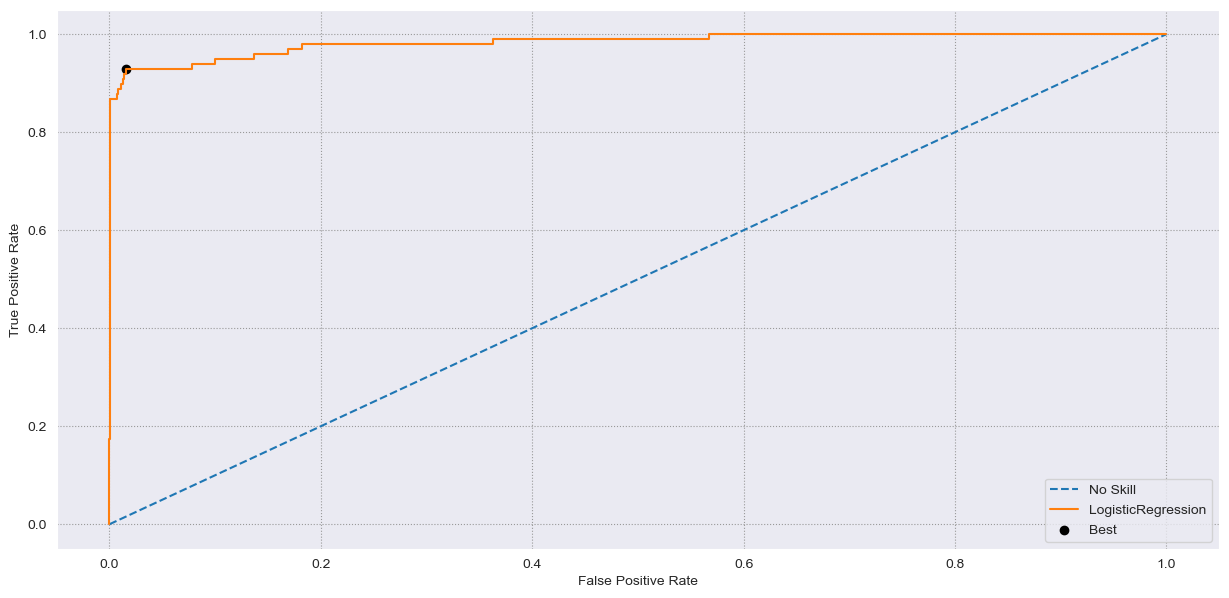

In [48]:
# Plotting the ROC AUC curve
best_thresh = plot_roc_auc_curve(logreg_best_imbalanced, X_test, y_test)

Model: LogisticRegression


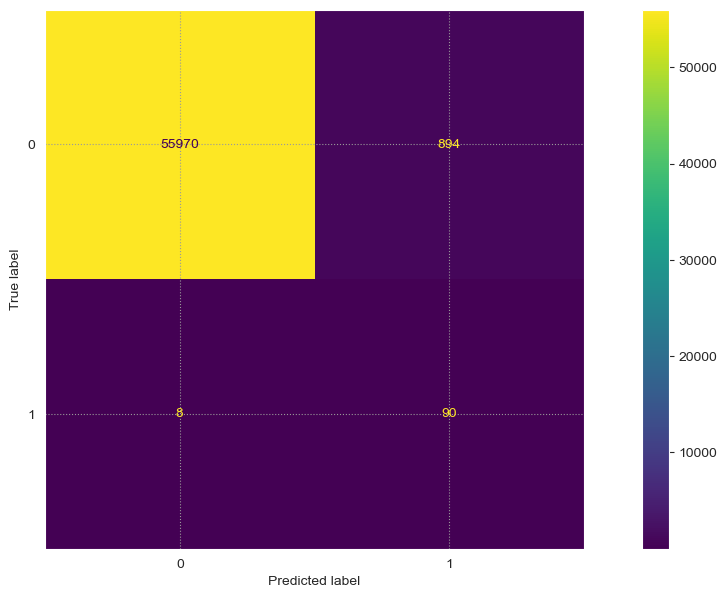

In [49]:
# Plotting the confusion matrix

plot_confusion_matrix(model=logreg_best_imbalanced, threshold=best_thresh)

In [50]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(logreg_best_imbalanced, dataset_train_type=ModelTrainDatasetType.IMBALANCED)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\LOGISTICREGRESSION_IMBALANCED.pkl


In [51]:
# Let us store the model results in the master results dataframe

model_results_master_df = pd.DataFrame()
model_results_master_df = add_model_results_to_master_df(model_results_master_df, logreg_best_imbalanced, best_thresh=best_thresh, dataset_train_type=ModelTrainDatasetType.IMBALANCED)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0  LogisticRegression                Imbalanced              0.9184   

   Specificity  Precision  F1_Score     AUC  
0       0.9843     0.0915    0.1664  0.9513

## MODEL 2: SVM

In [52]:
svc_imbalanced = SVC(probability=True, random_state=MODEL_RANDOM_STATE)

# Param Grid for Grid Search
param_grid = {'C': [0.01, 0.5, 0.8],
              'kernel': ['linear', 'sigmoid']}

# Creating 3 folds
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=MODEL_RANDOM_STATE)

# Grid search object on SVM model
grid_search_svc_imbalanced = GridSearchCV(estimator=svc_imbalanced, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=2)

In [53]:
# Fitting the gird search SVM on train data
grid_search_svc_imbalanced.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.5, 0.8],
                         'kernel': ['linear', 'sigmoid']},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [54]:
# cross validation results of SVM model on imbalanced data
svm_imbalanced_cv_results = pd.DataFrame(grid_search_svc_imbalanced.cv_results_)
svm_imbalanced_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      39.269703      2.097360         0.348001        0.083295    0.01   
1      59.865056      1.730286         0.766667        0.006944    0.01   
2      95.770089      6.441041         0.219334        0.004785     0.5   
3      43.006706      0.476927         0.606001        0.108343     0.5   
4     115.343441      4.568420         0.217667        0.009286     0.8   
5      42.141705      1.634963         0.575001        0.137188     0.8   

  param_kernel                            params  split0_test_score  \
0       linear   {'C': 0.01, 'kernel': 'linear'}           0.983705   
1      sigmoid  {'C': 0.01, 'kernel': 'sigmoid'}           0.881732   
2       linear    {'C': 0.5, 'kernel': 'linear'}           0.982314   
3      sigmoid   {'C': 0.5, 'kernel': 'sigmoid'}           0.937894   
4       linear    {'C': 0.8, 'kernel': 'linear'}           0.982346   
5      sigmoid   {'C': 0.8, 'kernel': 'sigmoid'}           0.935411   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.964764           0.954532         0.967667        0.012085   
1           0.882247           0.868406         0.877462        0.006407   
2           0.958481           0.949473         0.963422        0.013855   
3           0.891228           0.769029         0.866050        0.071200   
4           0.958620           0.950345         0.963770        0.013563   
5           0.893776           0.766066         0.865084        0.072050   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.969445            0.973871   
1                4            0.855880            0.880201   
2                3            0.966888            0.967877   
3                5            0.904747            0.879144   
4                2            0.966844            0.967884   
5                6            0.901118            0.884119   

   split2_train_score  mean_train_score  std_train_score  
0            0.976238          0.973185         0.002815  
1            0.886531          0.874204         0.013213  
2            0.974119          0.969628         0.003201  
3            0.793938          0.859276         0.047369  
4            0.974386          0.969705         0.003338  
5            0.790416          0.858551         0.048676

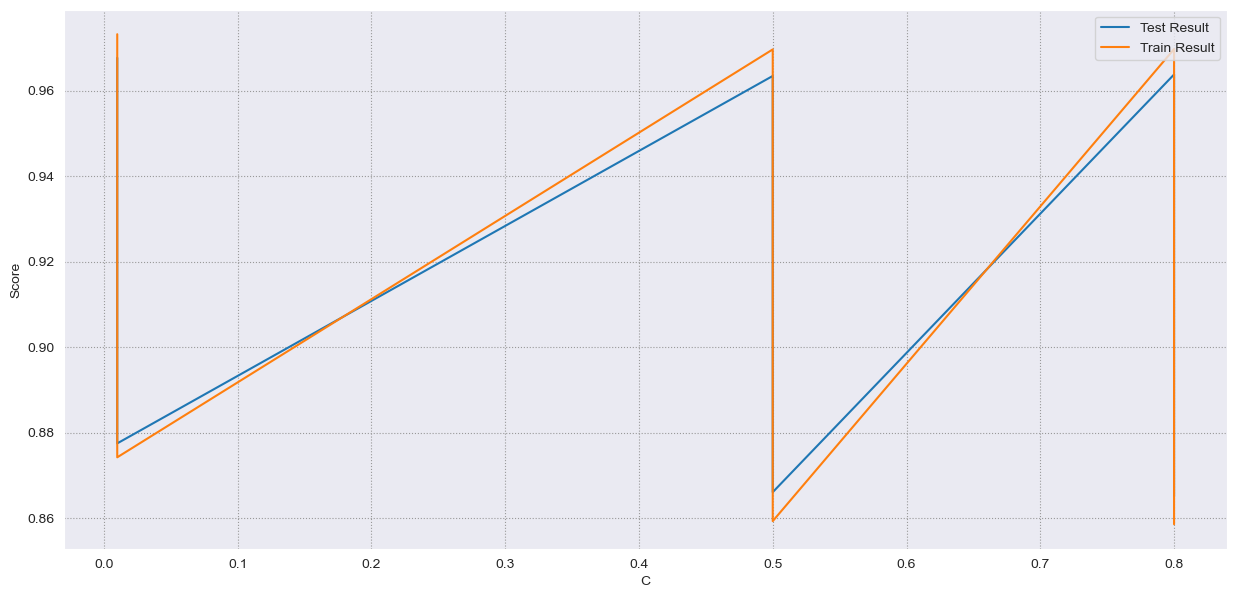

In [55]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(svm_imbalanced_cv_results['param_C'], svm_imbalanced_cv_results['mean_test_score'])
plt.plot(svm_imbalanced_cv_results['param_C'], svm_imbalanced_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [56]:
#print the optimum value of hyperparameters

grid_search_svc_imbalanced.best_estimator_

SVC(C=0.01, kernel='linear', probability=True, random_state=42)

In [57]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_svc_imbalanced.best_score_)
print("Best hyperparameters: ", grid_search_svc_imbalanced.best_params_)

Best ROC_AUC:  0.9676673055314443
Best hyperparameters:  {'C': 0.01, 'kernel': 'linear'}


In [58]:
# Let us fit the best SVM estimator we got from Grid Search on train data

svm_best_imbalanced = grid_search_svc_imbalanced.best_estimator_
svm_best_imbalanced.fit(X_train, y_train)

SVC(C=0.01, kernel='linear', probability=True, random_state=42)

In [59]:
# Evaluating the model on train and test data

display_scores(model=svm_best_imbalanced)

Model: SVC
===== Training Data Scores =====
F1 Score: 81.47%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.84      0.79      0.81       394

    accuracy                           1.00    227845
   macro avg       0.92      0.89      0.91    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 80.63%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.79      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.000900



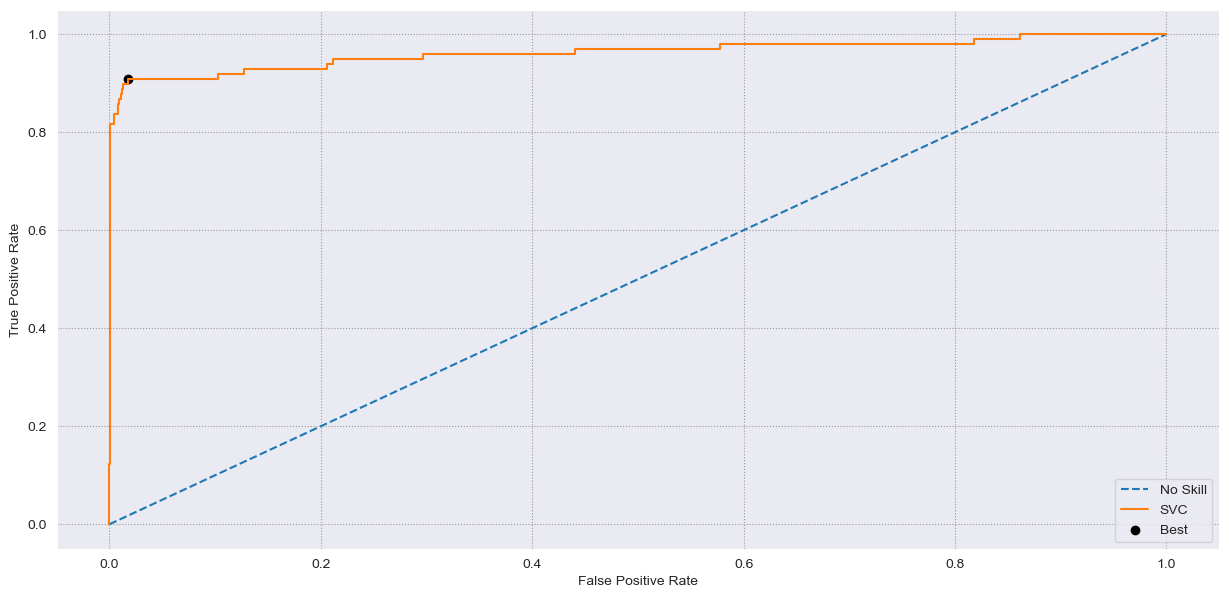

In [60]:
# Plotting the ROC AUC curve

best_svm_thresh = plot_roc_auc_curve(svm_best_imbalanced, X_test, y_test)

Model: SVC


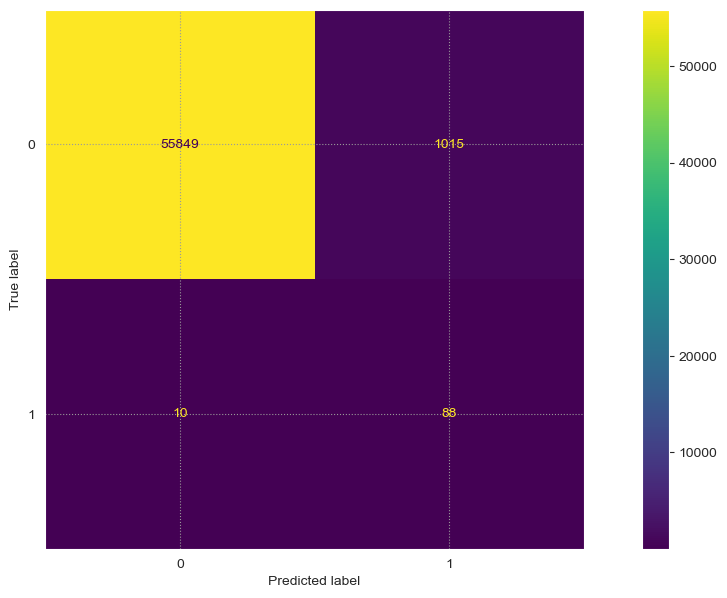

In [61]:
# Plotting the confusion matrix

plot_confusion_matrix(model=svm_best_imbalanced, threshold=best_svm_thresh)

In [62]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(svm_best_imbalanced, dataset_train_type=ModelTrainDatasetType.IMBALANCED)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\SVC_IMBALANCED.pkl


In [63]:
# Let us store the SVM model results in the master results dataframe
# Note: Do not run this piece of code more than 1 time as it can cause duplicate rows to get appended to the master dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, svm_best_imbalanced, best_thresh=best_svm_thresh, dataset_train_type=ModelTrainDatasetType.IMBALANCED)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0  LogisticRegression                Imbalanced              0.9184   
1                 SVC                Imbalanced              0.8980   

   Specificity  Precision  F1_Score     AUC  
0       0.9843     0.0915    0.1664  0.9513  
1       0.9822     0.0798    0.1465  0.9401

## Model 3: Decision Tree

In [64]:
# Decision Tree
dtree_imbalanced = DecisionTreeClassifier(random_state=MODEL_RANDOM_STATE)

# Parameter Grid
param_grid = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [4, 5, 10, 20],
          'min_samples_split': [74, 75],
          'min_samples_leaf': [27, 28, 50],
          'max_features':['sqrt', 'log2']}

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=MODEL_RANDOM_STATE)

# create gridsearch object
grid_search_dtree_imbalanced = GridSearchCV(estimator=dtree_imbalanced, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=1)

In [65]:
# Fitting the gird search SVM on train data
grid_search_dtree_imbalanced.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [27, 28, 50],
                         'min_samples_split': [74, 75],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [66]:
# cross validation results of Decision Tree model on imbalanced data
dtree_imbalanced_cv_results = pd.DataFrame(grid_search_dtree_imbalanced.cv_results_)
dtree_imbalanced_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.849801      0.031600         0.017400        0.003262   
1       0.184200      0.027287         0.023200        0.004020   
2       0.802800      0.035448         0.015200        0.002482   
3       0.212601      0.024451         0.021599        0.003382   
4       0.828201      0.046624         0.021400        0.002577   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               4               sqrt                     27   
1            gini               4               sqrt                     27   
2            gini               4               sqrt                     27   
3            gini               4               sqrt                     27   
4            gini               4               sqrt                     28   

  param_min_samples_split param_splitter  ... mean_test_score  std_test_score  \
0                      74           best  ...        0.873927        0.032339   
1                      74         random  ...        0.754024        0.068586   
2                      75           best  ...        0.873927        0.032339   
3                      75         random  ...        0.754024        0.068586   
4                      74           best  ...        0.873928        0.032339   

   rank_test_score  split0_train_score  split1_train_score  \
0              121            0.887962            0.866446   
1              153            0.723737            0.742015   
2              121            0.887962            0.866446   
3              153            0.723737            0.742015   
4              119            0.887960            0.866445   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.895797            0.886085            0.867910   
1            0.863816            0.743655            0.725591   
2            0.895797            0.886085            0.867910   
3            0.863816            0.743655            0.725591   
4            0.895796            0.886084            0.867906   

   mean_train_score  std_train_score  
0          0.880840         0.011630  
1          0.759763         0.052663  
2          0.880840         0.011630  
3          0.759763         0.052663  
4          0.880838         0.011631  

[5 rows x 26 columns]

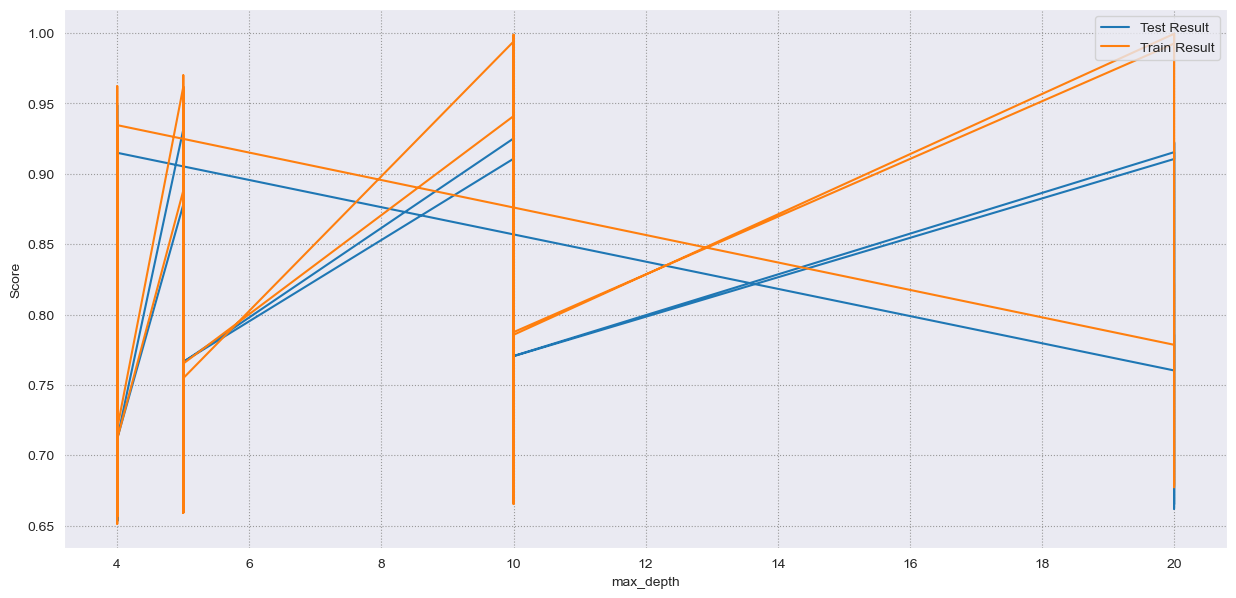

In [67]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(dtree_imbalanced_cv_results['param_max_depth'], dtree_imbalanced_cv_results['mean_test_score'])
plt.plot(dtree_imbalanced_cv_results['param_max_depth'], dtree_imbalanced_cv_results['mean_train_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [68]:
#print the optimum value of hyperparameters

grid_search_dtree_imbalanced.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=27, min_samples_split=74,
                       random_state=42)

In [69]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_dtree_imbalanced.best_score_)
print("Best hyperparameters: ", grid_search_dtree_imbalanced.best_params_)

Best ROC_AUC:  0.948779265638589
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 27, 'min_samples_split': 74, 'splitter': 'best'}


In [70]:
# Let us fit the best Decision Tree estimator we got from Grid Search on train data

dtree_best_imbalanced = grid_search_dtree_imbalanced.best_estimator_
dtree_best_imbalanced.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=27, min_samples_split=74,
                       random_state=42)

In [71]:
# Evaluating the model on train and test data

display_scores(model=dtree_best_imbalanced)

Model: DecisionTreeClassifier
===== Training Data Scores =====
F1 Score: 78.11%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.81      0.76      0.78       394

    accuracy                           1.00    227845
   macro avg       0.90      0.88      0.89    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 76.84%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.74      0.77        98

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.004210



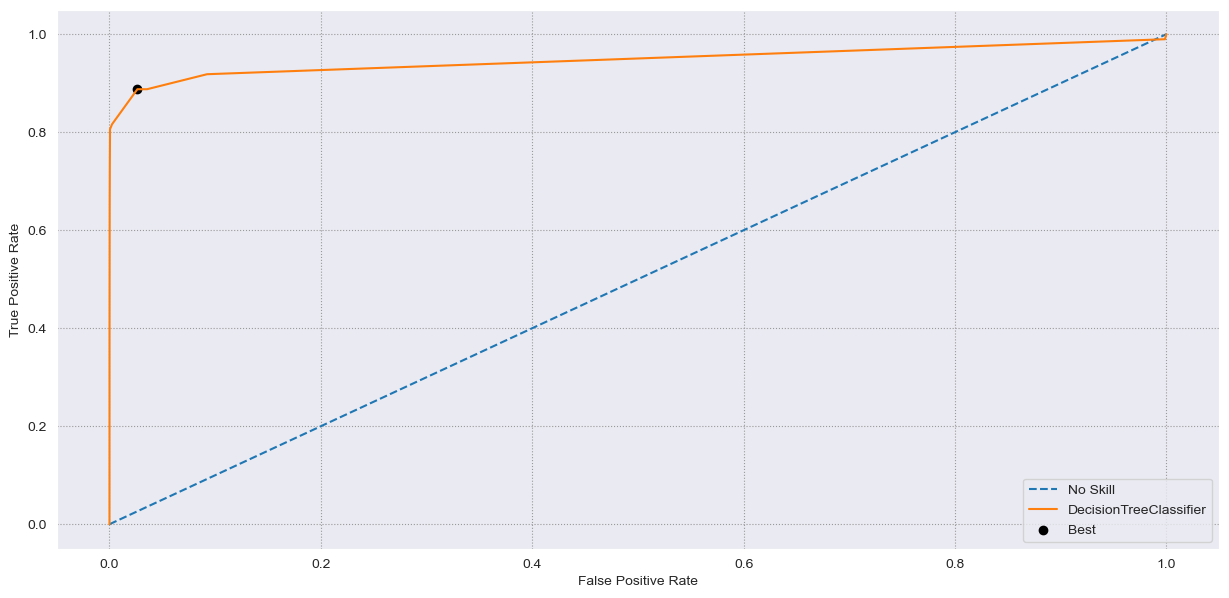

In [72]:
# Plotting the ROC AUC curve

best_dtree_thresh = plot_roc_auc_curve(dtree_best_imbalanced, X_test, y_test)

Model: DecisionTreeClassifier


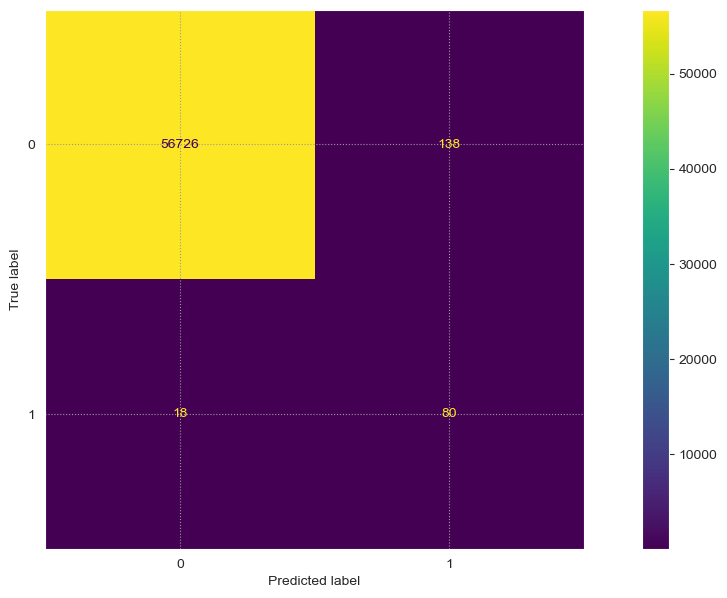

In [73]:
# Plotting the confusion matrix

plot_confusion_matrix(model=dtree_best_imbalanced, threshold=best_dtree_thresh)

In [74]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(dtree_best_imbalanced, dataset_train_type=ModelTrainDatasetType.IMBALANCED)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\DECISIONTREECLASSIFIER_IMBALANCED.pkl


In [75]:
# Let us store the Decision Tree model results in the master results dataframe
# Note: Do not run this piece of code more than 1 time as it can cause duplicate rows to get appended to the master dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, dtree_best_imbalanced, best_thresh=best_dtree_thresh, dataset_train_type=ModelTrainDatasetType.IMBALANCED)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0      LogisticRegression                Imbalanced              0.9184   
1                     SVC                Imbalanced              0.8980   
2  DecisionTreeClassifier                Imbalanced              0.8163   

   Specificity  Precision  F1_Score     AUC  
0       0.9843     0.0915    0.1664  0.9513  
1       0.9822     0.0798    0.1465  0.9401  
2       0.9976     0.3670    0.5063  0.9069

## MODEL 4: RANDOM FOREST

In [76]:
# Random Forest
rf_imbalanced = RandomForestClassifier(n_jobs=-1, random_state=MODEL_RANDOM_STATE)

# hyperparameter space
param_grid = {'criterion': ['gini', 'entropy'],
              'n_estimators': [50, 100, 150],
              'min_samples_leaf': [5, 9, 15],
              'max_features': ['sqrt', 'log2']}

# create 3 folds
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=MODEL_RANDOM_STATE)

# create gridsearch object
grid_search_rf_imbalanced = GridSearchCV(estimator=rf_imbalanced, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, verbose=1, return_train_score=True)

In [77]:
# Fitting the gird search Random Forest on train data (Note this takes approx an hour to complete)
grid_search_rf_imbalanced.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 9, 15],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [78]:
# cross validation results of Decision Tree model on imbalanced data
rf_imbalanced_cv_results = pd.DataFrame(grid_search_rf_imbalanced.cv_results_)
rf_imbalanced_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      28.701693      5.285654        73.121068        1.637087   
1     108.095100      3.655746        20.411686        3.296254   
2     128.210119      1.062377         4.154670        3.044250   
3      79.350073      7.049455        42.153706        4.661597   
4     115.319107      6.449305        13.703346        6.033208   

  param_criterion param_max_features param_min_samples_leaf  \
0            gini               sqrt                      5   
1            gini               sqrt                      5   
2            gini               sqrt                      5   
3            gini               sqrt                      9   
4            gini               sqrt                      9   

  param_n_estimators                                             params  \
0                 50  {'criterion': 'gini', 'max_features': 'sqrt', ...   
1                100  {'criterion': 'gini', 'max_features': 'sqrt', ...   
2                150  {'criterion': 'gini', 'max_features': 'sqrt', ...   
3                 50  {'criterion': 'gini', 'max_features': 'sqrt', ...   
4                100  {'criterion': 'gini', 'max_features': 'sqrt', ...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.951118           0.954907           0.935326         0.947117   
1           0.950213           0.958007           0.941029         0.949750   
2           0.952668           0.957356           0.943524         0.951183   
3           0.953363           0.961669           0.940909         0.951980   
4           0.966968           0.964360           0.943240         0.958189   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.008480               36            0.999935            0.999936   
1        0.006939               34            0.999940            0.999936   
2        0.005744               31            0.999941            0.999937   
3        0.008532               29            0.999855            0.999869   
4        0.010624               17            0.999864            0.999872   

   split2_train_score  mean_train_score  std_train_score  
0            0.999952          0.999941         0.000008  
1            0.999953          0.999943         0.000007  
2            0.999953          0.999944         0.000007  
3            0.999880          0.999868         0.000010  
4            0.999882          0.999873         0.000007

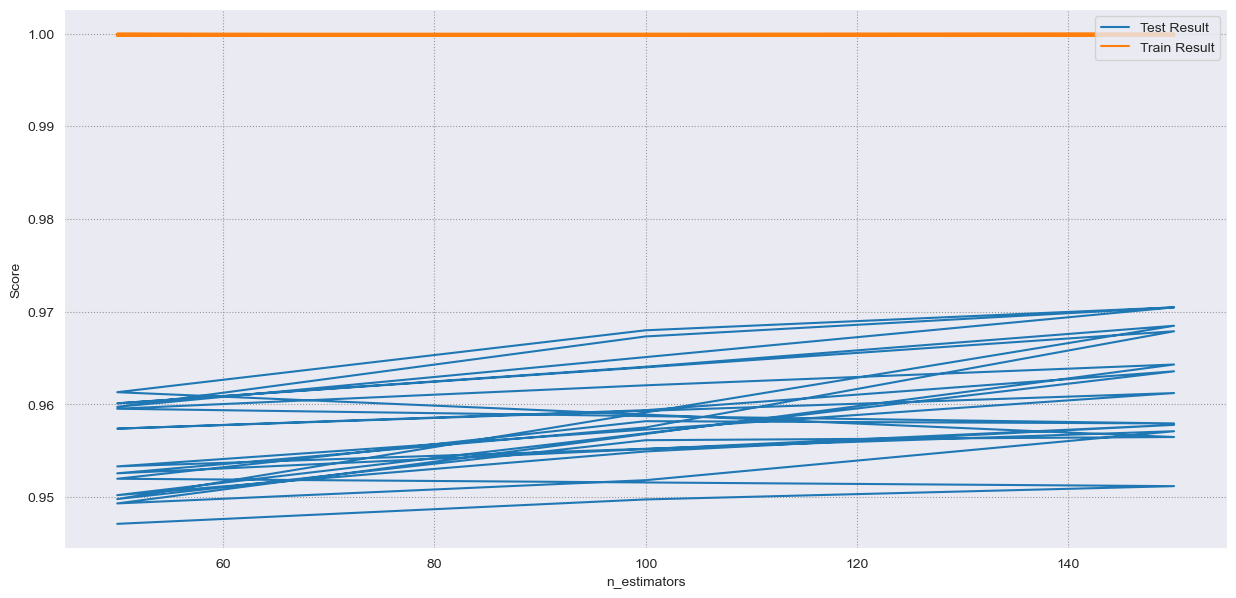

In [79]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(rf_imbalanced_cv_results['param_n_estimators'], rf_imbalanced_cv_results['mean_test_score'])
plt.plot(rf_imbalanced_cv_results['param_n_estimators'], rf_imbalanced_cv_results['mean_train_score'])
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [80]:
#print the optimum value of hyperparameters

grid_search_rf_imbalanced.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=9, n_estimators=150, n_jobs=-1,
                       random_state=42)

In [81]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_rf_imbalanced.best_score_)
print("Best hyperparameters: ", grid_search_rf_imbalanced.best_params_)

Best ROC_AUC:  0.970468571958517
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 9, 'n_estimators': 150}


In [82]:
# Let us fit the best Random Forest Tree estimator we got from Grid Search on train data

rf_best_imbalanced = grid_search_rf_imbalanced.best_estimator_
rf_best_imbalanced.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=9, n_estimators=150, n_jobs=-1,
                       random_state=42)

In [83]:
# Evaluating the model on train and test data

display_scores(model=rf_best_imbalanced)

Model: RandomForestClassifier
===== Training Data Scores =====
F1 Score: 86.94%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.79      0.87       394

    accuracy                           1.00    227845
   macro avg       0.98      0.90      0.93    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 83.43%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.005240



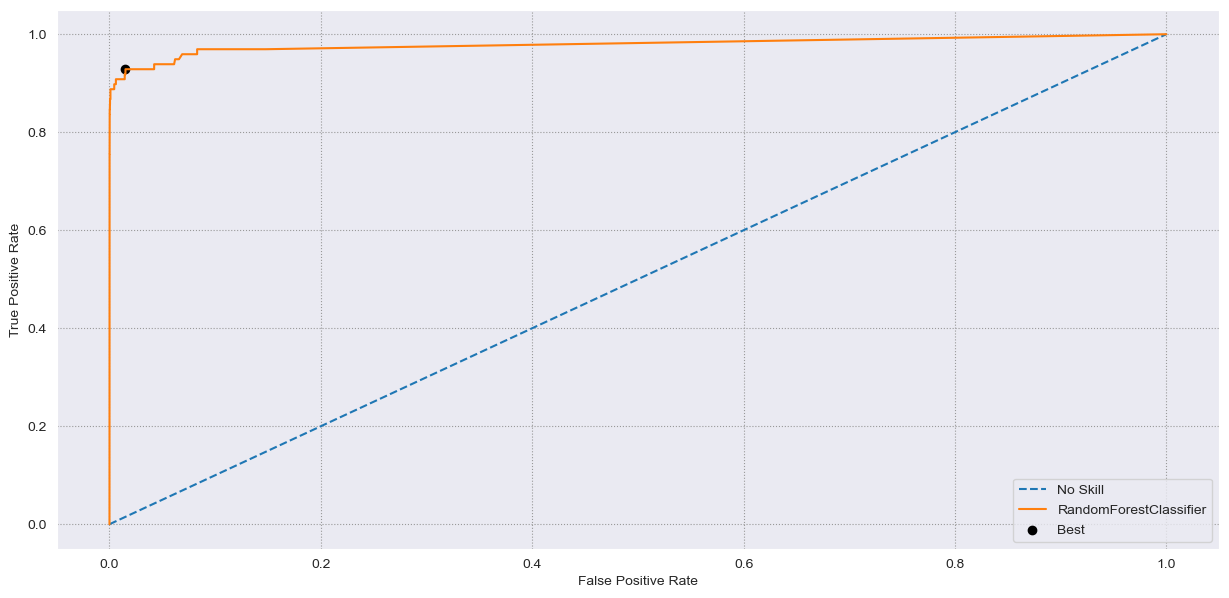

In [84]:
# Plotting the ROC AUC curve

best_rf_thresh = plot_roc_auc_curve(rf_best_imbalanced, X_test, y_test)

Model: RandomForestClassifier


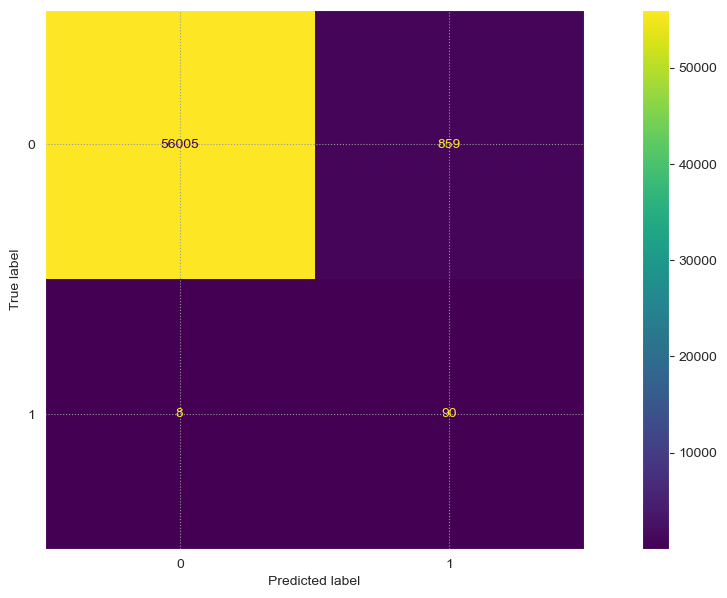

In [85]:
# Plotting the confusion matrix

plot_confusion_matrix(model=rf_best_imbalanced, threshold=best_rf_thresh)

In [86]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(rf_best_imbalanced, dataset_train_type=ModelTrainDatasetType.IMBALANCED)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\RANDOMFORESTCLASSIFIER_IMBALANCED.pkl


In [87]:
# Let us store the Random Forest Tree model results in the master results dataframe
# Note: Do not run this piece of code more than 1 time as it can cause duplicate rows to get appended to the master dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, rf_best_imbalanced, best_thresh=best_rf_thresh, dataset_train_type=ModelTrainDatasetType.IMBALANCED)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0      LogisticRegression                Imbalanced              0.9184   
1                     SVC                Imbalanced              0.8980   
2  DecisionTreeClassifier                Imbalanced              0.8163   
3  RandomForestClassifier                Imbalanced              0.9184   

   Specificity  Precision  F1_Score     AUC  
0       0.9843     0.0915    0.1664  0.9513  
1       0.9822     0.0798    0.1465  0.9401  
2       0.9976     0.3670    0.5063  0.9069  
3       0.9849     0.0948    0.1719  0.9516

## MODEL 5: KNN

In [88]:
# KNN
knn_imbalanced = KNeighborsClassifier(n_jobs=-1)

# Param Grid
param_grid = {'n_neighbors': [10, 20, 30]}

# create 3 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state=MODEL_RANDOM_STATE)

grid_search_knn_imbalanced = GridSearchCV(estimator=knn_imbalanced, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, verbose=1, return_train_score=True)

In [89]:
# Fitting the gird search KNN on train data (Note this takes approx 30 mins to complete)
grid_search_knn_imbalanced.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [10, 20, 30]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [90]:
# cross validation results of KNN model on imbalanced data
knn_imbalanced_cv_results = pd.DataFrame(grid_search_knn_imbalanced.cv_results_)
knn_imbalanced_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.058667      0.000471        29.698699        0.223723   
1       0.057667      0.000471        29.612032        0.211699   
2       0.067334      0.009809        29.961700        0.182315   

  param_n_neighbors               params  split0_test_score  \
0                10  {'n_neighbors': 10}           0.931601   
1                20  {'n_neighbors': 20}           0.942795   
2                30  {'n_neighbors': 30}           0.942641   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.934896           0.900498         0.922332        0.015497   
1           0.934723           0.904162         0.927227        0.016639   
2           0.938420           0.915480         0.932181        0.011934   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.999763            0.999742   
1                2            0.999568            0.999537   
2                1            0.999420            0.999398   

   split2_train_score  mean_train_score  std_train_score  
0            0.999844          0.999783         0.000044  
1            0.999709          0.999605         0.000075  
2            0.999597          0.999471         0.000089

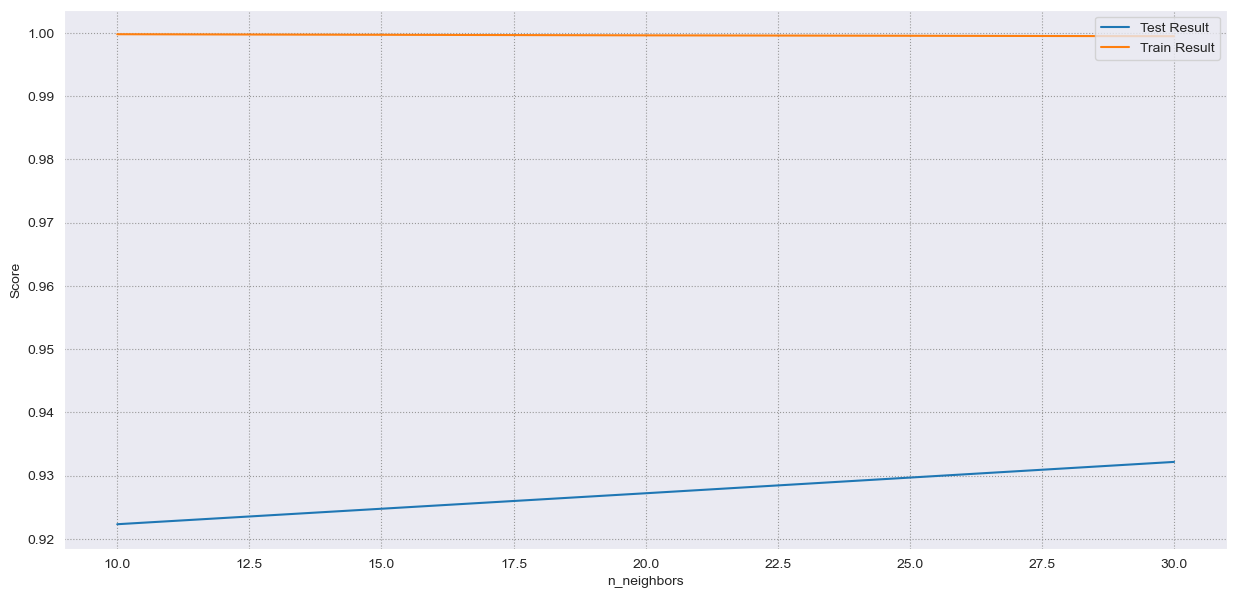

In [91]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(knn_imbalanced_cv_results['param_n_neighbors'], knn_imbalanced_cv_results['mean_test_score'])
plt.plot(knn_imbalanced_cv_results['param_n_neighbors'], knn_imbalanced_cv_results['mean_train_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [92]:
#print the optimum value of hyperparameters

grid_search_knn_imbalanced.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

In [93]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_knn_imbalanced.best_score_)
print("Best hyperparameters: ", grid_search_knn_imbalanced.best_params_)

Best ROC_AUC:  0.9321805199919758
Best hyperparameters:  {'n_neighbors': 30}


In [94]:
# Let us fit the best KNN estimator we got from Grid Search on train data

knn_best_imbalanced = grid_search_knn_imbalanced.best_estimator_
knn_best_imbalanced.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

In [95]:
# Evaluating the model on train and test data (Note: Since its a KNN model, predcitions and scores might take ~10 minutes to complete)

display_scores(model=knn_best_imbalanced)

Model: KNeighborsClassifier
===== Training Data Scores =====
F1 Score: 80.38%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.85      0.76      0.80       394

    accuracy                           1.00    227845
   macro avg       0.93      0.88      0.90    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 78.92%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.74      0.79        98

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.033333



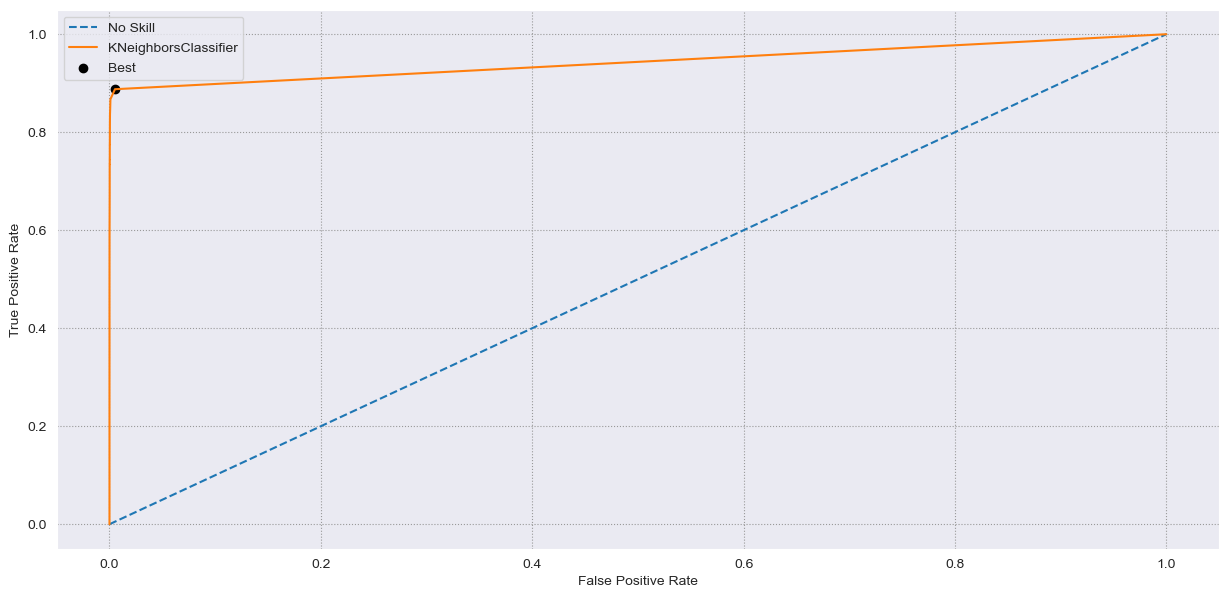

In [96]:
# Plotting the ROC AUC curve

best_knn_thresh = plot_roc_auc_curve(knn_best_imbalanced, X_test, y_test)

Model: KNeighborsClassifier


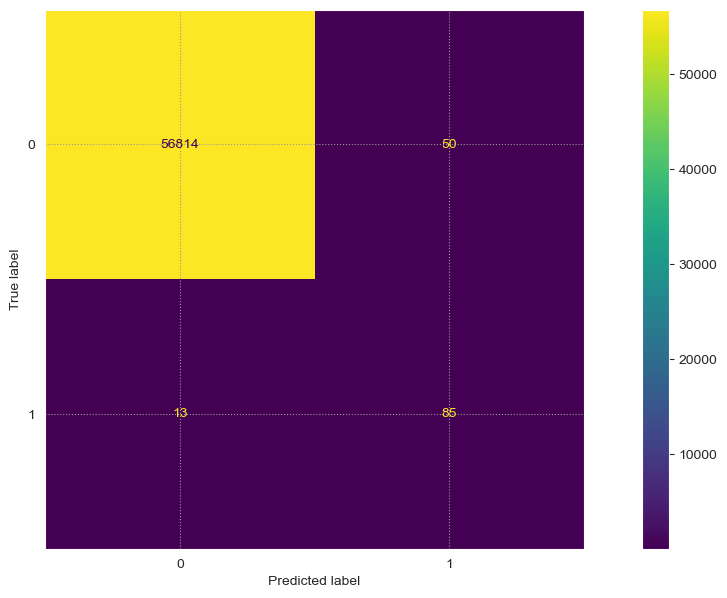

In [97]:
# Plotting the confusion matrix

plot_confusion_matrix(model=knn_best_imbalanced, threshold=best_knn_thresh)

In [98]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(knn_best_imbalanced, dataset_train_type=ModelTrainDatasetType.IMBALANCED)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\KNEIGHBORSCLASSIFIER_IMBALANCED.pkl


In [99]:
# Let us store the KNN model results in the master results dataframe
# Note: Do not run this piece of code more than 1 time as it can cause duplicate rows to get appended to the master dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, knn_best_imbalanced, best_thresh=best_knn_thresh, dataset_train_type=ModelTrainDatasetType.IMBALANCED)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0      LogisticRegression                Imbalanced              0.9184   
1                     SVC                Imbalanced              0.8980   
2  DecisionTreeClassifier                Imbalanced              0.8163   
3  RandomForestClassifier                Imbalanced              0.9184   
4    KNeighborsClassifier                Imbalanced              0.8673   

   Specificity  Precision  F1_Score     AUC  
0       0.9843     0.0915    0.1664  0.9513  
1       0.9822     0.0798    0.1465  0.9401  
2       0.9976     0.3670    0.5063  0.9069  
3       0.9849     0.0948    0.1719  0.9516  
4       0.9991     0.6296    0.7296  0.9332

## MODEL 6: XGBOOST

In [100]:
# XGBoost Classifier
xgb_imbalanced = XGBClassifier(objective='binary:logistic')

# Param Grid
param_grid = {
        'n_estimators': [50, 100, 150],
        'gamma': [0.03, 0.06, 0.1],
        'max_depth': [6, 8, 10],
        'eta': [0.01, 0.05],
        'learning_rate': [None, 0.1, 0.3]
        }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state=MODEL_RANDOM_STATE)

grid_search_xgb_imbalanced = GridSearchCV(estimator = xgb_imbalanced, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, return_train_score=True)

In [101]:
# Fitting the gird search XGB on train data (Note this takes approx 15 mins to complete)

grid_search_xgb_imbalanced.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.01, 0.05], 'gamma': [0.03, 0.06, 0.1],
                         'learning_rate': [None, 0.1, 0.3],
                         'max_depth': [6, 8, 10],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [102]:
# cross validation results of XGB model on imbalanced data

xgb_imbalanced_cv_results = pd.DataFrame(grid_search_xgb_imbalanced.cv_results_)
xgb_imbalanced_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta  \
0       2.281402      0.447674           0.0538        0.005810      0.01   
1       2.903203      0.401494           0.0648        0.008280      0.01   
2       4.472404      0.330680           0.0854        0.009223      0.01   
3       1.975402      0.399877           0.0534        0.004715      0.01   
4       2.977203      0.506646           0.0644        0.007839      0.01   

  param_gamma param_learning_rate param_max_depth param_n_estimators  \
0        0.03                None               6                 50   
1        0.03                None               6                100   
2        0.03                None               6                150   
3        0.03                None               8                 50   
4        0.03                None               8                100   

                                              params  ...  mean_test_score  \
0  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...  ...         0.922195   
1  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...  ...         0.922144   
2  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...  ...         0.941693   
3  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...  ...         0.922197   
4  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...  ...         0.922144   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.015616              151            0.918914            0.920249   
1        0.015589              161            0.918918            0.928028   
2        0.009412              140            0.943967            0.948268   
3        0.015615              150            0.918916            0.920255   
4        0.015587              160            0.918923            0.928035   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.921846            0.920255            0.929822   
1            0.921852            0.928024            0.929828   
2            0.949881            0.954750            0.965889   
3            0.921855            0.920262            0.929827   
4            0.921859            0.928029            0.929833   

   mean_train_score  std_train_score  
0          0.922217         0.003914  
1          0.925330         0.004195  
2          0.952551         0.007509  
3          0.922223         0.003914  
4          0.925336         0.004195  

[5 rows x 25 columns]

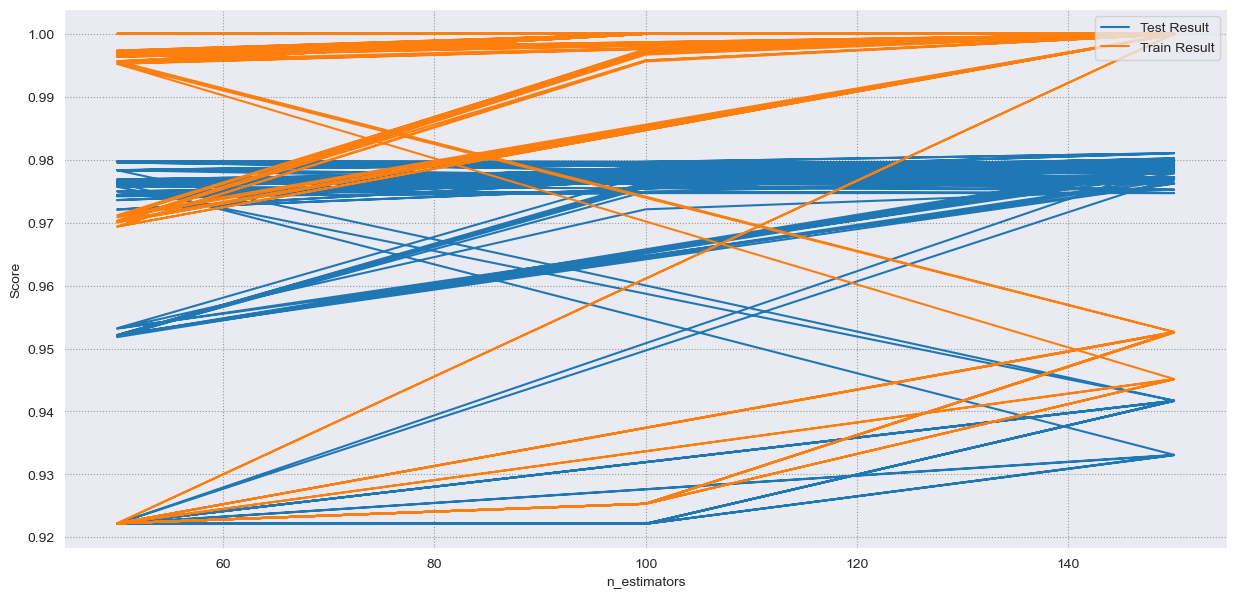

In [103]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(xgb_imbalanced_cv_results['param_n_estimators'], xgb_imbalanced_cv_results['mean_test_score'])
plt.plot(xgb_imbalanced_cv_results['param_n_estimators'], xgb_imbalanced_cv_results['mean_train_score'])
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [104]:
#print the optimum value of hyperparameters

grid_search_xgb_imbalanced.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=0.06, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [105]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_xgb_imbalanced.best_score_)
print("Best hyperparameters: ", grid_search_xgb_imbalanced.best_params_)

Best ROC_AUC:  0.9810334739767116
Best hyperparameters:  {'eta': 0.01, 'gamma': 0.06, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150}


In [106]:
# Let us fit the best XGB estimator we got from Grid Search on train data

xgb_best_imbalanced = grid_search_xgb_imbalanced.best_estimator_
xgb_best_imbalanced.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=0.06, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [107]:
# Evaluating the model on train and test data (Note: Since its a KNN model, predcitions and scores might take ~10 minutes to complete)

display_scores(model=xgb_best_imbalanced)

Model: XGBClassifier
===== Training Data Scores =====
F1 Score: 99.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.99      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 88.27%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.005120



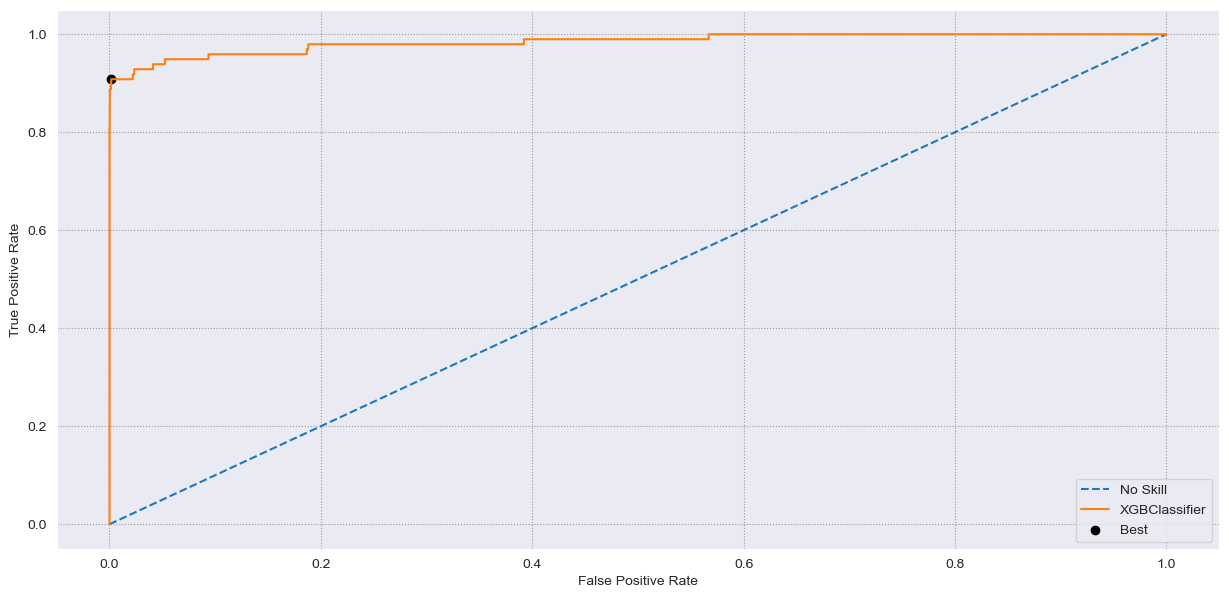

In [108]:
# Plotting the ROC AUC curve

best_xgb_thresh = plot_roc_auc_curve(xgb_best_imbalanced, X_test, y_test)

Model: XGBClassifier


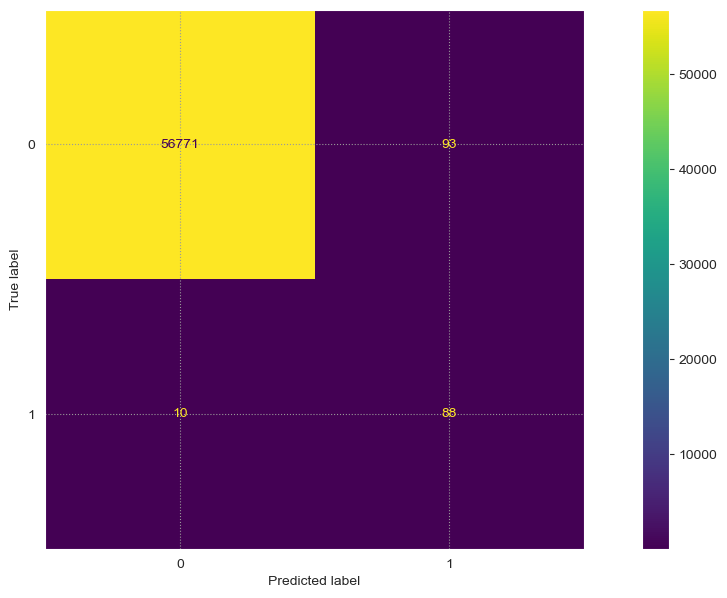

In [109]:
# Plotting the confusion matrix

plot_confusion_matrix(model=xgb_best_imbalanced, threshold=best_xgb_thresh)

In [110]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(xgb_best_imbalanced, dataset_train_type=ModelTrainDatasetType.IMBALANCED)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\XGBCLASSIFIER_IMBALANCED.pkl


In [111]:
# Let us store the XGB model results in the master results dataframe
# Note: Do not run this piece of code more than 1 time as it can cause duplicate rows to get appended to the master dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, xgb_best_imbalanced, best_thresh=best_xgb_thresh, dataset_train_type=ModelTrainDatasetType.IMBALANCED)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0      LogisticRegression                Imbalanced              0.9184   
1                     SVC                Imbalanced              0.8980   
2  DecisionTreeClassifier                Imbalanced              0.8163   
3  RandomForestClassifier                Imbalanced              0.9184   
4    KNeighborsClassifier                Imbalanced              0.8673   
5           XGBClassifier                Imbalanced              0.8980   

   Specificity  Precision  F1_Score     AUC  
0       0.9843     0.0915    0.1664  0.9513  
1       0.9822     0.0798    0.1465  0.9401  
2       0.9976     0.3670    0.5063  0.9069  
3       0.9849     0.0948    0.1719  0.9516  
4       0.9991     0.6296    0.7296  0.9332  
5       0.9984     0.4862    0.6308  0.9482

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

### The best model so far for imbalanced data is the XGBoost model. Although Logistic regression is a bit higher in AUC score, XGBoost has an overall better balance in recall, precision and specificity, highlighted further by the highest F1 score amoung all the other models

In [112]:
# Taking XGBoost as the best model for imbalanced data

clf = xgb_best_imbalanced

Top var = 14
2nd Top var = 10
3rd Top var = 7


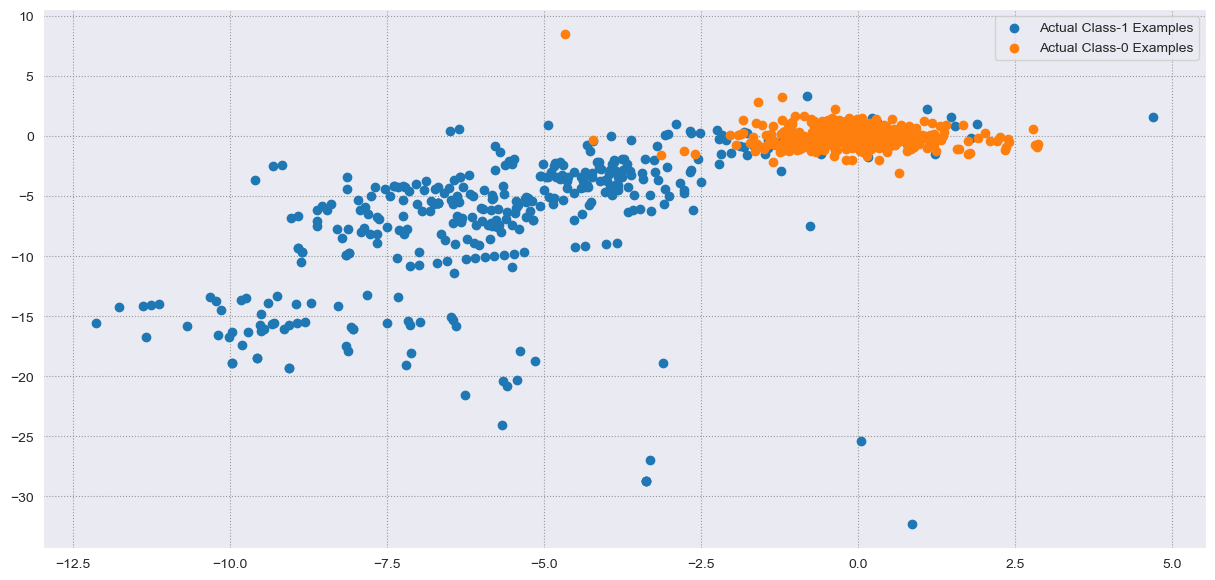

In [113]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = SNS_DEFAULT_FIG_SIZE

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

Note: All the above balancing techniques are executed in the subsequent cells

# PART B: Balancing Data Technique - Random Oversampling

Original dataset shape: 
0    227451
1       394
Name: Class, dtype: int64




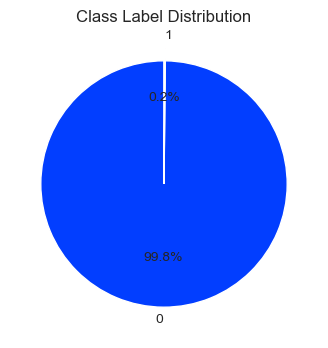

In [114]:
print('Original dataset shape: ')
print(y_train.value_counts())
print('\n')
plot_class_distribution(y_train)

Resampled dataset shape: 
0    227451
1    227451
Name: Class, dtype: int64


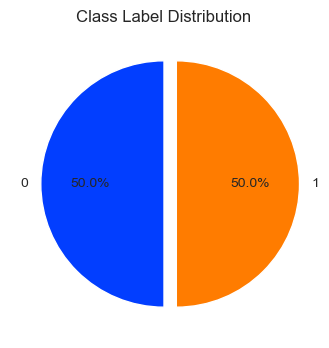

In [115]:
ros = RandomOverSampler(random_state=MODEL_RANDOM_STATE)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape: ')
print(y_ros.value_counts())
plot_class_distribution(y_ros)

### MODEL 1: LOGISTIC REGRESSION

In [116]:
# Logistic Regression

logreg_ran_oversample_model = LogisticRegression(solver = 'saga', random_state=MODEL_RANDOM_STATE)

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=MODEL_RANDOM_STATE)

# Define the hyperparameter grid for grid search
param_grid = {'C': [0.01, 0.1, 1, 10],  # Regularization parameter
              'penalty': ['l1', 'l2']}  # Penalty type (l1 or L2)

# Create GridSearchCV object
grid_search_logreg_ran_oversample = GridSearchCV(logreg_ran_oversample_model, param_grid, cv=folds, scoring='roc_auc', verbose=1, return_train_score=True, n_jobs=-1)

In [117]:
# Fit the grid search to the data

grid_search_logreg_ran_oversample.fit(X_ros, y_ros)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [118]:
# cross validation results of logistic regression model on random oversampled data
logreg_ran_oversample_cv_results = pd.DataFrame(grid_search_logreg_ran_oversample.cv_results_)
logreg_ran_oversample_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      30.539028      6.516172           0.0276        0.005748    0.01   
1      27.439225      6.067746           0.0284        0.004499    0.01   
2      31.489629      4.759725           0.0300        0.007848     0.1   
3      28.115226      4.606805           0.0262        0.004118     0.1   
4      31.389628      5.249012           0.0322        0.003059       1   
5      28.148225      4.856882           0.0288        0.002315       1   
6      27.848026      5.513016           0.0204        0.007060      10   
7      20.174019      3.990585           0.0138        0.000400      10   

  param_penalty                        params  split0_test_score  \
0            l1  {'C': 0.01, 'penalty': 'l1'}           0.987228   
1            l2  {'C': 0.01, 'penalty': 'l2'}           0.987302   
2            l1   {'C': 0.1, 'penalty': 'l1'}           0.987438   
3            l2   {'C': 0.1, 'penalty': 'l2'}           0.987441   
4            l1     {'C': 1, 'penalty': 'l1'}           0.987457   
5            l2     {'C': 1, 'penalty': 'l2'}           0.987457   
6            l1    {'C': 10, 'penalty': 'l1'}           0.987460   
7            l2    {'C': 10, 'penalty': 'l2'}           0.987460   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.986979           0.987239  ...         0.987055        0.000207   
1           0.987059           0.987317  ...         0.987138        0.000198   
2           0.987188           0.987459  ...         0.987276        0.000195   
3           0.987192           0.987463  ...         0.987280        0.000194   
4           0.987207           0.987480  ...         0.987295        0.000194   
5           0.987208           0.987480  ...         0.987296        0.000195   
6           0.987210           0.987482  ...         0.987297        0.000195   
7           0.987209           0.987482  ...         0.987297        0.000195   

   rank_test_score  split0_train_score  split1_train_score  \
0                8            0.987037            0.987046   
1                7            0.987120            0.987128   
2                6            0.987259            0.987263   
3                5            0.987264            0.987267   
4                4            0.987278            0.987282   
5                3            0.987278            0.987282   
6                2            0.987280            0.987283   
7                1            0.987280            0.987283   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.987031            0.987084            0.987139   
1            0.987109            0.987175            0.987217   
2            0.987247            0.987312            0.987369   
3            0.987250            0.987318            0.987373   
4            0.987265            0.987333            0.987389   
5            0.987265            0.987334            0.987390   
6            0.987267            0.987335            0.987392   
7            0.987267            0.987335            0.987392   

   mean_train_score  std_train_score  
0          0.987067         0.000040  
1          0.987150         0.000040  
2          0.987290         0.000045  
3          0.987294         0.000045  
4          0.987309         0.000046  
5          0.987310         0.000046  
6          0.987311         0.000046  
7          0.987311         0.000047  

[8 rows x 22 columns]

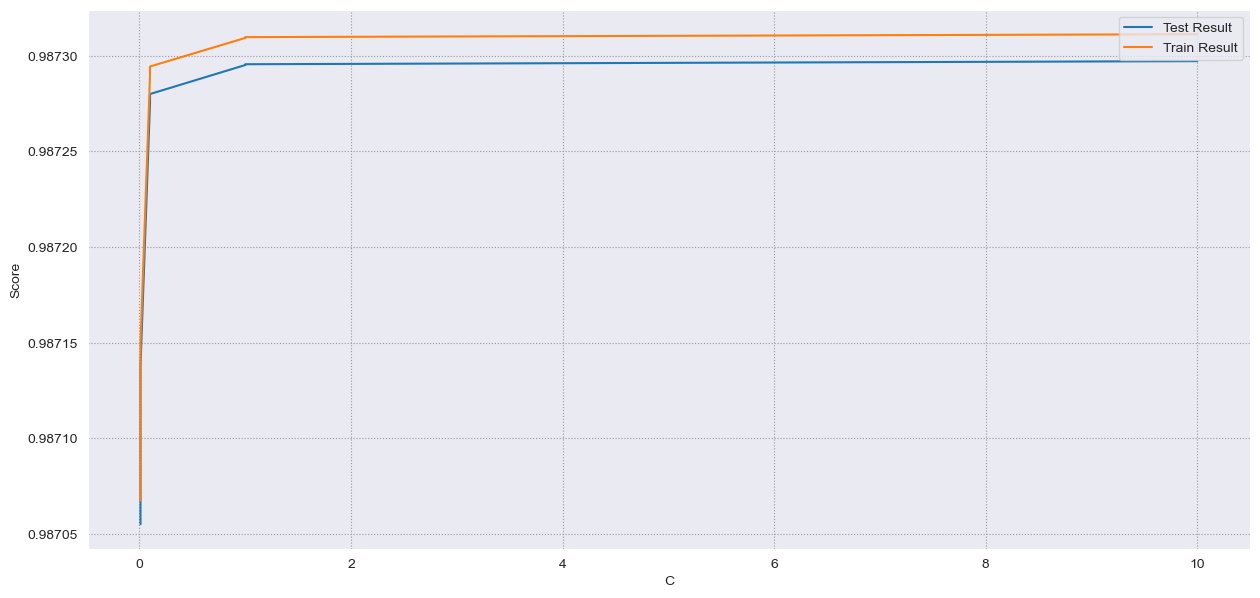

In [119]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(logreg_ran_oversample_cv_results['param_C'], logreg_ran_oversample_cv_results['mean_test_score'])
plt.plot(logreg_ran_oversample_cv_results['param_C'], logreg_ran_oversample_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [120]:
#print the optimum value of hyperparameters

grid_search_logreg_ran_oversample.best_estimator_

LogisticRegression(C=10, random_state=42, solver='saga')

In [121]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_logreg_ran_oversample.best_score_)
print("Best hyperparameters: ", grid_search_logreg_ran_oversample.best_params_)

Best ROC_AUC:  0.9872972126046351
Best hyperparameters:  {'C': 10, 'penalty': 'l2'}


In [122]:
# Let us fit the best estimator we got from Grid Search on train data

logreg_best_ran_oversample = grid_search_logreg_ran_oversample.best_estimator_
logreg_best_ran_oversample.fit(X_ros, y_ros)

LogisticRegression(C=10, random_state=42, solver='saga')

In [123]:
# Evaluating the model on test data
display_scores(logreg_best_ran_oversample)

Model: LogisticRegression
===== Training Data Scores =====
F1 Score: 10.5%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    227451
           1       0.06      0.92      0.11       394

    accuracy                           0.97    227845
   macro avg       0.53      0.94      0.55    227845
weighted avg       1.00      0.97      0.98    227845


===== Test Data Scores =====
F1 Score: 10.32%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



Best Threshold=0.740829



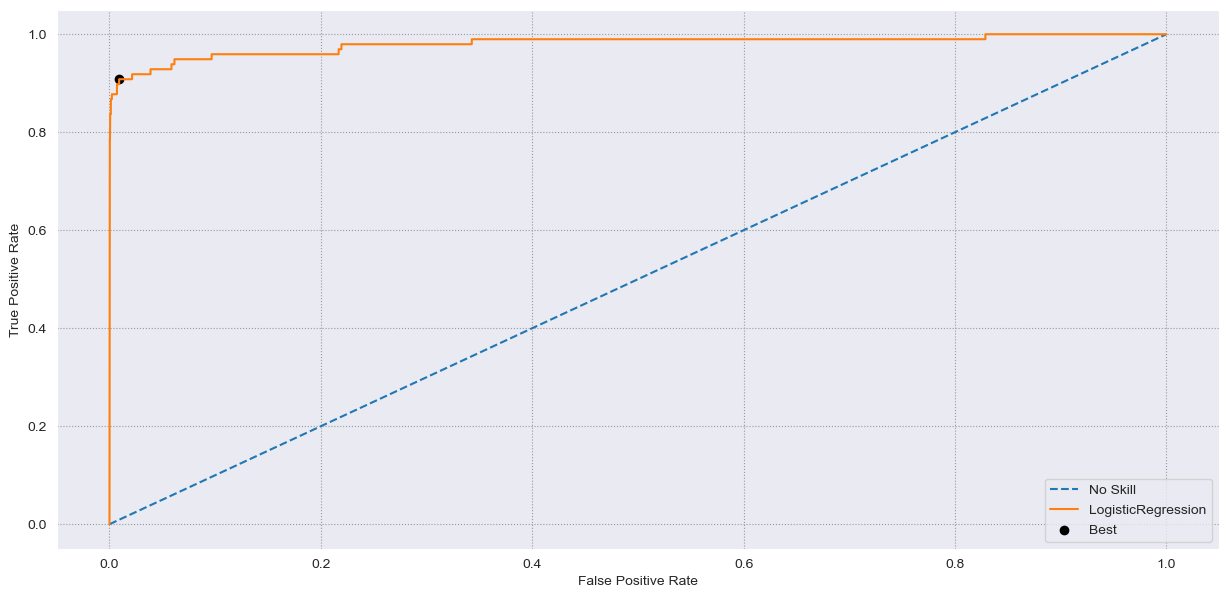

In [124]:
# Plotting the ROC AUC curve
best_log_thresh_ran_oversample = plot_roc_auc_curve(logreg_best_ran_oversample, X_test, y_test)

Model: LogisticRegression


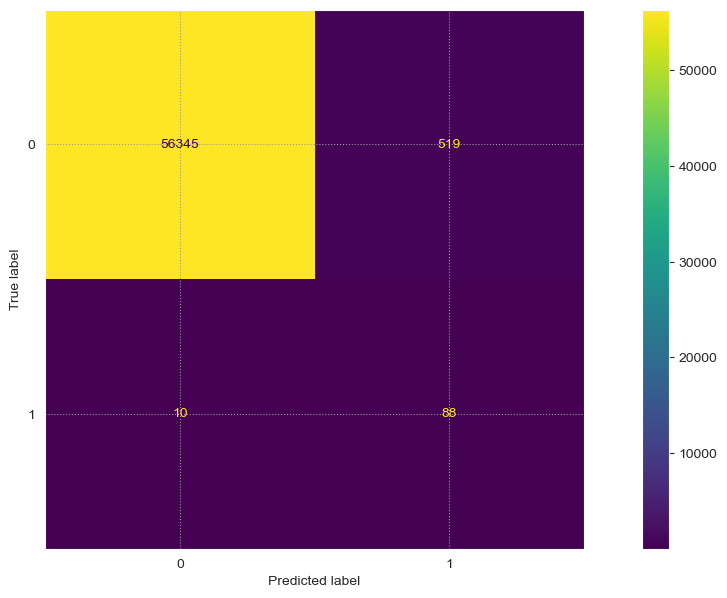

In [125]:
# Plotting the confusion matrix

plot_confusion_matrix(model=logreg_best_ran_oversample, threshold=best_log_thresh_ran_oversample)

In [126]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(logreg_best_ran_oversample, dataset_train_type=ModelTrainDatasetType.RANDOM_OVERSAMPLING)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\LOGISTICREGRESSION_RANDOM OVERSAMPLING.pkl


In [127]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, logreg_best_ran_oversample, best_thresh=best_log_thresh_ran_oversample, dataset_train_type=ModelTrainDatasetType.RANDOM_OVERSAMPLING)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0      LogisticRegression                Imbalanced              0.9184   
1                     SVC                Imbalanced              0.8980   
2  DecisionTreeClassifier                Imbalanced              0.8163   
3  RandomForestClassifier                Imbalanced              0.9184   
4    KNeighborsClassifier                Imbalanced              0.8673   
5           XGBClassifier                Imbalanced              0.8980   
6      LogisticRegression       Random Oversampling              0.8980   

   Specificity  Precision  F1_Score     AUC  
0       0.9843     0.0915    0.1664  0.9513  
1       0.9822     0.0798    0.1465  0.9401  
2       0.9976     0.3670    0.5063  0.9069  
3       0.9849     0.0948    0.1719  0.9516  
4       0.9991     0.6296    0.7296  0.9332  
5       0.9984     0.4862    0.6308  0.9482  
6       0.9909     0.1450    0.2496  0.9444

## MODEL 2: DECISION TREE

In [128]:
# Decision Tree
dtree_ran_oversample = DecisionTreeClassifier(random_state=MODEL_RANDOM_STATE)

# Parameter Grid
param_grid = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [4, 5, 10],
          'min_samples_split': [2500, 3000],
          'min_samples_leaf': [27, 28, 35],
          'max_features':['sqrt', 'log2']}

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=MODEL_RANDOM_STATE)

# create gridsearch object
grid_search_dtree_ran_oversample = GridSearchCV(estimator=dtree_ran_oversample, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=1)

In [129]:
# Fit the grid search to the random oversampled data
grid_search_dtree_ran_oversample.fit(X_ros, y_ros)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [27, 28, 35],
                         'min_samples_split': [2500, 3000],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [130]:
# cross validation results of Decision Tree model on Random Oversampled Data
dtree_ran_oversample_cv_results = pd.DataFrame(grid_search_dtree_ran_oversample.cv_results_)
dtree_ran_oversample_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.611401      0.079122         0.045200        0.016845   
1       0.560400      0.067420         0.046600        0.005238   
2       1.604601      0.109127         0.044201        0.016424   
3       0.539601      0.080926         0.042600        0.004454   
4       1.623202      0.013060         0.048600        0.011638   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               4               sqrt                     27   
1            gini               4               sqrt                     27   
2            gini               4               sqrt                     27   
3            gini               4               sqrt                     27   
4            gini               4               sqrt                     28   

  param_min_samples_split param_splitter  ... mean_test_score  std_test_score  \
0                    2500           best  ...        0.942761        0.000699   
1                    2500         random  ...        0.825611        0.053969   
2                    3000           best  ...        0.942761        0.000699   
3                    3000         random  ...        0.825611        0.053969   
4                    2500           best  ...        0.942761        0.000699   

   rank_test_score  split0_train_score  split1_train_score  \
0               68            0.942566            0.942911   
1              118            0.879012            0.817484   
2               68            0.942566            0.942911   
3              118            0.879012            0.817484   
4               68            0.942566            0.942911   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.942683            0.943037            0.942651   
1            0.856864            0.849832            0.722989   
2            0.942683            0.943037            0.942651   
3            0.856864            0.849832            0.722989   
4            0.942683            0.943037            0.942651   

   mean_train_score  std_train_score  
0          0.942770         0.000176  
1          0.825236         0.054794  
2          0.942770         0.000176  
3          0.825236         0.054794  
4          0.942770         0.000176  

[5 rows x 26 columns]

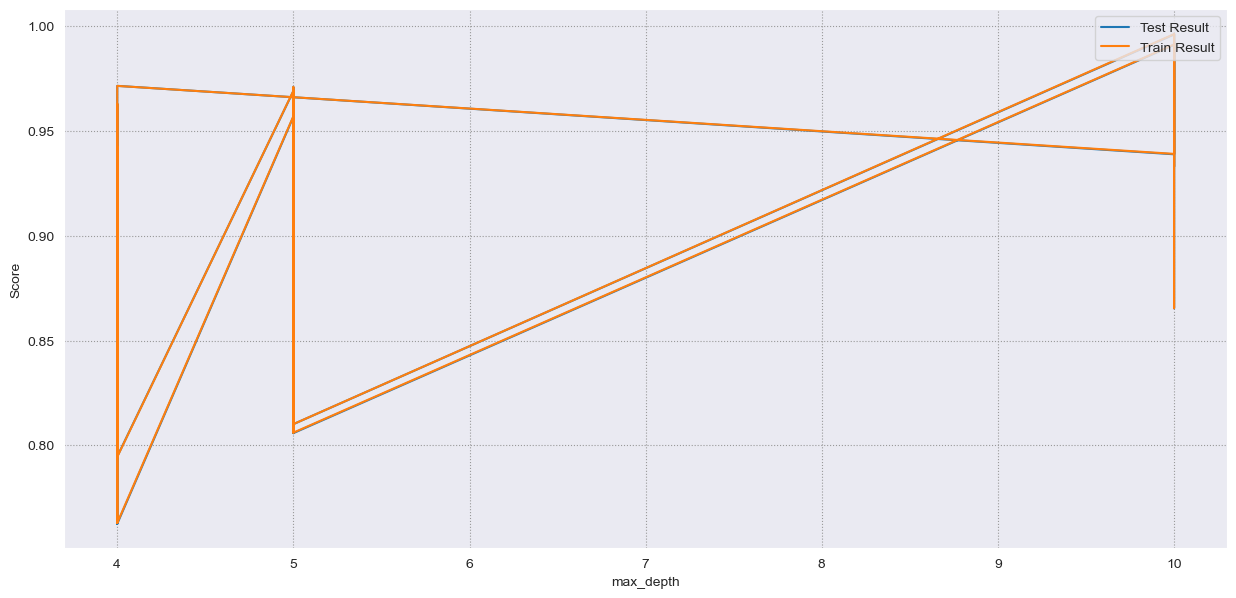

In [131]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(dtree_ran_oversample_cv_results['param_max_depth'], dtree_ran_oversample_cv_results['mean_test_score'])
plt.plot(dtree_ran_oversample_cv_results['param_max_depth'], dtree_ran_oversample_cv_results['mean_train_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [132]:
#print the optimum value of hyperparameters

grid_search_dtree_ran_oversample.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=27, min_samples_split=2500,
                       random_state=42)

In [133]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_dtree_ran_oversample.best_score_)
print("Best hyperparameters: ", grid_search_dtree_ran_oversample.best_params_)

Best ROC_AUC:  0.9963782291819229
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 27, 'min_samples_split': 2500, 'splitter': 'best'}


In [134]:
# Let us fit the best estimator we got from Grid Search on train data

dtree_best_ran_oversample = grid_search_dtree_ran_oversample.best_estimator_
dtree_best_ran_oversample.fit(X_ros, y_ros)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=27, min_samples_split=2500,
                       random_state=42)

In [135]:
# Evaluating the model on train and test data

display_scores(dtree_best_ran_oversample)

Model: DecisionTreeClassifier
===== Training Data Scores =====
F1 Score: 12.59%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.07      0.98      0.13       394

    accuracy                           0.98    227845
   macro avg       0.53      0.98      0.56    227845
weighted avg       1.00      0.98      0.99    227845


===== Test Data Scores =====
F1 Score: 11.8%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.90      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Best Threshold=0.863034



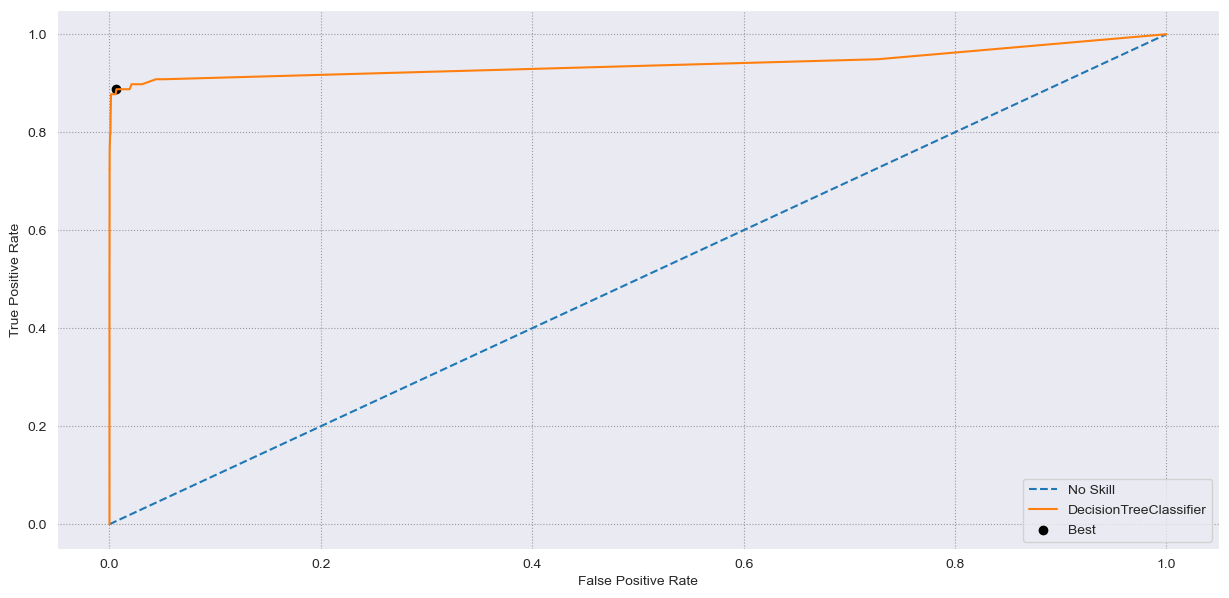

In [136]:
# Plotting the ROC AUC curve
best_dtree_ran_oversample_thresh = plot_roc_auc_curve(dtree_best_ran_oversample, X_test, y_test)

Model: DecisionTreeClassifier


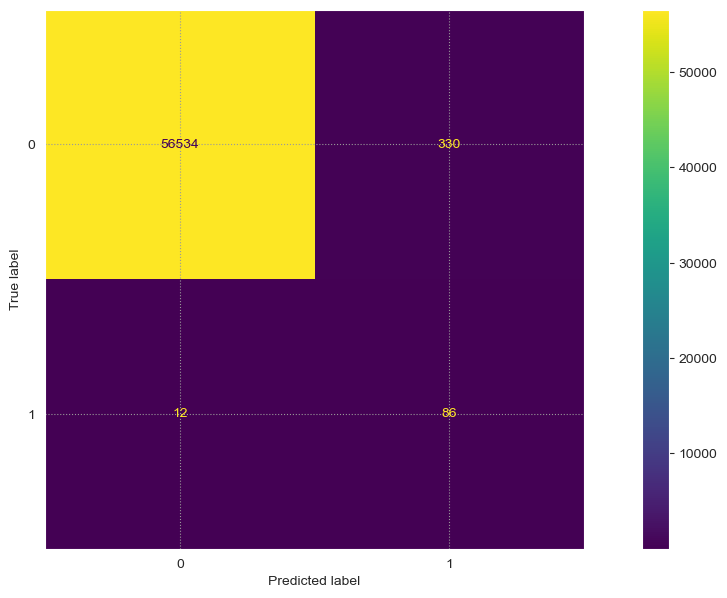

In [137]:
# Plotting the confusion matrix

plot_confusion_matrix(model=dtree_best_ran_oversample, threshold=best_dtree_ran_oversample_thresh)

In [138]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(dtree_best_ran_oversample, dataset_train_type=ModelTrainDatasetType.RANDOM_OVERSAMPLING)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\DECISIONTREECLASSIFIER_RANDOM OVERSAMPLING.pkl


In [139]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, dtree_best_ran_oversample, best_thresh=best_dtree_ran_oversample_thresh, dataset_train_type=ModelTrainDatasetType.RANDOM_OVERSAMPLING)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0      LogisticRegression                Imbalanced              0.9184   
1                     SVC                Imbalanced              0.8980   
2  DecisionTreeClassifier                Imbalanced              0.8163   
3  RandomForestClassifier                Imbalanced              0.9184   
4    KNeighborsClassifier                Imbalanced              0.8673   
5           XGBClassifier                Imbalanced              0.8980   
6      LogisticRegression       Random Oversampling              0.8980   
7  DecisionTreeClassifier       Random Oversampling              0.8776   

   Specificity  Precision  F1_Score     AUC  
0       0.9843     0.0915    0.1664  0.9513  
1       0.9822     0.0798    0.1465  0.9401  
2       0.9976     0.3670    0.5063  0.9069  
3       0.9849     0.0948    0.1719  0.9516  
4       0.9991     0.6296    0.7296  0.9332  
5       0.9984     0.4862    0.6308  0.9482  
6       0.9909     0.1450    0.2496  0.9444  
7       0.9942     0.2067    0.3346  0.9359

## MODEL 3: RANDOM FOREST

In [140]:
# Random Forest
rf_ran_oversample = RandomForestClassifier(n_jobs=-1, random_state=MODEL_RANDOM_STATE)

# hyperparameter space
param_grid = {'criterion': ['gini', 'entropy'],
              'n_estimators': [20, 50, 100],
              'min_samples_leaf': [200, 500, 550],
              'max_features': ['sqrt', 'log2']}

# create 3 folds
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=MODEL_RANDOM_STATE)

# create gridsearch object
grid_search_rf_ran_oversample = GridSearchCV(estimator=rf_ran_oversample, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, verbose=1, return_train_score=True)

In [141]:
# Fit the grid search to the random oversampled data Note: (Takes approx. 2 hours to complete)
grid_search_rf_ran_oversample.fit(X_ros, y_ros)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [200, 500, 550],
                         'n_estimators': [20, 50, 100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [142]:
# cross validation results of Random Forest model on Random Oversampled Data
rf_ran_oversample_cv_results = pd.DataFrame(grid_search_rf_ran_oversample.cv_results_)
rf_ran_oversample_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      27.383692      7.730546        27.008025        5.052340   
1      53.925050      3.864173         7.932674        3.484322   
2      62.725726      0.218359         2.283335        0.069877   
3      37.900368      8.937510        19.692352        6.589697   
4      41.565037     12.071446        19.333018       11.935405   

  param_criterion param_max_features param_min_samples_leaf  \
0            gini               sqrt                    200   
1            gini               sqrt                    200   
2            gini               sqrt                    200   
3            gini               sqrt                    500   
4            gini               sqrt                    500   

  param_n_estimators                                             params  \
0                 20  {'criterion': 'gini', 'max_features': 'sqrt', ...   
1                 50  {'criterion': 'gini', 'max_features': 'sqrt', ...   
2                100  {'criterion': 'gini', 'max_features': 'sqrt', ...   
3                 20  {'criterion': 'gini', 'max_features': 'sqrt', ...   
4                 50  {'criterion': 'gini', 'max_features': 'sqrt', ...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.999940           0.999932           0.999952         0.999942   
1           0.999950           0.999933           0.999959         0.999947   
2           0.999951           0.999938           0.999959         0.999949   
3           0.999813           0.999794           0.999844         0.999817   
4           0.999832           0.999816           0.999849         0.999832   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.000008               12            0.999949            0.999959   
1        0.000011               10            0.999954            0.999959   
2        0.000008                7            0.999956            0.999959   
3        0.000021               29            0.999820            0.999830   
4        0.000014               25            0.999841            0.999851   

   split2_train_score  mean_train_score  std_train_score  
0            0.999946          0.999951         0.000005  
1            0.999949          0.999954         0.000004  
2            0.999951          0.999955         0.000003  
3            0.999822          0.999824         0.000004  
4            0.999834          0.999842         0.000007

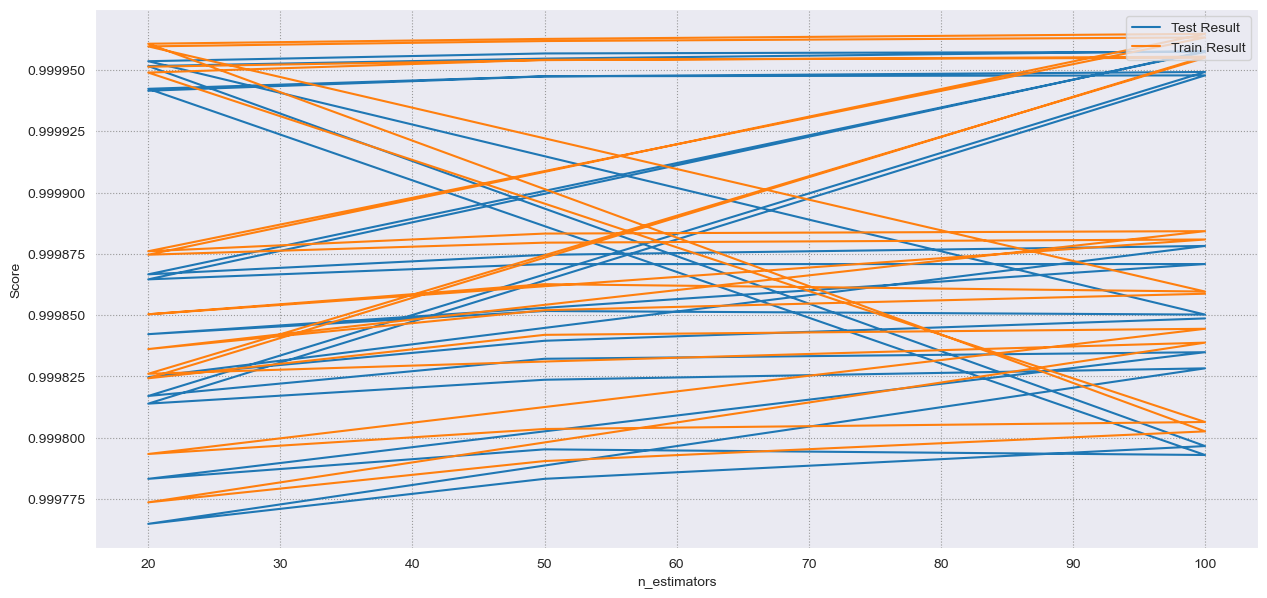

In [143]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(rf_ran_oversample_cv_results['param_n_estimators'], rf_ran_oversample_cv_results['mean_test_score'])
plt.plot(rf_ran_oversample_cv_results['param_n_estimators'], rf_ran_oversample_cv_results['mean_train_score'])
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [144]:
#print the optimum value of hyperparameters

grid_search_rf_ran_oversample.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=200, n_jobs=-1,
                       random_state=42)

In [145]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_rf_ran_oversample.best_score_)
print("Best hyperparameters: ", grid_search_rf_ran_oversample.best_params_)

Best ROC_AUC:  0.999957631387388
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 200, 'n_estimators': 100}


In [146]:
# Let us fit the best estimator we got from Grid Search on train data

rf_best_ran_oversample = grid_search_rf_ran_oversample.best_estimator_
rf_best_ran_oversample.fit(X_ros, y_ros)

RandomForestClassifier(criterion='entropy', min_samples_leaf=200, n_jobs=-1,
                       random_state=42)

In [147]:
# Evaluating the model on train and test data

display_scores(rf_best_ran_oversample)

Model: RandomForestClassifier
===== Training Data Scores =====
F1 Score: 73.17%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.58      1.00      0.73       394

    accuracy                           1.00    227845
   macro avg       0.79      1.00      0.87    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 68.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.56      0.87      0.68        98

    accuracy                           1.00     56962
   macro avg       0.78      0.93      0.84     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.100620



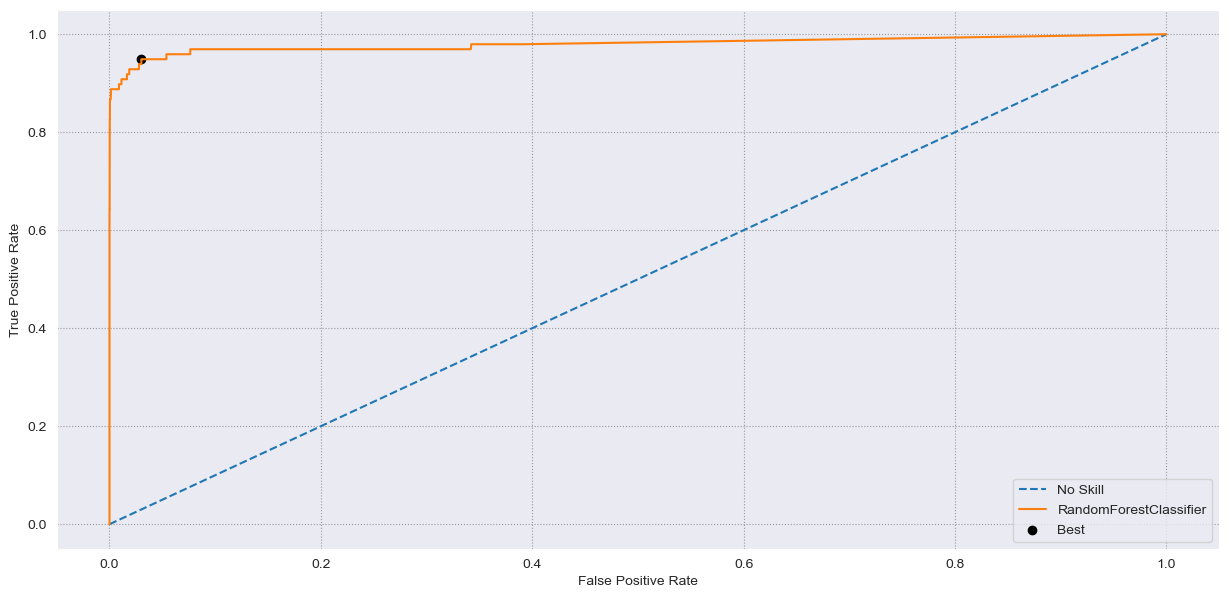

In [148]:
# Plotting the ROC AUC curve
best_rf_ran_oversample_thresh = plot_roc_auc_curve(rf_best_ran_oversample, X_test, y_test)

Model: RandomForestClassifier


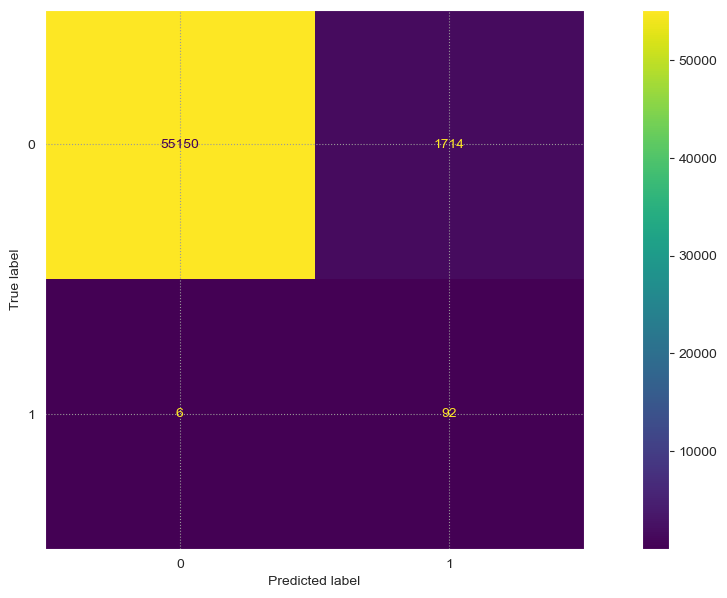

In [149]:
# Plotting the confusion matrix

plot_confusion_matrix(model=rf_best_ran_oversample, threshold=best_rf_ran_oversample_thresh)

In [150]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(rf_best_ran_oversample, dataset_train_type=ModelTrainDatasetType.RANDOM_OVERSAMPLING)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\RANDOMFORESTCLASSIFIER_RANDOM OVERSAMPLING.pkl


In [151]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, rf_best_ran_oversample, best_thresh=best_rf_ran_oversample_thresh, dataset_train_type=ModelTrainDatasetType.RANDOM_OVERSAMPLING)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0      LogisticRegression                Imbalanced              0.9184   
1                     SVC                Imbalanced              0.8980   
2  DecisionTreeClassifier                Imbalanced              0.8163   
3  RandomForestClassifier                Imbalanced              0.9184   
4    KNeighborsClassifier                Imbalanced              0.8673   
5           XGBClassifier                Imbalanced              0.8980   
6      LogisticRegression       Random Oversampling              0.8980   
7  DecisionTreeClassifier       Random Oversampling              0.8776   
8  RandomForestClassifier       Random Oversampling              0.9388   

   Specificity  Precision  F1_Score     AUC  
0       0.9843     0.0915    0.1664  0.9513  
1       0.9822     0.0798    0.1465  0.9401  
2       0.9976     0.3670    0.5063  0.9069  
3       0.9849     0.0948    0.1719  0.9516  
4       0.9991     0.6296    0.7296  0.9332  
5       0.9984     0.4862    0.6308  0.9482  
6       0.9909     0.1450    0.2496  0.9444  
7       0.9942     0.2067    0.3346  0.9359  
8       0.9699     0.0509    0.0966  0.9543

## MODEL 4: KNN

In [152]:
# KNN
knn_ran_oversample = KNeighborsClassifier(n_jobs=-1)

# Param Grid
param_grid = {'n_neighbors': [10, 20, 30]}

# create 3 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state=MODEL_RANDOM_STATE)

grid_search_knn_ran_oversample = GridSearchCV(estimator=knn_ran_oversample, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, verbose=1, return_train_score=True)

In [153]:
# Fit the grid search to the random oversampled data (Note: This takes an aprrox 1 hr 30 mins to complete)
grid_search_knn_ran_oversample.fit(X_ros, y_ros)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [10, 20, 30]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [154]:
# cross validation results of KNN model on Random Oversampled Data
knn_ran_oversample_cv_results = pd.DataFrame(grid_search_knn_ran_oversample.cv_results_)
knn_ran_oversample_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.123667      0.001700       116.664175        0.603955   
1       0.139000      0.019866       117.900842        0.928373   
2       0.123000      0.002160       118.343843        0.470856   

  param_n_neighbors               params  split0_test_score  \
0                10  {'n_neighbors': 10}           0.999888   
1                20  {'n_neighbors': 20}           0.999888   
2                30  {'n_neighbors': 30}           0.999888   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999868           0.999809         0.999855        0.000034   
1           0.999868           0.999809         0.999855        0.000034   
2           0.999868           0.999809         0.999855        0.000034   

   rank_test_score  split0_train_score  split1_train_score  \
0                1                 1.0                 1.0   
1                1                 1.0                 1.0   
2                3                 1.0                 1.0   

   split2_train_score  mean_train_score  std_train_score  
0                 1.0               1.0              0.0  
1                 1.0               1.0              0.0  
2                 1.0               1.0              0.0

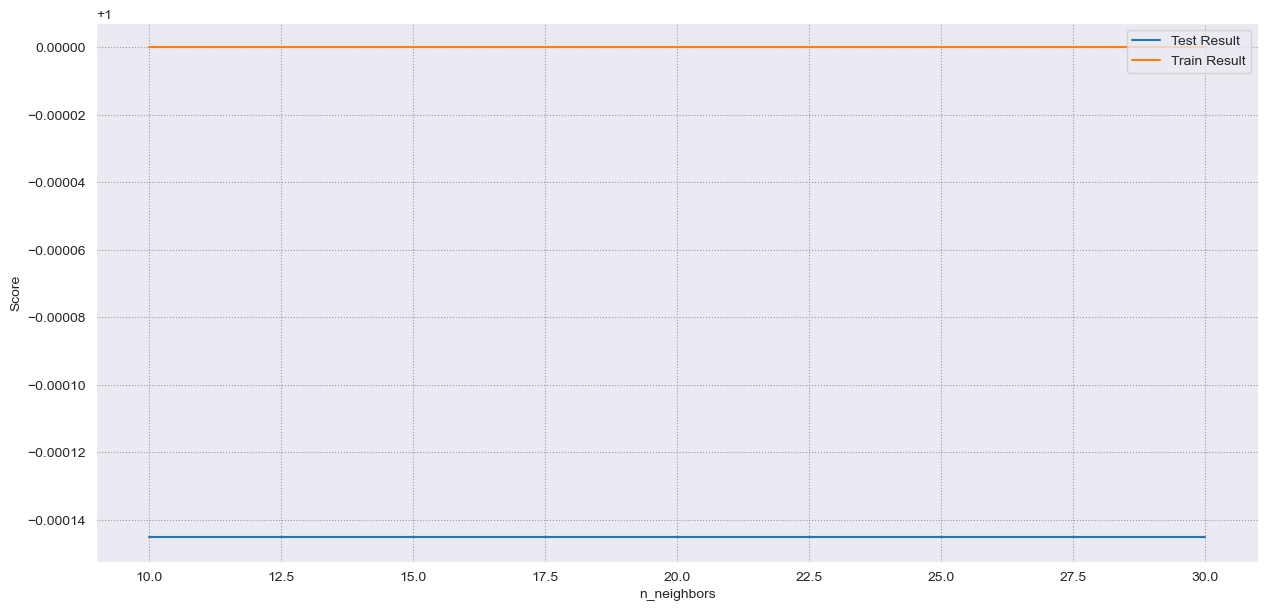

In [155]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(knn_ran_oversample_cv_results['param_n_neighbors'], knn_ran_oversample_cv_results['mean_test_score'])
plt.plot(knn_ran_oversample_cv_results['param_n_neighbors'], knn_ran_oversample_cv_results['mean_train_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [156]:
#print the optimum value of hyperparameters

grid_search_knn_ran_oversample.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [157]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_knn_ran_oversample.best_score_)
print("Best hyperparameters: ", grid_search_knn_ran_oversample.best_params_)

Best ROC_AUC:  0.9998549138056109
Best hyperparameters:  {'n_neighbors': 10}


In [158]:
# Let us fit the best estimator we got from Grid Search on train data

knn_best_ran_oversample = grid_search_knn_ran_oversample.best_estimator_
knn_best_ran_oversample.fit(X_ros, y_ros)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [159]:
# Evaluating the model on train and test data

display_scores(knn_best_ran_oversample)

Model: KNeighborsClassifier
===== Training Data Scores =====
F1 Score: 79.52%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.66      1.00      0.80       394

    accuracy                           1.00    227845
   macro avg       0.83      1.00      0.90    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 72.27%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.88      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.94      0.86     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.400000



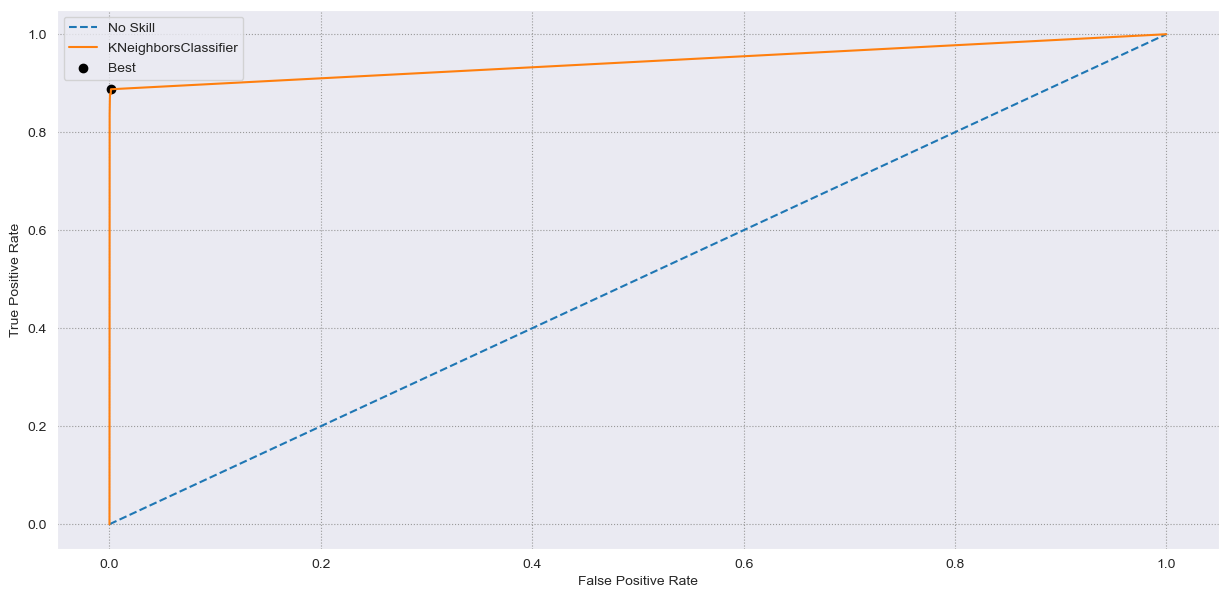

In [160]:
# Plotting the ROC AUC curve
best_knn_ran_oversample_thresh = plot_roc_auc_curve(knn_best_ran_oversample, X_test, y_test)

Model: KNeighborsClassifier


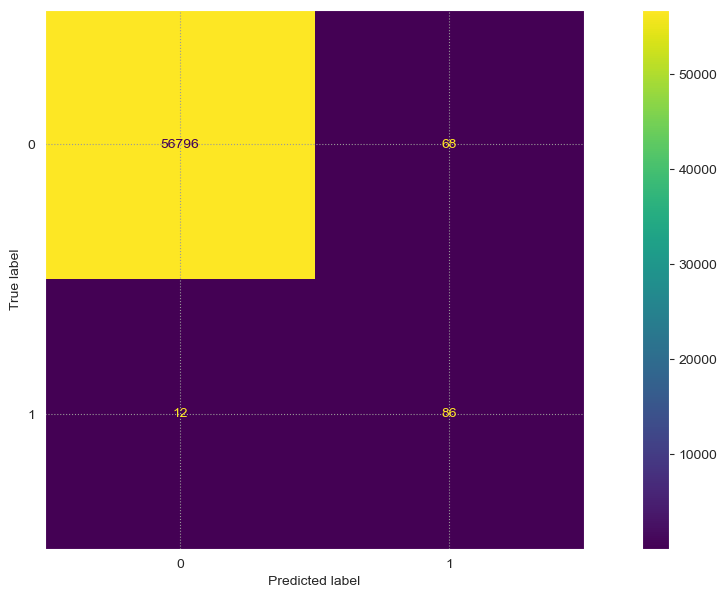

In [161]:
# Plotting the confusion matrix

plot_confusion_matrix(model=knn_best_ran_oversample, threshold=best_knn_ran_oversample_thresh)

In [162]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(knn_best_ran_oversample, dataset_train_type=ModelTrainDatasetType.RANDOM_OVERSAMPLING)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\KNEIGHBORSCLASSIFIER_RANDOM OVERSAMPLING.pkl


In [163]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, knn_best_ran_oversample, best_thresh=best_knn_ran_oversample_thresh, dataset_train_type=ModelTrainDatasetType.RANDOM_OVERSAMPLING)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0      LogisticRegression                Imbalanced              0.9184   
1                     SVC                Imbalanced              0.8980   
2  DecisionTreeClassifier                Imbalanced              0.8163   
3  RandomForestClassifier                Imbalanced              0.9184   
4    KNeighborsClassifier                Imbalanced              0.8673   
5           XGBClassifier                Imbalanced              0.8980   
6      LogisticRegression       Random Oversampling              0.8980   
7  DecisionTreeClassifier       Random Oversampling              0.8776   
8  RandomForestClassifier       Random Oversampling              0.9388   
9    KNeighborsClassifier       Random Oversampling              0.8776   

   Specificity  Precision  F1_Score     AUC  
0       0.9843     0.0915    0.1664  0.9513  
1       0.9822     0.0798    0.1465  0.9401  
2       0.9976     0.3670    0.5063  0.9069  
3       0.9849     0.0948    0.1719  0.9516  
4       0.9991     0.6296    0.7296  0.9332  
5       0.9984     0.4862    0.6308  0.9482  
6       0.9909     0.1450    0.2496  0.9444  
7       0.9942     0.2067    0.3346  0.9359  
8       0.9699     0.0509    0.0966  0.9543  
9       0.9988     0.5584    0.6825  0.9382

## MODEL 5: XGBOOST

In [164]:
# XGBoost Classifier
xgb_ran_oversample = XGBClassifier(objective='binary:logistic')

# Param Grid
param_grid = {
        'gamma': [0.03, 0.06, 0.09],
        'max_depth': [6, 8, 15],
        'eta': [0.01, 0.05, 0.07],
        'learning_rate': [0.1, 0.3, 0.5]
        }

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state=MODEL_RANDOM_STATE)

grid_search_xgb_ran_oversample = GridSearchCV(estimator=xgb_ran_oversample, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, return_train_score=True)

In [165]:
# Fit the grid search to the random oversampled data (Note: This step takes approx. 40 minutes to complete)
grid_search_xgb_ran_oversample.fit(X_ros, y_ros)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.01, 0.05, 0.07], 'gamma': [0.03, 0.06, 0.09],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [6, 8, 15]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [166]:
# cross validation results of XGB model on Random Oversampled Data
xgb_ran_oversample_cv_results = pd.DataFrame(grid_search_xgb_ran_oversample.cv_results_)
xgb_ran_oversample_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta  \
0      11.445811      2.068290         0.308200        0.037897      0.01   
1      13.122012      1.762801         0.437800        0.061115      0.01   
2      15.307014      2.088977         0.436001        0.076999      0.01   
3      13.369412      2.448841         0.348000        0.042718      0.01   
4      15.575014      1.280316         0.415400        0.049790      0.01   

  param_gamma param_learning_rate param_max_depth  \
0        0.03                 0.1               6   
1        0.03                 0.1               8   
2        0.03                 0.1              15   
3        0.03                 0.3               6   
4        0.03                 0.3               8   

                                              params  split0_test_score  ...  \
0  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           0.999989  ...   
1  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           0.999993  ...   
2  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           0.999995  ...   
3  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           1.000000  ...   
4  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           1.000000  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.999979        0.000016               76            0.999994   
1         0.999986        0.000014               67            1.000000   
2         0.999986        0.000014               64            1.000000   
3         0.999992        0.000012               25            1.000000   
4         0.999993        0.000009               16            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999997            0.999996            0.999994   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            1.000000            1.000000            1.000000   
4            1.000000            1.000000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            0.999995          0.999995         0.000001  
1            1.000000          1.000000         0.000000  
2            1.000000          1.000000         0.000000  
3            1.000000          1.000000         0.000000  
4            1.000000          1.000000         0.000000  

[5 rows x 24 columns]

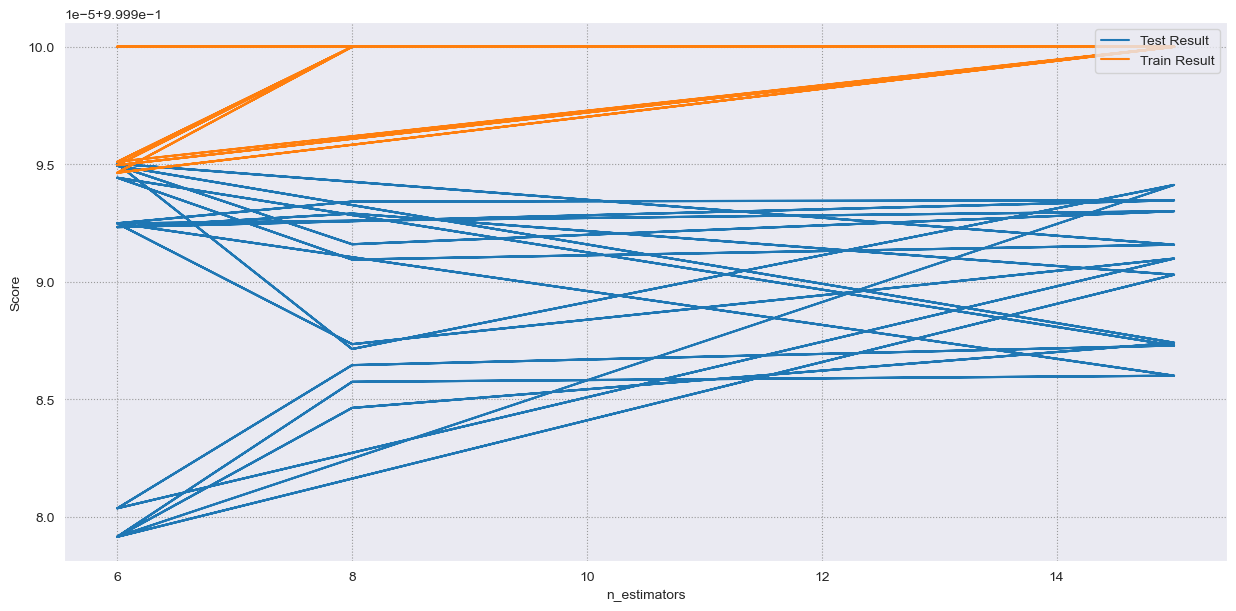

In [167]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(xgb_ran_oversample_cv_results['param_max_depth'], xgb_ran_oversample_cv_results['mean_test_score'])
plt.plot(xgb_ran_oversample_cv_results['param_max_depth'], xgb_ran_oversample_cv_results['mean_train_score'])
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [168]:
#print the optimum value of hyperparameters

grid_search_xgb_ran_oversample.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=0.09, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [169]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_xgb_ran_oversample.best_score_)
print("Best hyperparameters: ", grid_search_xgb_ran_oversample.best_params_)

Best ROC_AUC:  0.999995022092017
Best hyperparameters:  {'eta': 0.01, 'gamma': 0.09, 'learning_rate': 0.5, 'max_depth': 6}


In [170]:
# Let us fit the best estimator we got from Grid Search on train data

xgb_best_ran_oversample = grid_search_xgb_ran_oversample.best_estimator_
xgb_best_ran_oversample.fit(X_ros, y_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=0.09, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [171]:
# Evaluating the model on train and test data

display_scores(xgb_best_ran_oversample)

Model: XGBClassifier
===== Training Data Scores =====
F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 88.52%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.83      0.89        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.000173



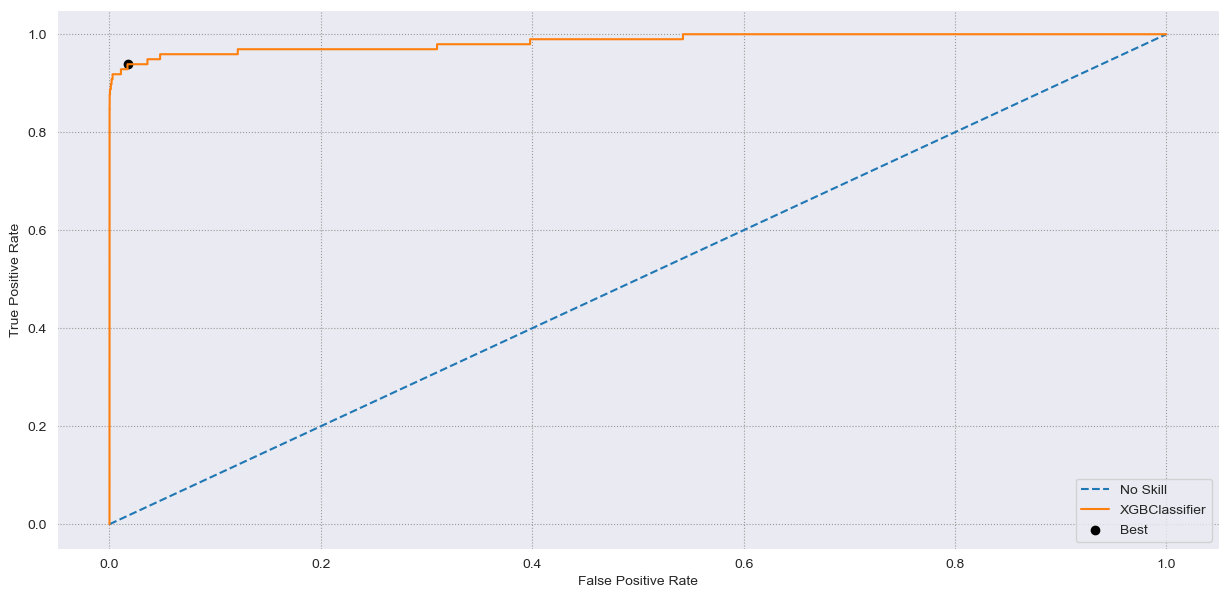

In [172]:
# Plotting the ROC AUC curve
best_xgb_ran_oversample_thresh = plot_roc_auc_curve(xgb_best_ran_oversample, X_test, y_test)

Model: XGBClassifier


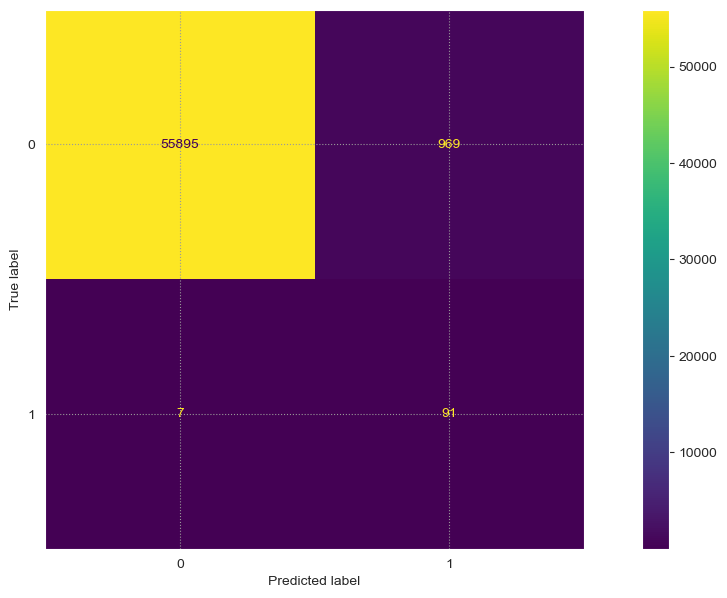

In [173]:
# Plotting the confusion matrix

plot_confusion_matrix(model=xgb_best_ran_oversample, threshold=best_xgb_ran_oversample_thresh)

In [174]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(xgb_best_ran_oversample, dataset_train_type=ModelTrainDatasetType.RANDOM_OVERSAMPLING)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\XGBCLASSIFIER_RANDOM OVERSAMPLING.pkl


In [175]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, xgb_best_ran_oversample, best_thresh=best_xgb_ran_oversample_thresh, dataset_train_type=ModelTrainDatasetType.RANDOM_OVERSAMPLING)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558

# PART B: Balancing Data Technique - SMOTE

SMOTE is a technique that aims to balance the class distribution by generating synthetic samples for the minority class. Instead of duplicating existing minority class instances, SMOTE creates synthetic instances by interpolating between existing minority class instances. This helps in mitigating the class imbalance issue and improves the model's ability to accurately predict the minority class.

In [176]:
sm = over_sampling.SMOTE(random_state=MODEL_RANDOM_STATE)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

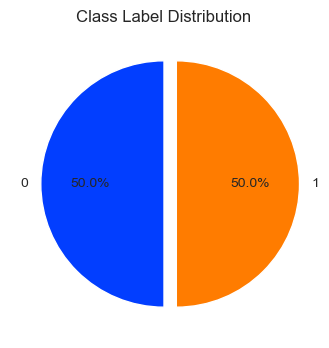

In [177]:
# Plotting the distribution of the 2 classes in the training datatset after applying SMOTE

plot_class_distribution(y_train_smote)

### Print the class distribution after applying SMOTE

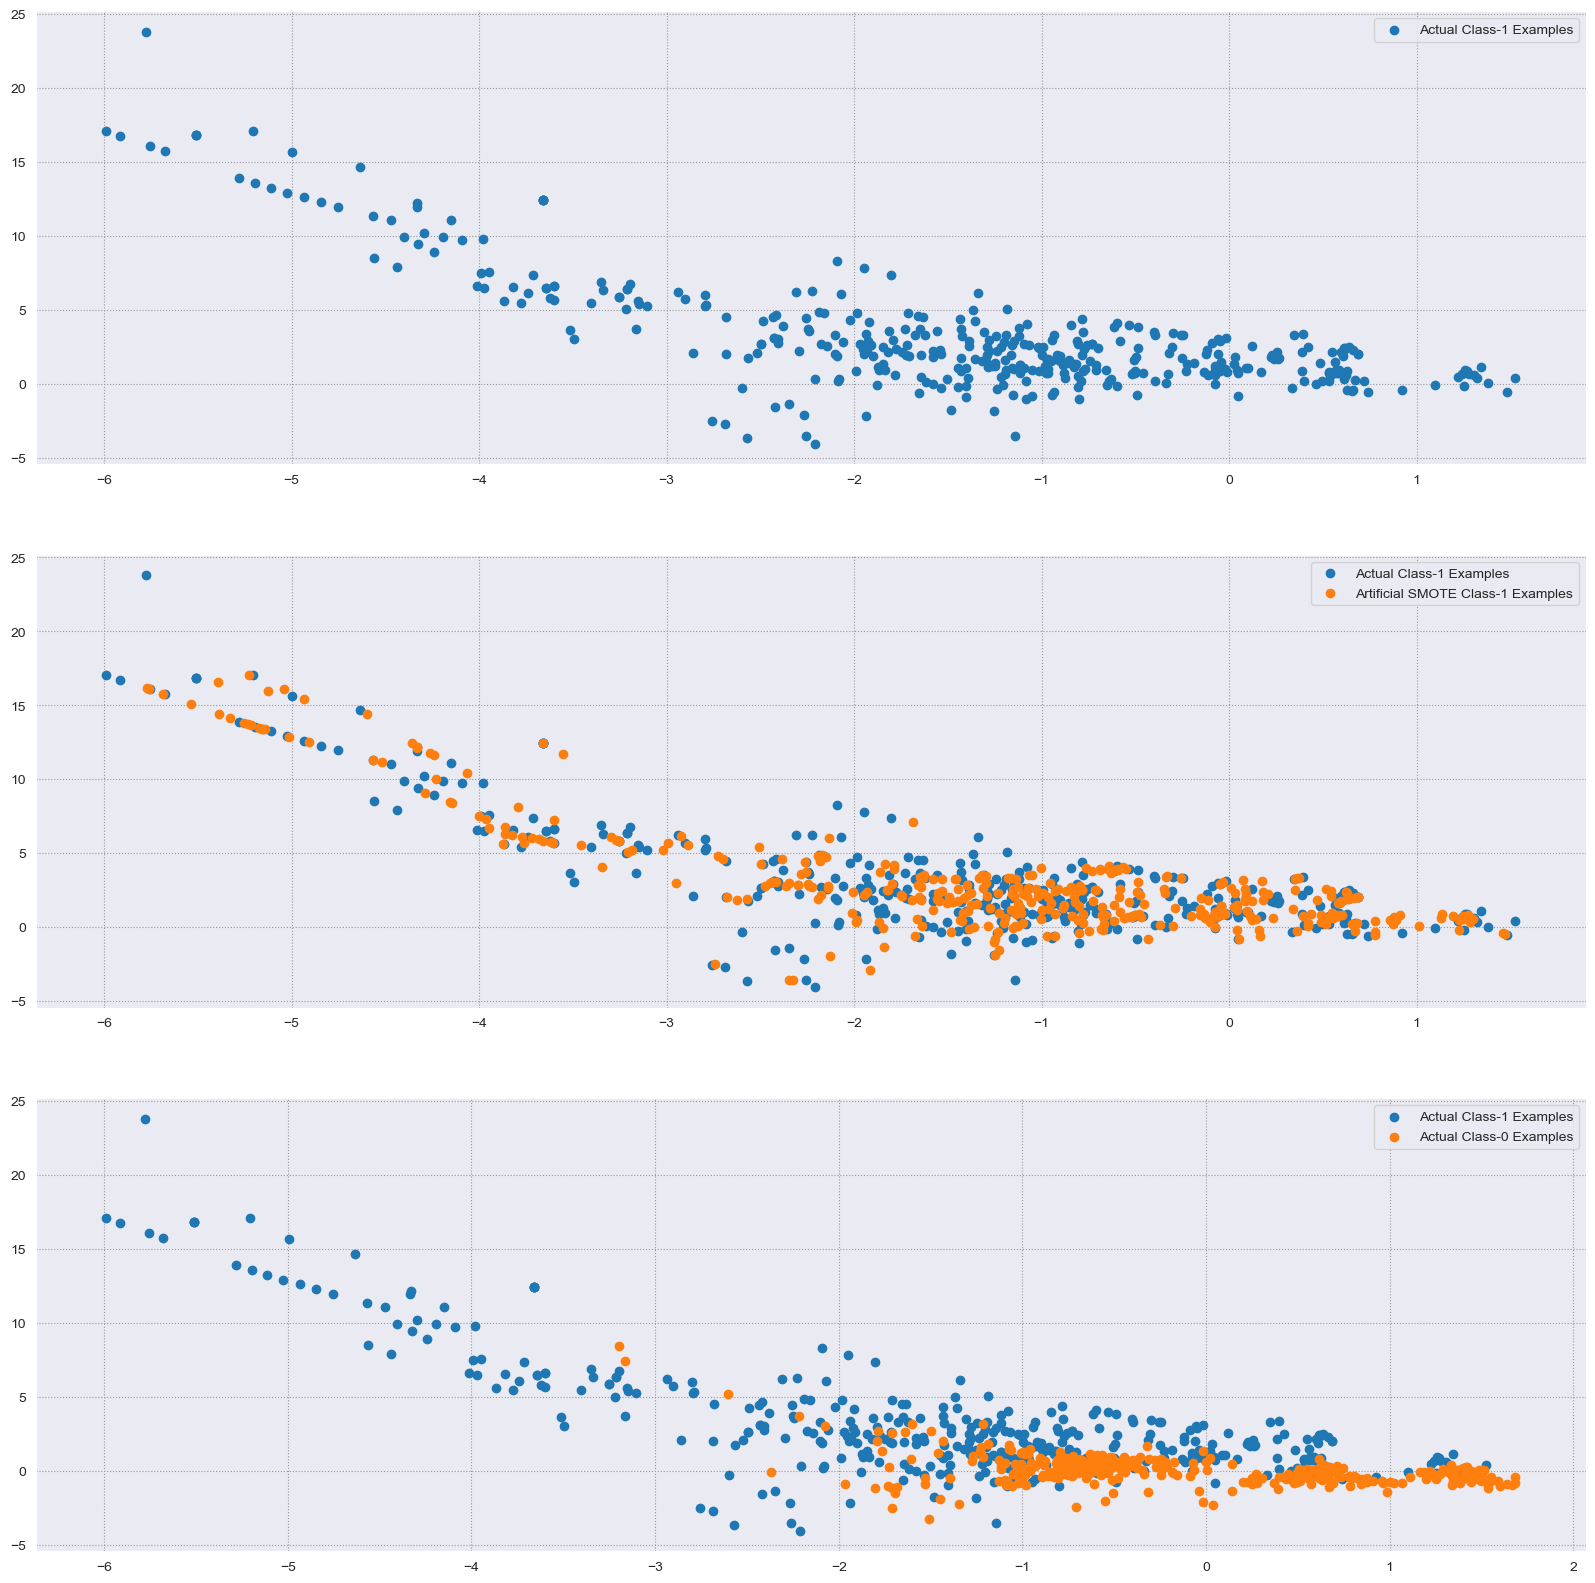

In [178]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## MODEL 1: LOGISTIC REGRESSION

In [179]:
# Logistic Regression

logreg_smote_model = LogisticRegression(solver = 'saga', random_state=MODEL_RANDOM_STATE)

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=MODEL_RANDOM_STATE)

# Define the hyperparameter grid for grid search
param_grid = {'C': [0.01, 0.1, 1, 10],  # Regularization parameter
              'penalty': ['l1', 'l2']}  # Penalty type (None or L2)

# Create GridSearchCV object
grid_search_logreg_smote = GridSearchCV(logreg_smote_model, param_grid, cv=folds, scoring='roc_auc', verbose=1, return_train_score=True, n_jobs=-1)

In [180]:
# Fit the grid search to the data
grid_search_logreg_smote.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [181]:
# cross validation results of logistic regression model on SMOTE data
logreg_smote_cv_results = pd.DataFrame(grid_search_logreg_smote.cv_results_)
logreg_smote_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      31.073428      5.922738         0.031800        0.003429    0.01   
1      28.207826      5.671552         0.036600        0.003826    0.01   
2      32.209629      3.801665         0.031800        0.003250     0.1   
3      29.028827      3.642805         0.035600        0.009330     0.1   
4      32.153829      3.887795         0.030000        0.007156       1   
5      29.324427      3.413517         0.034601        0.003827       1   
6      28.338027      5.559116         0.022400        0.008138      10   
7      19.961419      2.994318         0.014600        0.000800      10   

  param_penalty                        params  split0_test_score  \
0            l1  {'C': 0.01, 'penalty': 'l1'}           0.989330   
1            l2  {'C': 0.01, 'penalty': 'l2'}           0.989355   
2            l1   {'C': 0.1, 'penalty': 'l1'}           0.989455   
3            l2   {'C': 0.1, 'penalty': 'l2'}           0.989455   
4            l1     {'C': 1, 'penalty': 'l1'}           0.989465   
5            l2     {'C': 1, 'penalty': 'l2'}           0.989465   
6            l1    {'C': 10, 'penalty': 'l1'}           0.989466   
7            l2    {'C': 10, 'penalty': 'l2'}           0.989466   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.989359           0.989797  ...         0.989606        0.000227   
1           0.989385           0.989833  ...         0.989638        0.000232   
2           0.989482           0.989929  ...         0.989742        0.000234   
3           0.989482           0.989930  ...         0.989743        0.000235   
4           0.989492           0.989939  ...         0.989753        0.000235   
5           0.989492           0.989939  ...         0.989753        0.000235   
6           0.989493           0.989940  ...         0.989754        0.000235   
7           0.989493           0.989940  ...         0.989754        0.000235   

   rank_test_score  split0_train_score  split1_train_score  \
0                8            0.989661            0.989629   
1                7            0.989693            0.989661   
2                6            0.989796            0.989762   
3                5            0.989797            0.989763   
4                4            0.989807            0.989773   
5                3            0.989807            0.989773   
6                2            0.989808            0.989774   
7                1            0.989808            0.989774   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.989607            0.989557            0.989649   
1            0.989637            0.989592            0.989678   
2            0.989738            0.989692            0.989791   
3            0.989739            0.989693            0.989791   
4            0.989749            0.989703            0.989803   
5            0.989749            0.989703            0.989803   
6            0.989750            0.989704            0.989804   
7            0.989750            0.989704            0.989804   

   mean_train_score  std_train_score  
0          0.989621         0.000037  
1          0.989652         0.000035  
2          0.989756         0.000038  
3          0.989757         0.000038  
4          0.989767         0.000038  
5          0.989767         0.000038  
6          0.989768         0.000038  
7          0.989768         0.000038  

[8 rows x 22 columns]

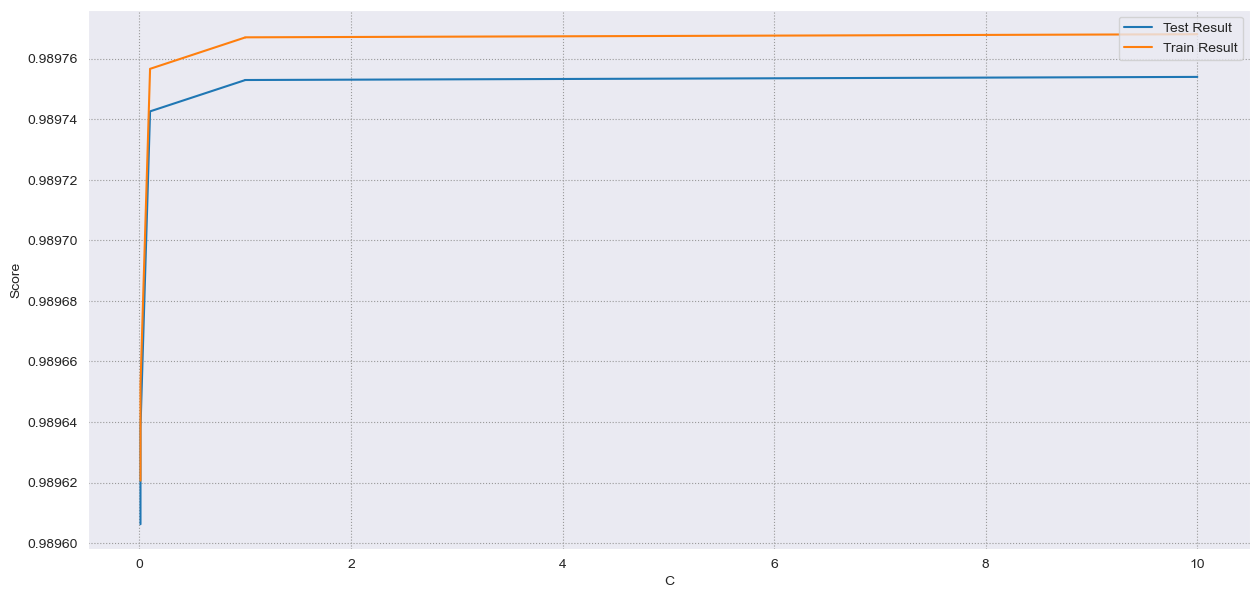

In [182]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(logreg_smote_cv_results['param_C'], logreg_smote_cv_results['mean_test_score'])
plt.plot(logreg_smote_cv_results['param_C'], logreg_smote_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [183]:
#print the optimum value of hyperparameters

grid_search_logreg_smote.best_estimator_

LogisticRegression(C=10, random_state=42, solver='saga')

In [184]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_logreg_smote.best_score_)
print("Best hyperparameters: ", grid_search_logreg_smote.best_params_)

Best ROC_AUC:  0.9897539464059161
Best hyperparameters:  {'C': 10, 'penalty': 'l2'}


In [185]:
# Let us fit the best estimator we got from Grid Search on train data

logreg_best_smote = grid_search_logreg_smote.best_estimator_
logreg_best_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=10, random_state=42, solver='saga')

In [186]:
# Evaluating the model on test data
display_scores(logreg_best_smote)

Model: LogisticRegression
===== Training Data Scores =====
F1 Score: 10.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    227451
           1       0.05      0.92      0.10       394

    accuracy                           0.97    227845
   macro avg       0.53      0.94      0.54    227845
weighted avg       1.00      0.97      0.98    227845


===== Test Data Scores =====
F1 Score: 9.71%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



Best Threshold=0.718465



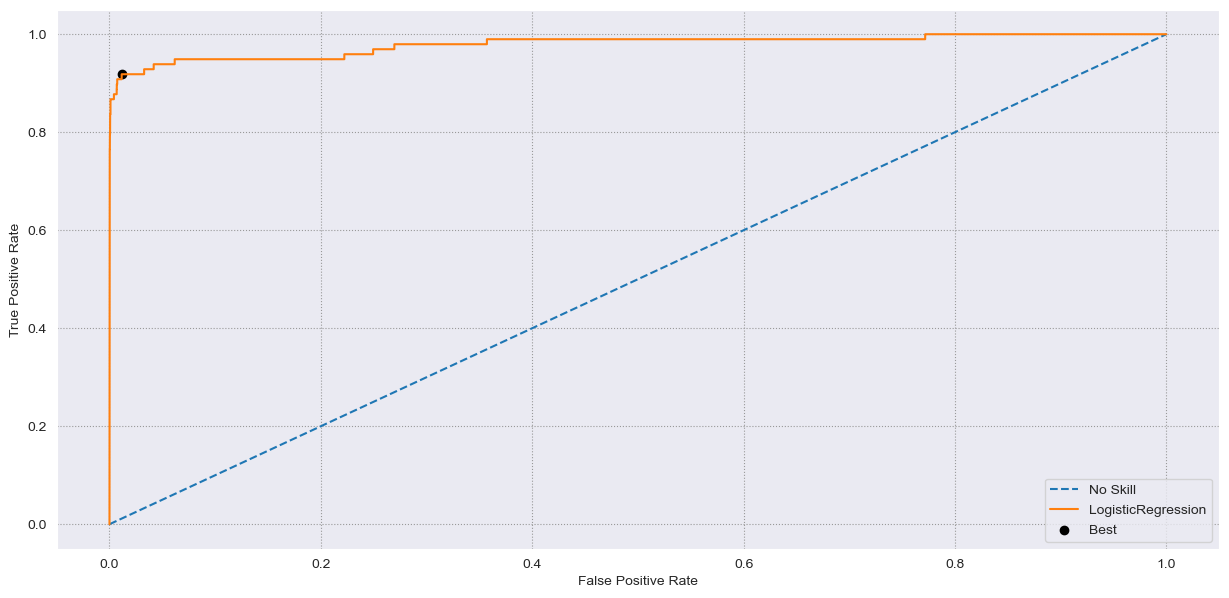

In [187]:
# Plotting the ROC AUC curve
best_log_thresh_smote = plot_roc_auc_curve(logreg_best_smote, X_test, y_test)

Model: LogisticRegression


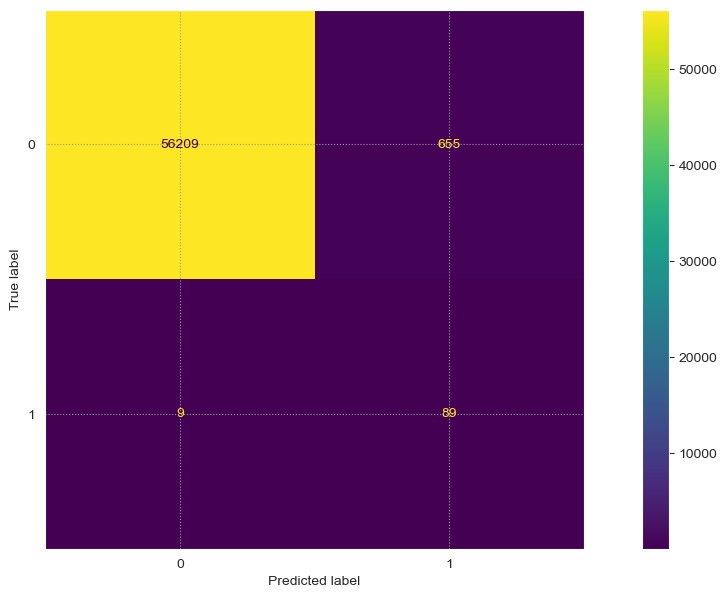

In [188]:
# Plotting the confusion matrix

plot_confusion_matrix(model=logreg_best_smote, threshold=best_log_thresh_smote)

In [189]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(logreg_best_smote, dataset_train_type=ModelTrainDatasetType.SMOTE)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\LOGISTICREGRESSION_SMOTE.pkl


In [190]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, logreg_best_smote, best_thresh=best_log_thresh_smote, dataset_train_type=ModelTrainDatasetType.SMOTE)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   
11      LogisticRegression                     SMOTE              0.9082   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558  
11       0.9885     0.1196    0.2114  0.9483

## MODEL 2: DECISION TREE

In [191]:
# Decision Tree
dtree_smote = DecisionTreeClassifier(random_state=MODEL_RANDOM_STATE)

# Parameter Grid
param_grid = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [4, 5, 10, 20],
          'min_samples_split': [2500, 3000, 3500],
          'min_samples_leaf': [27, 28, 35],
          'max_features':['sqrt', 'log2']}

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=MODEL_RANDOM_STATE)

# create gridsearch object
grid_search_dtree_smote = GridSearchCV(estimator=dtree_smote, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=1)

In [192]:
# Fit the grid search to the data
grid_search_dtree_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [27, 28, 35],
                         'min_samples_split': [2500, 3000, 3500],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [193]:
# cross validation results of decision tree model on SMOTE data
dtree_smote_cv_results = pd.DataFrame(grid_search_dtree_smote.cv_results_)
dtree_smote_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.091601      0.111606         0.039800        0.015381   
1       0.525000      0.066531         0.037400        0.004409   
2       2.050802      0.057912         0.038600        0.004318   
3       0.499001      0.064231         0.036200        0.005741   
4       1.980402      0.074369         0.030801        0.006493   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               4               sqrt                     27   
1            gini               4               sqrt                     27   
2            gini               4               sqrt                     27   
3            gini               4               sqrt                     27   
4            gini               4               sqrt                     27   

  param_min_samples_split param_splitter  ... mean_test_score  std_test_score  \
0                    2500           best  ...        0.943127        0.000681   
1                    2500         random  ...        0.866155        0.034306   
2                    3000           best  ...        0.943009        0.000606   
3                    3000         random  ...        0.866155        0.034306   
4                    3500           best  ...        0.942787        0.000556   

   rank_test_score  split0_train_score  split1_train_score  \
0              184            0.943791            0.943428   
1              238            0.878370            0.817937   
2              187            0.943791            0.943428   
3              241            0.878370            0.817937   
4              190            0.943578            0.943213   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.942839            0.943582            0.943298   
1            0.858404            0.850706            0.923842   
2            0.942839            0.943472            0.943298   
3            0.858403            0.850706            0.923842   
4            0.942652            0.943088            0.943046   

   mean_train_score  std_train_score  
0          0.943388         0.000320  
1          0.865852         0.034929  
2          0.943366         0.000309  
3          0.865851         0.034929  
4          0.943115         0.000298  

[5 rows x 26 columns]

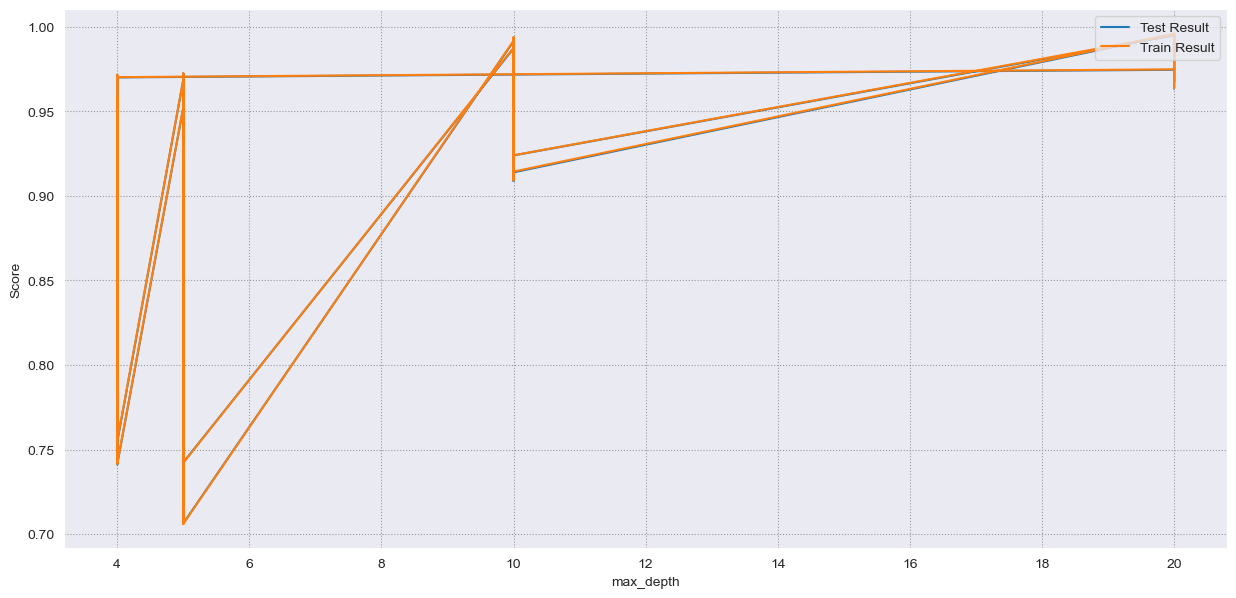

In [194]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(dtree_smote_cv_results['param_max_depth'], dtree_smote_cv_results['mean_test_score'])
plt.plot(dtree_smote_cv_results['param_max_depth'], dtree_smote_cv_results['mean_train_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [195]:
#print the optimum value of hyperparameters

grid_search_dtree_smote.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_leaf=28, min_samples_split=2500,
                       random_state=42)

In [196]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_dtree_smote.best_score_)
print("Best hyperparameters: ", grid_search_dtree_smote.best_params_)

Best ROC_AUC:  0.9955415011704464
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 28, 'min_samples_split': 2500, 'splitter': 'best'}


In [197]:
# Let us fit the best estimator we got from Grid Search on train data

dtree_best_smote = grid_search_dtree_smote.best_estimator_
dtree_best_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_leaf=28, min_samples_split=2500,
                       random_state=42)

In [198]:
# Evaluating the model on train and test data

display_scores(dtree_best_smote)

Model: DecisionTreeClassifier
===== Training Data Scores =====
F1 Score: 12.57%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.07      0.94      0.13       394

    accuracy                           0.98    227845
   macro avg       0.53      0.96      0.56    227845
weighted avg       1.00      0.98      0.99    227845


===== Test Data Scores =====
F1 Score: 10.75%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.84      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Best Threshold=0.473333



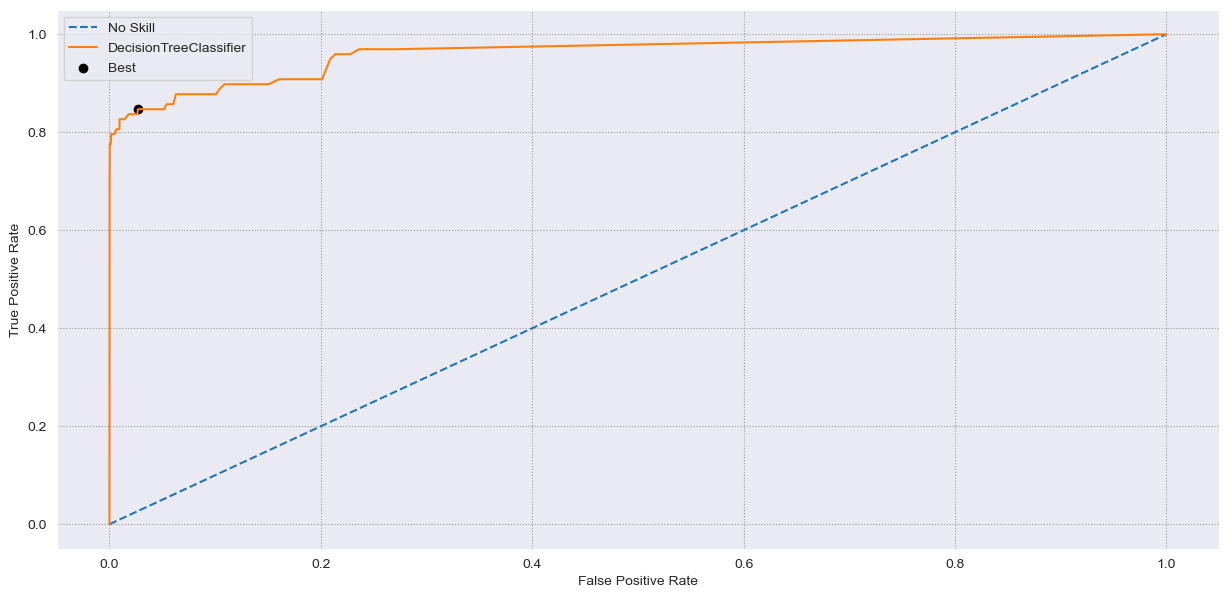

In [199]:
# Plotting the ROC AUC curve

best_dtree_thresh_smote = plot_roc_auc_curve(dtree_best_smote, X_test, y_test)

Model: DecisionTreeClassifier


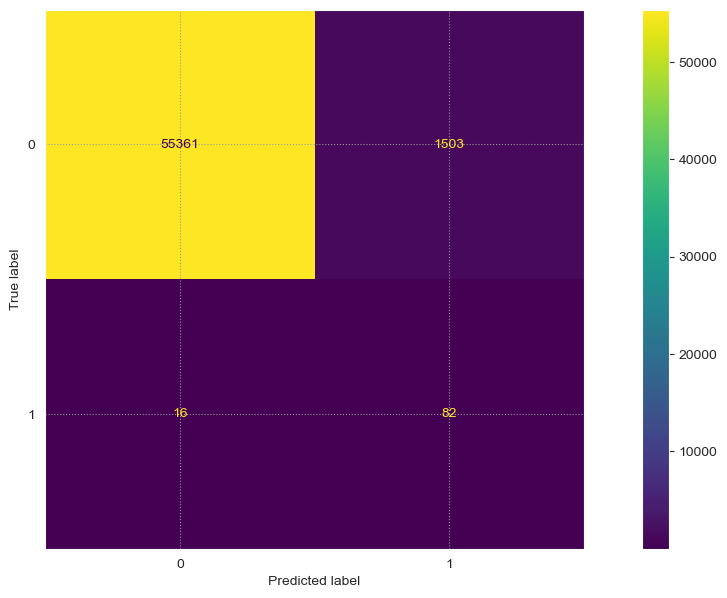

In [200]:
# Plotting the confusion matrix

plot_confusion_matrix(model=dtree_best_smote, threshold=best_dtree_thresh_smote)

In [201]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(dtree_best_smote, dataset_train_type=ModelTrainDatasetType.SMOTE)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\DECISIONTREECLASSIFIER_SMOTE.pkl


In [202]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, dtree_best_smote, best_thresh=best_dtree_thresh_smote, dataset_train_type=ModelTrainDatasetType.SMOTE)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   
11      LogisticRegression                     SMOTE              0.9082   
12  DecisionTreeClassifier                     SMOTE              0.8367   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558  
11       0.9885     0.1196    0.2114  0.9483  
12       0.9736     0.0517    0.0974  0.9052

## MODEL 3: RANDOM FOREST

In [203]:
# Random Forest
rf_smote = RandomForestClassifier(n_jobs=-1, random_state=MODEL_RANDOM_STATE)

# hyperparameter space
param_grid = {'n_estimators': [50, 100, 150],
              'min_samples_leaf': [300, 500, 700],
              'criterion': ['gini', 'entropy']}

# create 3 folds
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=MODEL_RANDOM_STATE)

# create gridsearch object
grid_search_rf_smote = GridSearchCV(estimator=rf_smote, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, verbose=1, return_train_score=True)

In [204]:
# Fit the grid search to the data (Note: This takes approx. 1 hr 30 mins to complete)
grid_search_rf_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [300, 500, 700],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [205]:
# cross validation results of random forest model on SMOTE data
rf_smote_cv_results = pd.DataFrame(grid_search_rf_smote.cv_results_)
rf_smote_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       98.105424     21.443208        60.308723        8.029123   
1      170.579158      7.588147        16.296348        6.161654   
2      189.456175      5.265295        21.199019        7.093979   
3       67.689729      1.532603        69.840065        0.792286   
4      177.678498      4.278871        12.275678        1.548259   
5      192.337179      4.471593        23.262688        5.564442   
6       92.757752     24.939882        60.502390        9.710670   
7      172.335826      8.416080        14.963347        6.622374   
8      183.756170      1.265030        12.444012        1.464648   
9      113.885773     30.386778        51.119381       12.582718   
10     154.548477     38.058489        18.737351       11.937808   
11     136.043127      2.393465        16.059681        1.718758   
12      46.973044      0.844887        45.612042        1.413944   
13     117.783776      3.700895        23.170689        2.745418   
14     139.522463      2.001024         6.684673        1.965202   
15      92.543086      1.998038        28.162693        2.905844   
16     120.817779      0.870311         7.940007        0.041665   
17     124.418783      3.160782         0.618334        0.364072   

   param_criterion param_min_samples_leaf param_n_estimators  \
0             gini                    300                 50   
1             gini                    300                100   
2             gini                    300                150   
3             gini                    500                 50   
4             gini                    500                100   
5             gini                    500                150   
6             gini                    700                 50   
7             gini                    700                100   
8             gini                    700                150   
9          entropy                    300                 50   
10         entropy                    300                100   
11         entropy                    300                150   
12         entropy                    500                 50   
13         entropy                    500                100   
14         entropy                    500                150   
15         entropy                    700                 50   
16         entropy                    700                100   
17         entropy                    700                150   

                                               params  split0_test_score  \
0   {'criterion': 'gini', 'min_samples_leaf': 300,...           0.999484   
1   {'criterion': 'gini', 'min_samples_leaf': 300,...           0.999475   
2   {'criterion': 'gini', 'min_samples_leaf': 300,...           0.999494   
3   {'criterion': 'gini', 'min_samples_leaf': 500,...           0.998795   
4   {'criterion': 'gini', 'min_samples_leaf': 500,...           0.998835   
5   {'criterion': 'gini', 'min_samples_leaf': 500,...           0.998861   
6   {'criterion': 'gini', 'min_samples_leaf': 700,...           0.998151   
7   {'criterion': 'gini', 'min_samples_leaf': 700,...           0.998238   
8   {'criterion': 'gini', 'min_samples_leaf': 700,...           0.998218   
9   {'criterion': 'entropy', 'min_samples_leaf': 3...           0.999678   
10  {'criterion': 'entropy', 'min_samples_leaf': 3...           0.999693   
11  {'criterion': 'entropy', 'min_samples_leaf': 3...           0.999699   
12  {'criterion': 'entropy', 'min_samples_leaf': 5...           0.999332   
13  {'criterion': 'entropy', 'min_samples_leaf': 5...           0.999358   
14  {'criterion': 'entropy', 'min_samples_leaf': 5...           0.999338   
15  {'criterion': 'entropy', 'min_samples_leaf': 7...           0.998803   
16  {'criterion': 'entropy', 'min_samples_leaf': 7...           0.998799   
17  {'criterion': 'entropy', 'min_samples_leaf': 7...           0.998825   

    split1_test_score  split2_test_score  mean_te

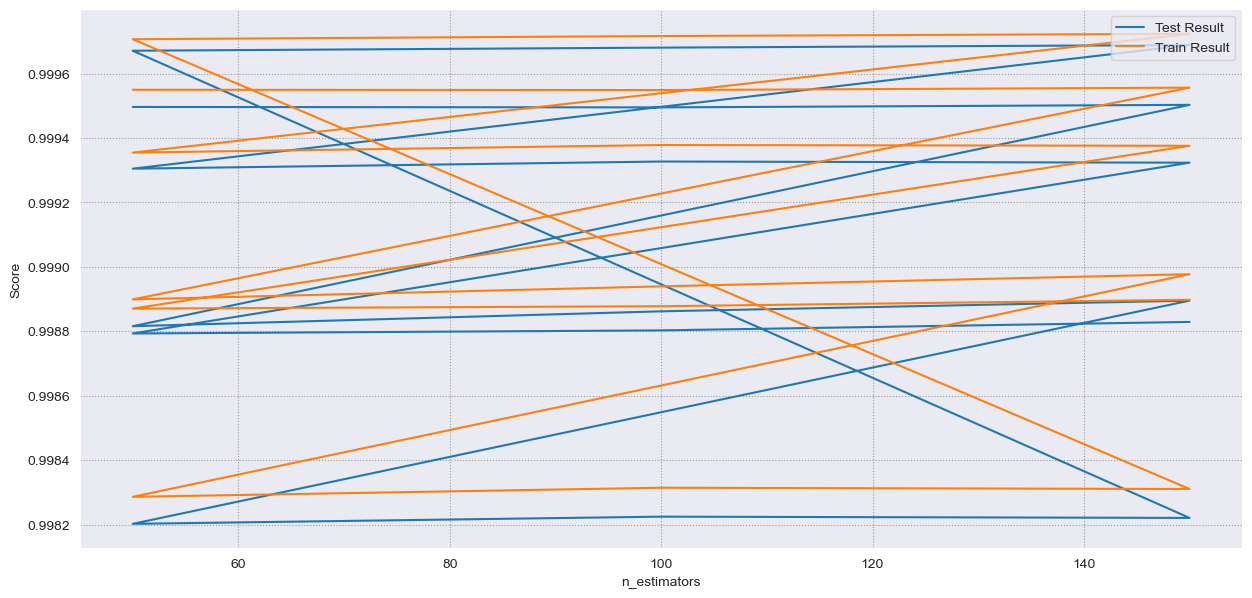

In [206]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(rf_smote_cv_results['param_n_estimators'], rf_smote_cv_results['mean_test_score'])
plt.plot(rf_smote_cv_results['param_n_estimators'], rf_smote_cv_results['mean_train_score'])
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [207]:
#print the optimum value of hyperparameters

grid_search_rf_smote.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=300,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [208]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_rf_smote.best_score_)
print("Best hyperparameters: ", grid_search_rf_smote.best_params_)

Best ROC_AUC:  0.9996886669644244
Best hyperparameters:  {'criterion': 'entropy', 'min_samples_leaf': 300, 'n_estimators': 150}


In [209]:
# Let us fit the best estimator we got from Grid Search on train data

rf_best_smote = grid_search_rf_smote.best_estimator_
rf_best_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', min_samples_leaf=300,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [210]:
# Evaluating the model on train and test data

display_scores(rf_best_smote)

Model: RandomForestClassifier
===== Training Data Scores =====
F1 Score: 53.22%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.36      0.99      0.53       394

    accuracy                           1.00    227845
   macro avg       0.68      1.00      0.77    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 49.01%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.89      0.49        98

    accuracy                           1.00     56962
   macro avg       0.67      0.94      0.74     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.248307



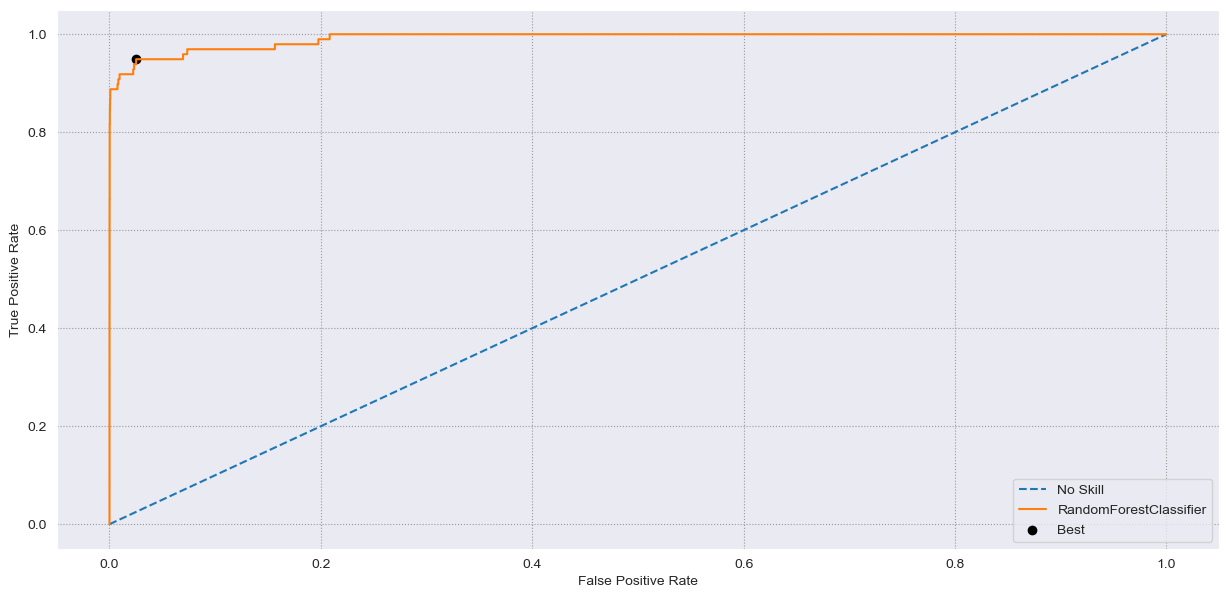

In [211]:
# Plotting the ROC AUC curve

best_rf_thresh_smote = plot_roc_auc_curve(rf_best_smote, X_test, y_test)

Model: RandomForestClassifier


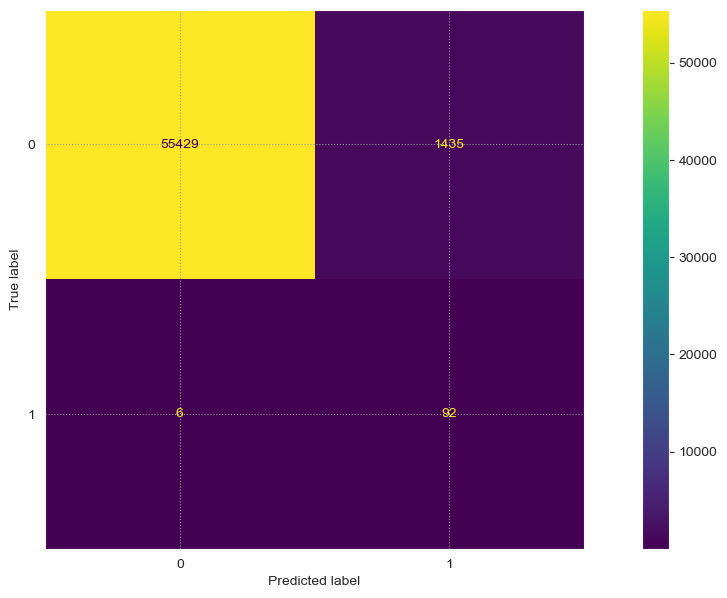

In [212]:
# Plotting the confusion matrix

plot_confusion_matrix(model=rf_best_smote, threshold=best_rf_thresh_smote)

In [213]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(rf_best_smote, dataset_train_type=ModelTrainDatasetType.SMOTE)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\RANDOMFORESTCLASSIFIER_SMOTE.pkl


In [214]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, rf_best_smote, best_thresh=best_rf_thresh_smote, dataset_train_type=ModelTrainDatasetType.SMOTE)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   
11      LogisticRegression                     SMOTE              0.9082   
12  DecisionTreeClassifier                     SMOTE              0.8367   
13  RandomForestClassifier                     SMOTE              0.9388   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558  
11       0.9885     0.1196    0.2114  0.9483  
12       0.9736     0.0517    0.0974  0.9052  
13       0.9748     0.0602    0.1132  0.9568

## MODEL 4: KNN

In [215]:
# KNN
knn_smote = KNeighborsClassifier(n_jobs=-1)

# Param Grid
param_grid = {'n_neighbors': [10, 20, 30]}

# create 3 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state=MODEL_RANDOM_STATE)

grid_search_knn_smote = GridSearchCV(estimator=knn_smote, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, verbose=1, return_train_score=True)

In [216]:
# Fit the grid search to the data (Note: This takes approx. 2 hours to complete)

grid_search_knn_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [10, 20, 30]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [217]:
# cross validation results of KNN model on SMOTE data

knn_smote_cv_results = pd.DataFrame(grid_search_knn_smote.cv_results_)
knn_smote_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.145667      0.022156       117.334109        0.415657   
1       0.132002      0.001415       117.400108        0.241166   
2       0.132001      0.000817       119.119777        0.521270   

  param_n_neighbors               params  split0_test_score  \
0                10  {'n_neighbors': 10}           0.999624   
1                20  {'n_neighbors': 20}           0.999716   
2                30  {'n_neighbors': 30}           0.999755   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999637           0.999611         0.999624        0.000011   
1           0.999697           0.999650         0.999688        0.000028   
2           0.999782           0.999683         0.999740        0.000042   

   rank_test_score  split0_train_score  split1_train_score  \
0                3                 1.0                 1.0   
1                2                 1.0                 1.0   
2                1                 1.0                 1.0   

   split2_train_score  mean_train_score  std_train_score  
0                 1.0               1.0     1.240383e-09  
1                 1.0               1.0     2.785595e-08  
2                 1.0               1.0     3.627412e-08

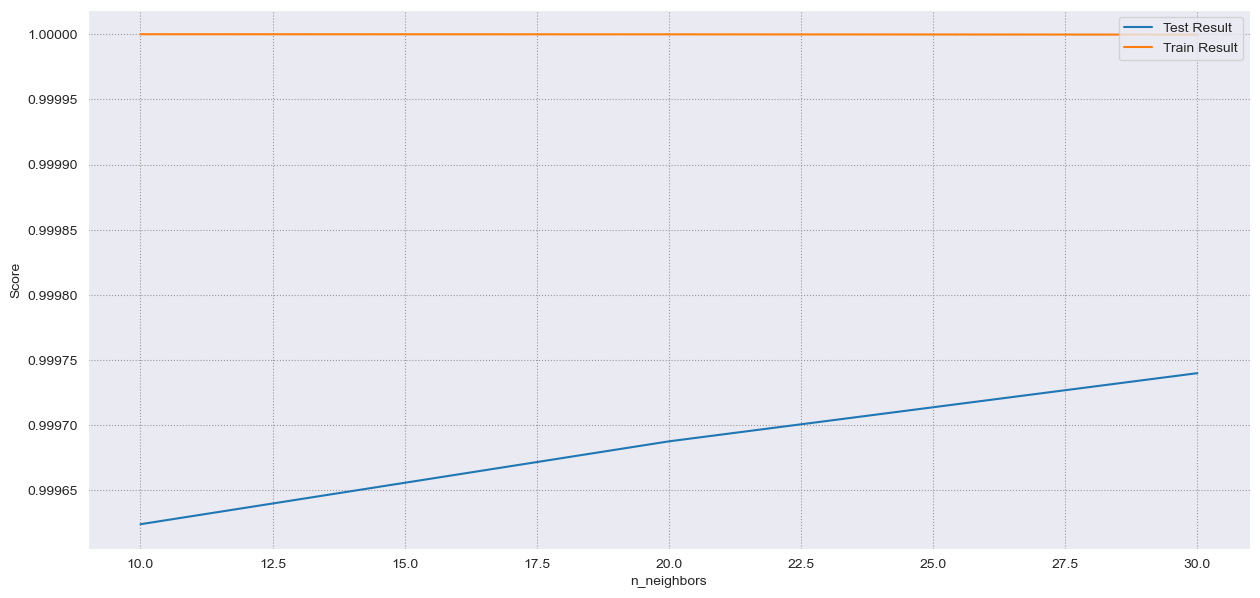

In [218]:
# Plot the train and test scores for the fitted hyperparameters

plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(knn_smote_cv_results['param_n_neighbors'], knn_smote_cv_results['mean_test_score'])
plt.plot(knn_smote_cv_results['param_n_neighbors'], knn_smote_cv_results['mean_train_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [219]:
#print the optimum value of hyperparameters

grid_search_knn_smote.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

In [220]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_knn_smote.best_score_)
print("Best hyperparameters: ", grid_search_knn_smote.best_params_)

Best ROC_AUC:  0.9997399769575769
Best hyperparameters:  {'n_neighbors': 30}


In [221]:
# Let us fit the best estimator we got from Grid Search on train data

knn_best_smote = grid_search_knn_smote.best_estimator_
knn_best_smote.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

In [222]:
# Evaluating the model on train and test data

display_scores(knn_best_smote)

Model: KNeighborsClassifier
===== Training Data Scores =====
F1 Score: 33.72%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.20      1.00      0.34       394

    accuracy                           0.99    227845
   macro avg       0.60      1.00      0.67    227845
weighted avg       1.00      0.99      1.00    227845


===== Test Data Scores =====
F1 Score: 32.72%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.20      0.91      0.33        98

    accuracy                           0.99     56962
   macro avg       0.60      0.95      0.66     56962
weighted avg       1.00      0.99      1.00     56962



Best Threshold=0.600000



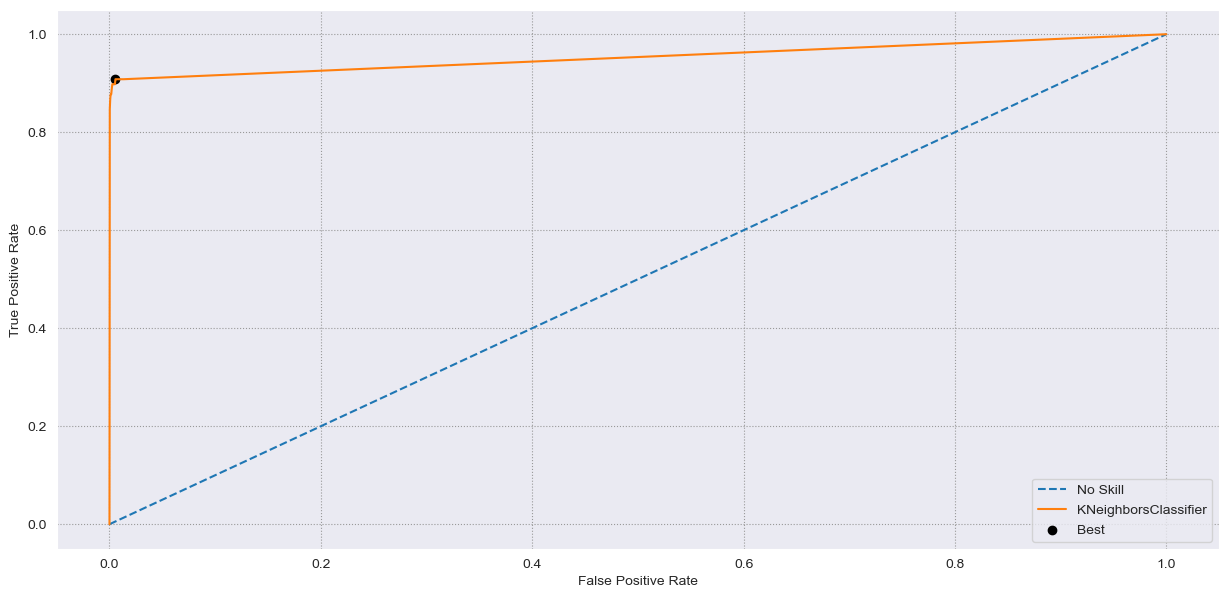

In [223]:
# Plotting the ROC AUC curve

best_knn_thresh_smote = plot_roc_auc_curve(knn_best_smote, X_test, y_test)

Model: KNeighborsClassifier


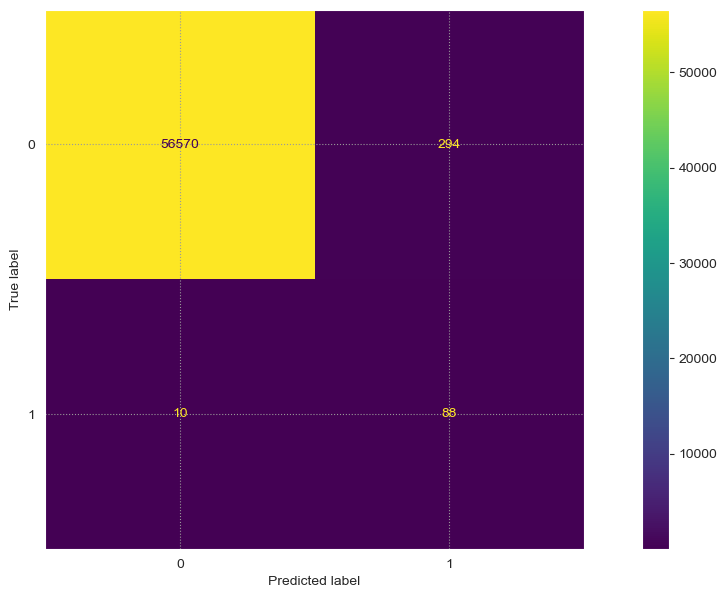

In [224]:
# Plotting the confusion matrix

plot_confusion_matrix(model=knn_best_smote, threshold=best_knn_thresh_smote)

In [225]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(knn_best_smote, dataset_train_type=ModelTrainDatasetType.SMOTE)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\KNEIGHBORSCLASSIFIER_SMOTE.pkl


In [226]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, knn_best_smote, best_thresh=best_knn_thresh_smote, dataset_train_type=ModelTrainDatasetType.SMOTE)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   
11      LogisticRegression                     SMOTE              0.9082   
12  DecisionTreeClassifier                     SMOTE              0.8367   
13  RandomForestClassifier                     SMOTE              0.9388   
14    KNeighborsClassifier                     SMOTE              0.8980   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558  
11       0.9885     0.1196    0.2114  0.9483  
12       0.9736     0.0517    0.0974  0.9052  
13       0.9748     0.0602    0.1132  0.9568  
14       0.9948     0.2304    0.3667  0.9464

## MODEL 5: XGBOOST

In [227]:
# XGBoost Classifier
xgb_smote = XGBClassifier(objective='binary:logistic')

# Param Grid
param_grid = {
        'gamma': [0.03, 0.06, 0.08],
        'max_depth': [8, 10, 12, 15],
        'eta': [0.01, 0.05, 0.1],
        'learning_rate': [0.10, 0.15, 0.20]
        }

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=MODEL_RANDOM_STATE)

grid_search_xgb_smote = GridSearchCV(estimator=xgb_smote, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, return_train_score=True)

In [228]:
# Fit the grid search to the data (Note this takes approx. 1 hour to complete)

grid_search_xgb_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.01, 0.05, 0.1], 'gamma': [0.03, 0.06, 0.08],
                         'learning_rate': [0.1, 0.15, 0.2],
                         'max_depth': [8, 10, 12, 15]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [229]:
# cross validation results of XGBoost model on SMOTE data

xgb_smote_cv_results = pd.DataFrame(grid_search_xgb_smote.cv_results_)
xgb_smote_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta  \
0      14.954613      2.862209         0.464601        0.056170      0.01   
1      19.290018      3.364514         0.661201        0.122728      0.01   
2      21.947621      2.063612         0.658200        0.095653      0.01   
3      24.929823      2.262759         0.786401        0.098640      0.01   
4      19.986419      2.062942         0.434401        0.038928      0.01   

  param_gamma param_learning_rate param_max_depth  \
0        0.03                 0.1               8   
1        0.03                 0.1              10   
2        0.03                 0.1              12   
3        0.03                 0.1              15   
4        0.03                0.15               8   

                                              params  split0_test_score  ...  \
0  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           0.999983  ...   
1  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           0.999988  ...   
2  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           0.999990  ...   
3  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           0.999991  ...   
4  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           0.999991  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.999977        0.000015              106            0.999997   
1         0.999984        0.000011               73            1.000000   
2         0.999981        0.000017               97            1.000000   
3         0.999983        0.000016               82            1.000000   
4         0.999987        0.000010               67            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999999            0.999998            0.999999   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            1.000000            1.000000            1.000000   
4            1.000000            1.000000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            0.999998          0.999998     5.787413e-07  
1            1.000000          1.000000     4.125736e-09  
2            1.000000          1.000000     3.525302e-10  
3            1.000000          1.000000     6.726421e-11  
4            1.000000          1.000000     1.722352e-08  

[5 rows x 24 columns]

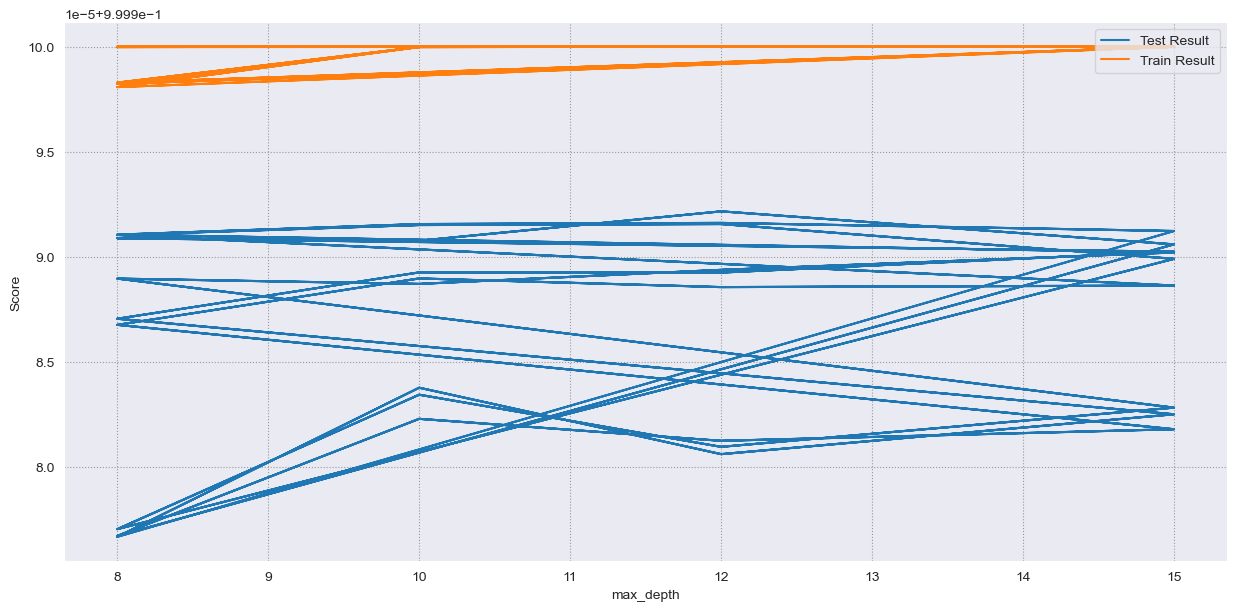

In [230]:
# Plot the train and test scores for the fitted hyperparameters

plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(xgb_smote_cv_results['param_max_depth'], xgb_smote_cv_results['mean_test_score'])
plt.plot(xgb_smote_cv_results['param_max_depth'], xgb_smote_cv_results['mean_train_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [231]:
#print the optimum value of hyperparameters

grid_search_xgb_smote.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=0.03, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [232]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_xgb_smote.best_score_)
print("Best hyperparameters: ", grid_search_xgb_smote.best_params_)

Best ROC_AUC:  0.9999921669962415
Best hyperparameters:  {'eta': 0.01, 'gamma': 0.03, 'learning_rate': 0.2, 'max_depth': 12}


In [233]:
# Let us fit the best estimator we got from Grid Search on train data

xgb_best_smote = grid_search_xgb_smote.best_estimator_
xgb_best_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=0.03, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [234]:
# Evaluating the model on train and test data

display_scores(xgb_best_smote)

Model: XGBClassifier
===== Training Data Scores =====
F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 83.58%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.86      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.000589



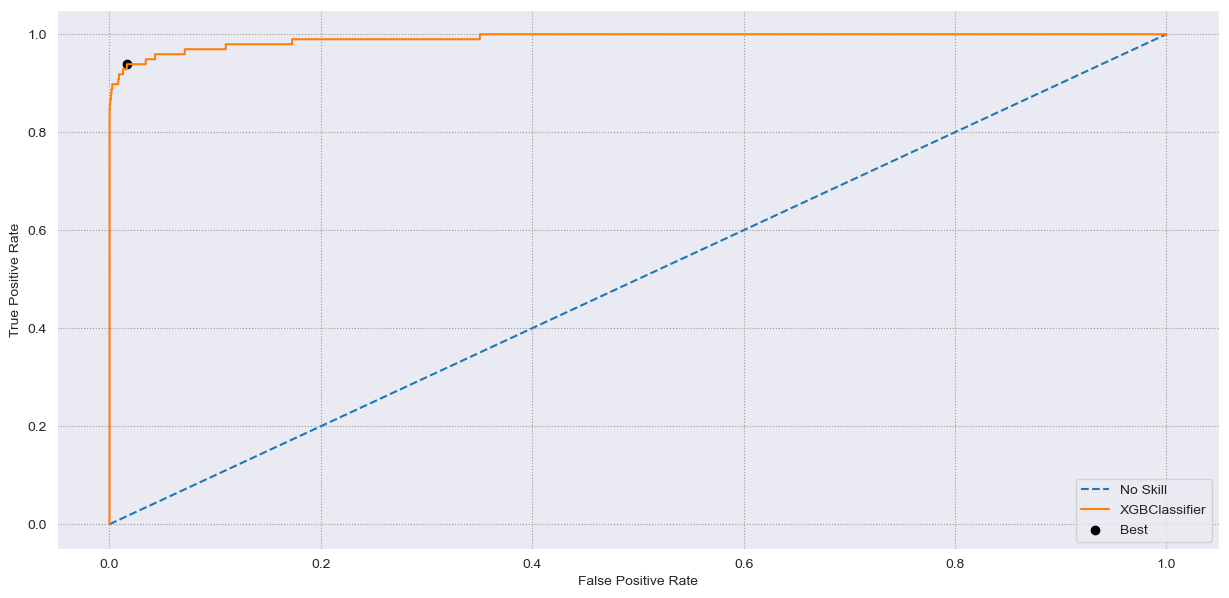

In [235]:
# Plotting the ROC AUC curve

best_xgb_thresh_smote = plot_roc_auc_curve(xgb_best_smote, X_test, y_test)

Model: XGBClassifier


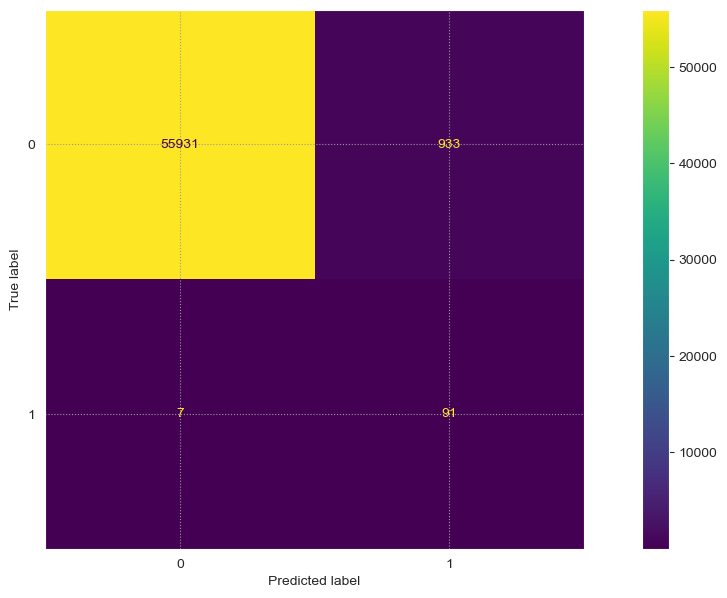

In [236]:
# Plotting the confusion matrix

plot_confusion_matrix(model=xgb_best_smote, threshold=best_xgb_thresh_smote)

In [237]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(xgb_best_smote, dataset_train_type=ModelTrainDatasetType.SMOTE)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\XGBCLASSIFIER_SMOTE.pkl


In [238]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, xgb_best_smote, best_thresh=best_xgb_thresh_smote, dataset_train_type=ModelTrainDatasetType.SMOTE)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   
11      LogisticRegression                     SMOTE              0.9082   
12  DecisionTreeClassifier                     SMOTE              0.8367   
13  RandomForestClassifier                     SMOTE              0.9388   
14    KNeighborsClassifier                     SMOTE              0.8980   
15           XGBClassifier                     SMOTE              0.9286   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558  
11       0.9885     0.1196    0.2114  0.9483  
12       0.9736     0.0517    0.0974  0.9052  
13       0.9748     0.0602    0.1132  0.9568  
14       0.9948     0.2304    0.3667  0.9464  
15       0.9836     0.0889    0.1622  0.9561

# PART C: Balancing Data Technique - ADASYN


ADASYN, or Adaptive Synthetic Sampling, is another technique designed to tackle class imbalance in machine learning datasets, particularly in classification tasks. Similar to SMOTE, ADASYN focuses on the minority class, aiming to generate synthetic instances to balance class distribution. However, ADASYN goes a step further by assigning different weights to different minority class instances based on their level of difficulty in learning. It gives more emphasis to instances that are harder to learn, ensuring that the synthetic samples are generated in regions of the feature space where the model struggles to classify minority class instances. This adaptive approach helps in creating a more diverse set of synthetic examples, potentially improving the generalization performance of the model on the minority class.

In [239]:
# Apply ADASYN technique

ada = over_sampling.ADASYN(random_state=MODEL_RANDOM_STATE)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

### Print the class distribution after applying ADASYN

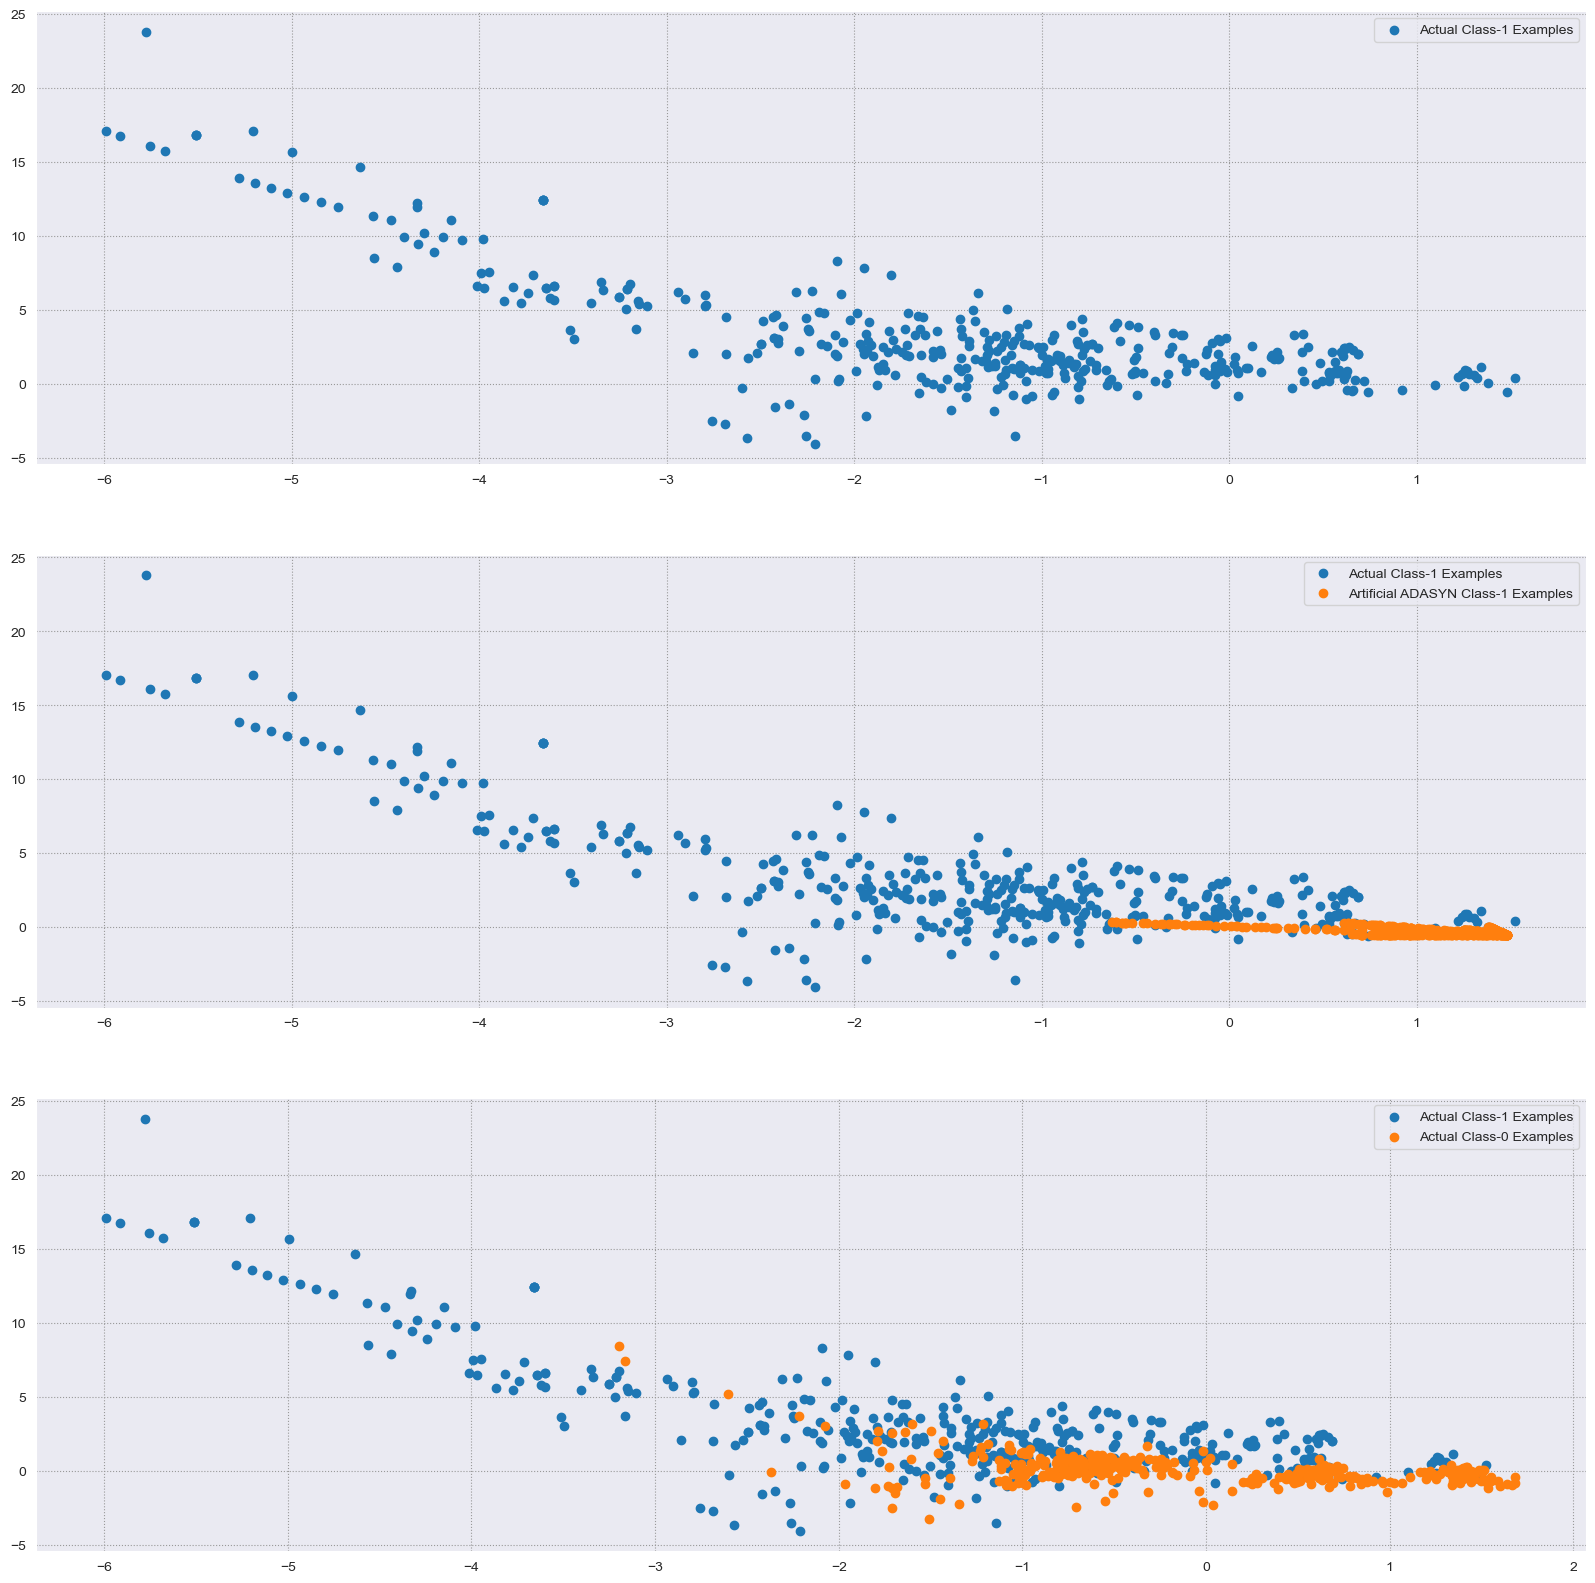

In [240]:
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## MODEL 1: LOGISTIC REGRESSION

In [241]:
# Logistic Regression

logreg_adasyn_model = LogisticRegression(solver = 'saga', random_state=MODEL_RANDOM_STATE)

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=MODEL_RANDOM_STATE)

# Define the hyperparameter grid for grid search
param_grid = {'C': [0.01, 0.1, 1, 10],  # Regularization parameter
              'penalty': ['l1', 'l2']}  # Penalty type (l1 or L2)

# Create GridSearchCV object
grid_search_logreg_adasyn = GridSearchCV(logreg_adasyn_model, param_grid, cv=folds, scoring='roc_auc', verbose=1, return_train_score=True, n_jobs=-1)

In [242]:
# Fit the grid search to the data

grid_search_logreg_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [243]:
# cross validation results of logistic regression model on ADASYN data

log_reg_adasyn_cv_results = pd.DataFrame(grid_search_logreg_adasyn.cv_results_)
log_reg_adasyn_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      30.161628      6.395006         0.029199        0.001166    0.01   
1      27.672825      6.739523         0.027200        0.003544    0.01   
2      31.177629      5.666473         0.025400        0.006945     0.1   
3      27.504225      5.408507         0.032400        0.003137     0.1   
4      30.637828      5.318650         0.028800        0.005075       1   

  param_penalty                        params  split0_test_score  \
0            l1  {'C': 0.01, 'penalty': 'l1'}           0.964272   
1            l2  {'C': 0.01, 'penalty': 'l2'}           0.964271   
2            l1   {'C': 0.1, 'penalty': 'l1'}           0.964471   
3            l2   {'C': 0.1, 'penalty': 'l2'}           0.964470   
4            l1     {'C': 1, 'penalty': 'l1'}           0.964487   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.963967           0.964347  ...         0.964168        0.000189   
1           0.963981           0.964356  ...         0.964176        0.000189   
2           0.964163           0.964510  ...         0.964368        0.000194   
3           0.964162           0.964510  ...         0.964367        0.000194   
4           0.964176           0.964521  ...         0.964383        0.000195   

   rank_test_score  split0_train_score  split1_train_score  \
0                8            0.964156            0.964102   
1                7            0.964165            0.964113   
2                5            0.964350            0.964298   
3                6            0.964349            0.964297   
4                3            0.964364            0.964312   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.964238            0.964066            0.964397   
1            0.964243            0.964080            0.964398   
2            0.964435            0.964275            0.964595   
3            0.964434            0.964275            0.964594   
4            0.964450            0.964292            0.964610   

   mean_train_score  std_train_score  
0          0.964192         0.000118  
1          0.964200         0.000113  
2          0.964391         0.000116  
3          0.964390         0.000116  
4          0.964406         0.000116  

[5 rows x 22 columns]

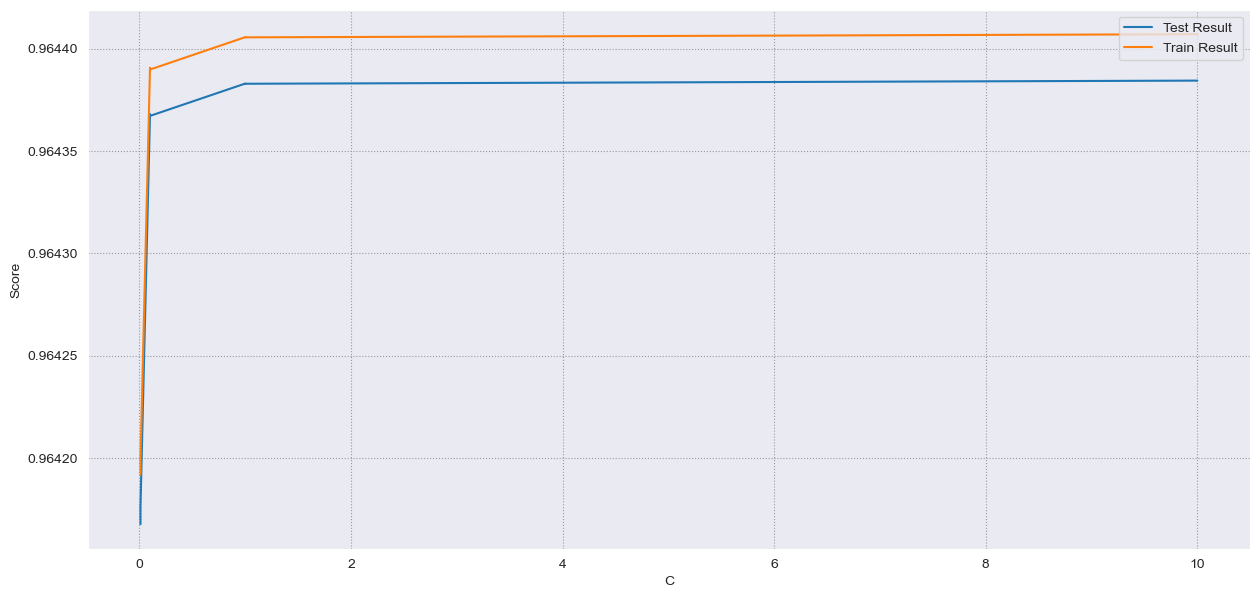

In [244]:
# Plot the train and test scores for the fitted hyperparameters

plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(log_reg_adasyn_cv_results['param_C'], log_reg_adasyn_cv_results['mean_test_score'])
plt.plot(log_reg_adasyn_cv_results['param_C'], log_reg_adasyn_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [245]:
#print the optimum value of hyperparameters

grid_search_logreg_adasyn.best_estimator_

LogisticRegression(C=10, penalty='l1', random_state=42, solver='saga')

In [246]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_logreg_adasyn.best_score_)
print("Best hyperparameters: ", grid_search_logreg_adasyn.best_params_)

Best ROC_AUC:  0.9643843683359336
Best hyperparameters:  {'C': 10, 'penalty': 'l1'}


In [247]:
# Let us fit the best estimator we got from Grid Search on train data

logreg_best_adasyn = grid_search_logreg_adasyn.best_estimator_
logreg_best_adasyn.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='saga')

In [248]:
# Evaluating the model on train and test data
display_scores(logreg_best_adasyn)

Model: LogisticRegression
===== Training Data Scores =====
F1 Score: 3.5%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    227451
           1       0.02      0.96      0.03       394

    accuracy                           0.91    227845
   macro avg       0.51      0.94      0.49    227845
weighted avg       1.00      0.91      0.95    227845


===== Test Data Scores =====
F1 Score: 3.38%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



Best Threshold=0.960466



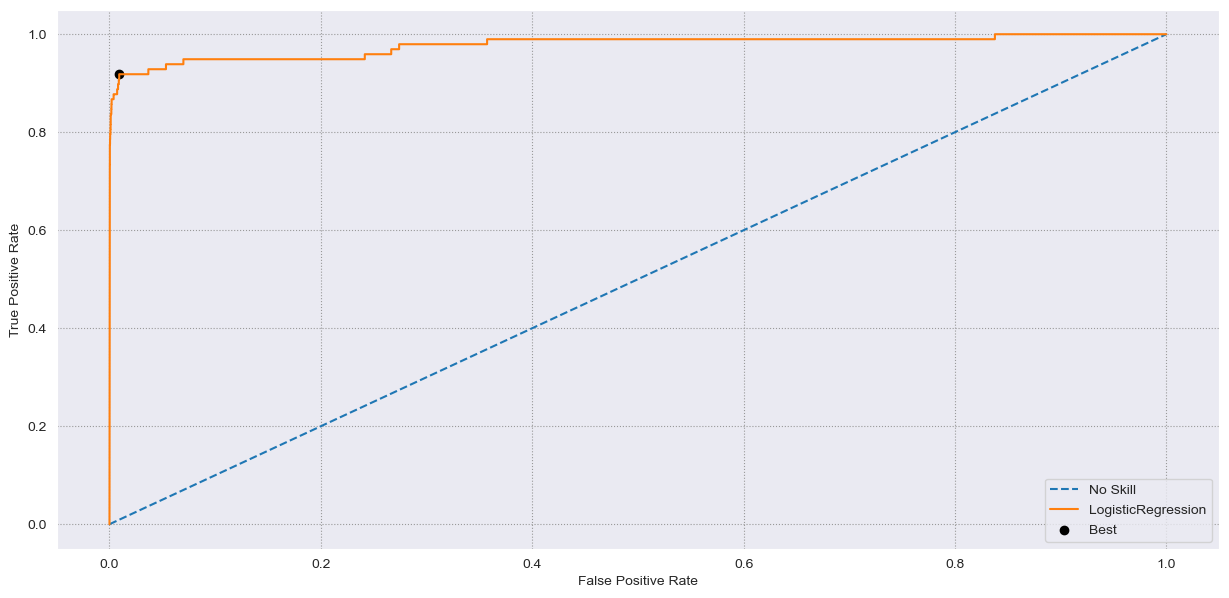

In [249]:
# Plotting the ROC AUC curve

best_log_thresh_adasyn = plot_roc_auc_curve(logreg_best_adasyn, X_test, y_test)

Model: LogisticRegression


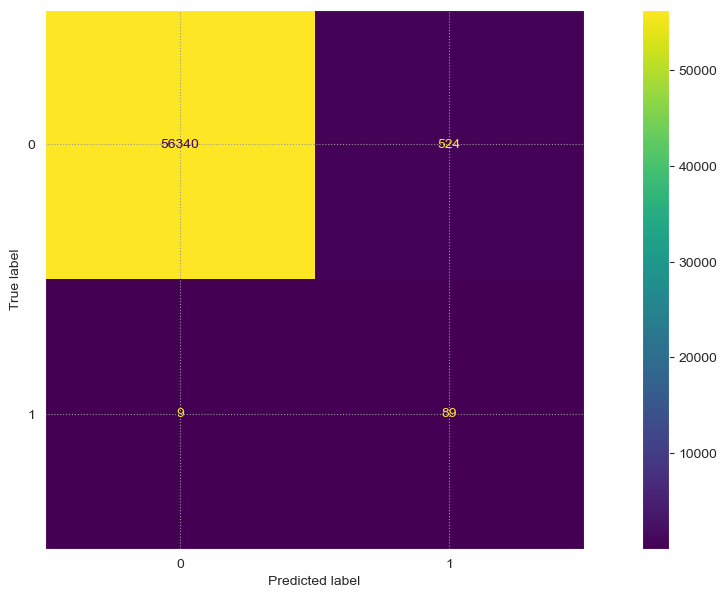

In [250]:
# Plotting the confusion matrix

plot_confusion_matrix(model=logreg_best_adasyn, threshold=best_log_thresh_adasyn)

In [251]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(logreg_best_adasyn, dataset_train_type=ModelTrainDatasetType.ADASYN)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\LOGISTICREGRESSION_ADASYN.pkl


In [252]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, logreg_best_adasyn, best_thresh=best_log_thresh_adasyn, dataset_train_type=ModelTrainDatasetType.ADASYN)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   
11      LogisticRegression                     SMOTE              0.9082   
12  DecisionTreeClassifier                     SMOTE              0.8367   
13  RandomForestClassifier                     SMOTE              0.9388   
14    KNeighborsClassifier                     SMOTE              0.8980   
15           XGBClassifier                     SMOTE              0.9286   
16      LogisticRegression                    ADASYN              0.9082   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558  
11       0.9885     0.1196    0.2114  0.9483  
12       0.9736     0.0517    0.0974  0.9052  
13       0.9748     0.0602    0.1132  0.9568  
14       0.9948     0.2304    0.3667  0.9464  
15       0.9836     0.0889    0.1622  0.9561  
16       0.9908     0.1452    0.2504  0.9495

## MODEL 2: DECISION TREE

In [253]:
# Decision Tree
dtree_adasyn = DecisionTreeClassifier(random_state=MODEL_RANDOM_STATE)

# Parameter Grid
param_grid = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [4, 5, 10, 15],
          'min_samples_split': [2500, 3000, 3500],
          'min_samples_leaf': [27, 28, 35],
          'max_features':['sqrt', 'log2']}

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=MODEL_RANDOM_STATE)

# create gridsearch object
grid_search_dtree_adasyn = GridSearchCV(estimator=dtree_adasyn, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, return_train_score=True, verbose=1)

In [254]:
# Fit the grid search to the data

grid_search_dtree_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [27, 28, 35],
                         'min_samples_split': [2500, 3000, 3500],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [255]:
# cross validation results of decision tree model on ADASYN data

dtree_adasyn_cv_results = pd.DataFrame(grid_search_dtree_adasyn.cv_results_)
dtree_adasyn_cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.746800      0.044296           0.0296        0.008547   
1       0.522400      0.053757           0.0390        0.002000   
2       1.860601      0.128264           0.0428        0.010400   
3       0.454200      0.078123           0.0374        0.003611   
4       1.951401      0.155915           0.0460        0.005099   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               4               sqrt                     27   
1            gini               4               sqrt                     27   
2            gini               4               sqrt                     27   
3            gini               4               sqrt                     27   
4            gini               4               sqrt                     27   

  param_min_samples_split param_splitter  ... mean_test_score  std_test_score  \
0                    2500           best  ...        0.858431        0.001319   
1                    2500         random  ...        0.706149        0.026567   
2                    3000           best  ...        0.858431        0.001319   
3                    3000         random  ...        0.706149        0.026567   
4                    3500           best  ...        0.879263        0.001142   

   rank_test_score  split0_train_score  split1_train_score  \
0              174            0.858730            0.859168   
1              241            0.700402            0.705786   
2              174            0.858730            0.859168   
3              241            0.700402            0.705786   
4              151            0.880053            0.879422   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.858935            0.858431            0.858245   
1            0.686896            0.681411            0.758350   
2            0.858935            0.858431            0.858245   
3            0.686896            0.681411            0.758350   
4            0.879588            0.879381            0.879100   

   mean_train_score  std_train_score  
0          0.858702         0.000333  
1          0.706569         0.027349  
2          0.858702         0.000333  
3          0.706569         0.027349  
4          0.879509         0.000314  

[5 rows x 26 columns]

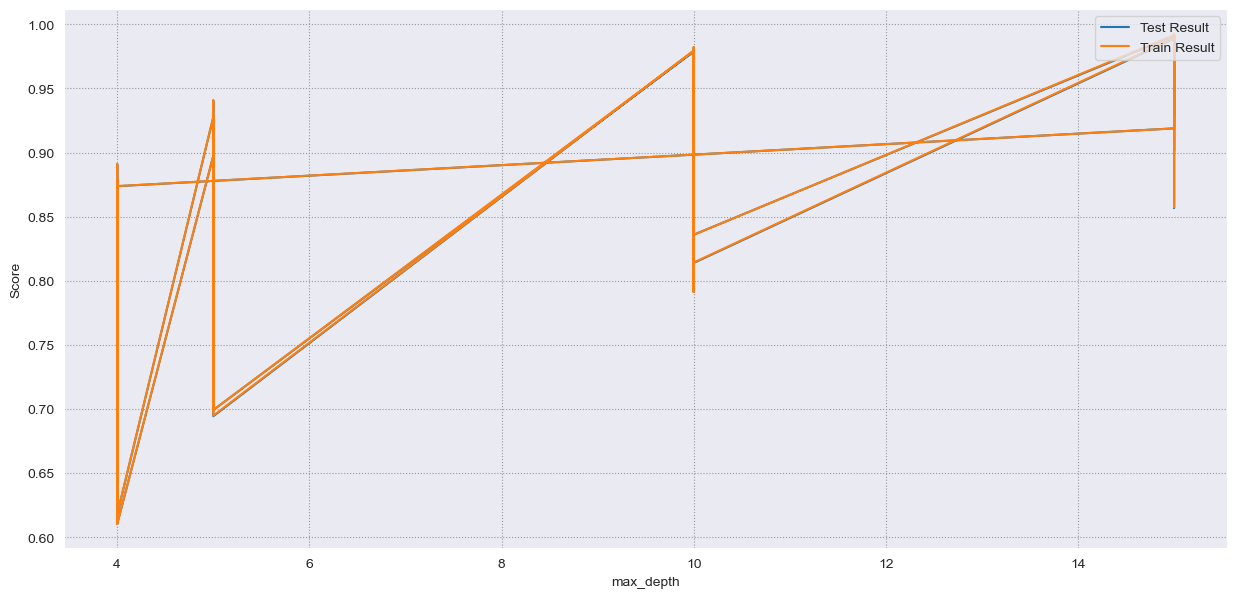

In [256]:
# Plot the train and test scores for the fitted hyperparameters
plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(dtree_adasyn_cv_results['param_max_depth'], dtree_adasyn_cv_results['mean_test_score'])
plt.plot(dtree_adasyn_cv_results['param_max_depth'], dtree_adasyn_cv_results['mean_train_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [257]:
#print the optimum value of hyperparameters

grid_search_dtree_adasyn.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=27, min_samples_split=2500,
                       random_state=42)

In [258]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_dtree_adasyn.best_score_)
print("Best hyperparameters: ", grid_search_dtree_adasyn.best_params_)

Best ROC_AUC:  0.9919769869846983
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 27, 'min_samples_split': 2500, 'splitter': 'best'}


In [259]:
# Let us fit the best estimator we got from Grid Search on train data

dtree_best_adasyn = grid_search_dtree_adasyn.best_estimator_
dtree_best_adasyn.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=27, min_samples_split=2500,
                       random_state=42)

In [260]:
# Evaluating the model on train and test data

display_scores(dtree_best_adasyn)

Model: DecisionTreeClassifier
===== Training Data Scores =====
F1 Score: 5.69%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    227451
           1       0.03      0.97      0.06       394

    accuracy                           0.94    227845
   macro avg       0.51      0.96      0.51    227845
weighted avg       1.00      0.94      0.97    227845


===== Test Data Scores =====
F1 Score: 5.19%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.89      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.92      0.51     56962
weighted avg       1.00      0.94      0.97     56962



Best Threshold=0.642574



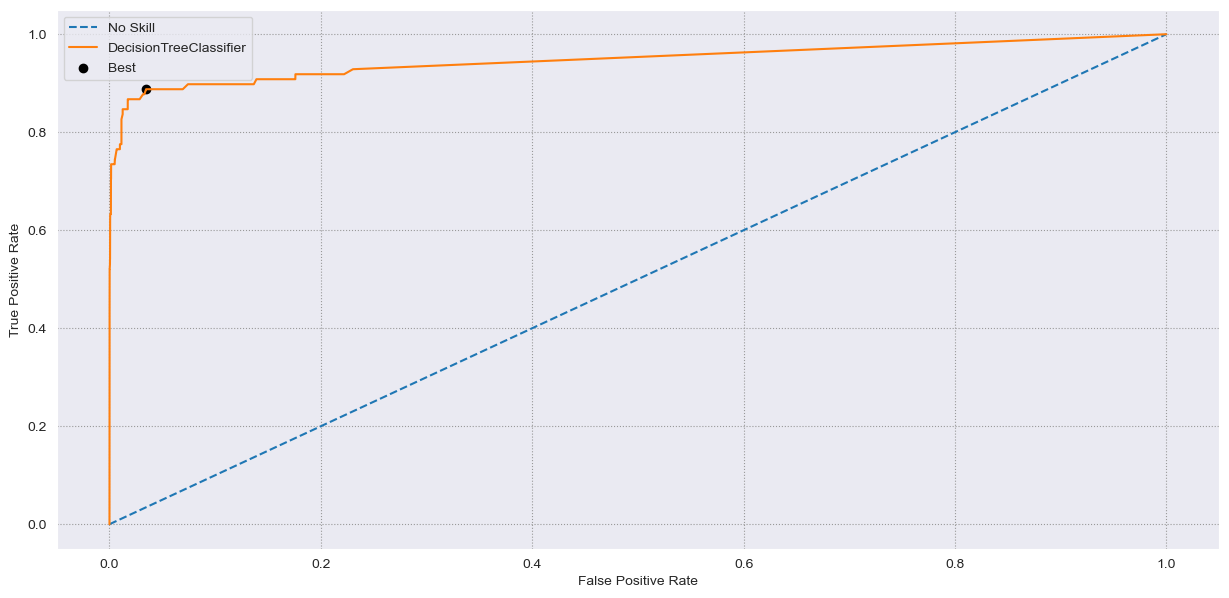

In [261]:
# Plotting the ROC AUC curve

best_dtree_thresh_adasyn = plot_roc_auc_curve(dtree_best_adasyn, X_test, y_test)

Model: DecisionTreeClassifier


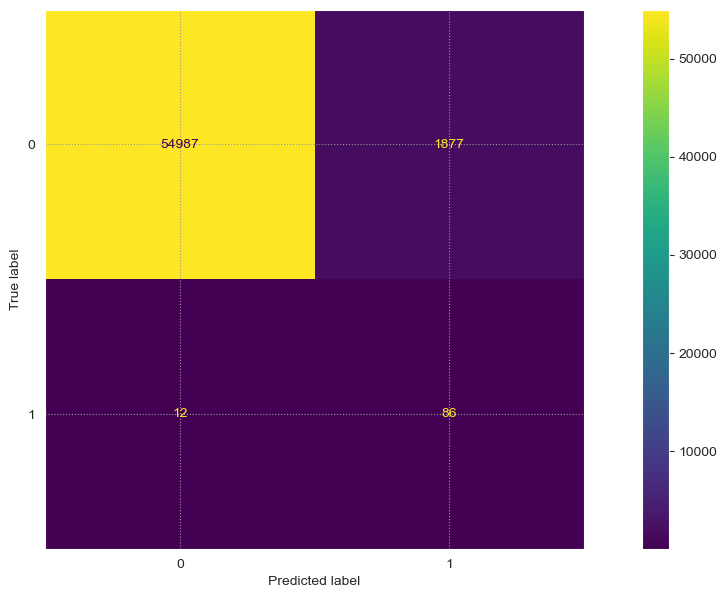

In [262]:
# Plotting the confusion matrix

plot_confusion_matrix(model=dtree_best_adasyn, threshold=best_dtree_thresh_adasyn)

In [263]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(dtree_best_adasyn, dataset_train_type=ModelTrainDatasetType.ADASYN)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\DECISIONTREECLASSIFIER_ADASYN.pkl


In [264]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, dtree_best_adasyn, best_thresh=best_dtree_thresh_adasyn, dataset_train_type=ModelTrainDatasetType.ADASYN)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   
11      LogisticRegression                     SMOTE              0.9082   
12  DecisionTreeClassifier                     SMOTE              0.8367   
13  RandomForestClassifier                     SMOTE              0.9388   
14    KNeighborsClassifier                     SMOTE              0.8980   
15           XGBClassifier                     SMOTE              0.9286   
16      LogisticRegression                    ADASYN              0.9082   
17  DecisionTreeClassifier                    ADASYN              0.8776   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558  
11       0.9885     0.1196    0.2114  0.9483  
12       0.9736     0.0517    0.0974  0.9052  
13       0.9748     0.0602    0.1132  0.9568  
14       0.9948     0.2304    0.3667  0.9464  
15       0.9836     0.0889    0.1622  0.9561  
16       0.9908     0.1452    0.2504  0.9495  
17       0.9670     0.0438    0.0835  0.9223

## MODEL 3: RANDOM FOREST

In [265]:
# Random Forest
rf_adasyn = RandomForestClassifier(n_jobs=-1, random_state=MODEL_RANDOM_STATE)

# hyperparameter space
param_grid = {'n_estimators': [50, 100, 150],
              'min_samples_leaf': [300, 500, 700],
              'criterion': ['gini', 'entropy']}

# create 3 folds
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=MODEL_RANDOM_STATE)

# create gridsearch object
grid_search_rf_adasyn = GridSearchCV(estimator=rf_adasyn, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, verbose=1, return_train_score=True)

In [266]:
# Fit the grid search to the data

grid_search_rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [300, 500, 700],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [267]:
# cross validation results of Random Forest model on ADASYN data

rf_adasyn_cv_results = pd.DataFrame(grid_search_rf_adasyn.cv_results_)
rf_adasyn_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       78.750073     22.197116        63.051392       10.233859   
1      150.394473     11.196881        21.700354        7.949619   
2      177.655497      2.942177        21.219353        7.848975   
3       76.250403     18.780132        64.242393        7.745384   
4      155.474477      4.639101        18.158017        3.638527   
5      170.793158      7.339863        15.968015        7.283153   
6      114.909772     21.052367        44.457375       12.279537   
7      159.695480      7.285957        14.878013        5.647946   
8      172.891826      2.461883        11.250344        2.380310   
9      115.005105     21.071424        44.217041       12.315512   
10     152.897475     27.645802        18.946351       11.256803   
11     147.144470      1.662982        12.068345        0.806657   
12      57.131720      3.452356        53.086383        0.399420   
13     128.207119      4.805391        19.952352        3.157633   
14     149.716806      0.503629         4.490671        0.737984   
15      99.705760      2.672031        33.400698        2.197562   
16     133.979458      1.199143         7.165673        1.162244   
17     139.950131      1.791997         0.867667        0.281905   

   param_criterion param_min_samples_leaf param_n_estimators  \
0             gini                    300                 50   
1             gini                    300                100   
2             gini                    300                150   
3             gini                    500                 50   
4             gini                    500                100   
5             gini                    500                150   
6             gini                    700                 50   
7             gini                    700                100   
8             gini                    700                150   
9          entropy                    300                 50   
10         entropy                    300                100   
11         entropy                    300                150   
12         entropy                    500                 50   
13         entropy                    500                100   
14         entropy                    500                150   
15         entropy                    700                 50   
16         entropy                    700                100   
17         entropy                    700                150   

                                               params  split0_test_score  \
0   {'criterion': 'gini', 'min_samples_leaf': 300,...           0.999541   
1   {'criterion': 'gini', 'min_samples_leaf': 300,...           0.999589   
2   {'criterion': 'gini', 'min_samples_leaf': 300,...           0.999601   
3   {'criterion': 'gini', 'min_samples_leaf': 500,...           0.998919   
4   {'criterion': 'gini', 'min_samples_leaf': 500,...           0.999033   
5   {'criterion': 'gini', 'min_samples_leaf': 500,...           0.999042   
6   {'criterion': 'gini', 'min_samples_leaf': 700,...           0.998244   
7   {'criterion': 'gini', 'min_samples_leaf': 700,...           0.998215   
8   {'criterion': 'gini', 'min_samples_leaf': 700,...           0.998253   
9   {'criterion': 'entropy', 'min_samples_leaf': 3...           0.999689   
10  {'criterion': 'entropy', 'min_samples_leaf': 3...           0.999693   
11  {'criterion': 'entropy', 'min_samples_leaf': 3...           0.999698   
12  {'criterion': 'entropy', 'min_samples_leaf': 5...           0.999178   
13  {'criterion': 'entropy', 'min_samples_leaf': 5...           0.999316   
14  {'criterion': 'entropy', 'min_samples_leaf': 5...           0.999322   
15  {'criterion': 'entropy', 'min_samples_leaf': 7...           0.998648   
16  {'criterion': 'entropy', 'min_samples_leaf': 7...           0.998759   
17  {'criterion': 'entropy', 'min_samples_leaf': 7...           0.998796   

    split1_test_score  split2_test_score  mean_te

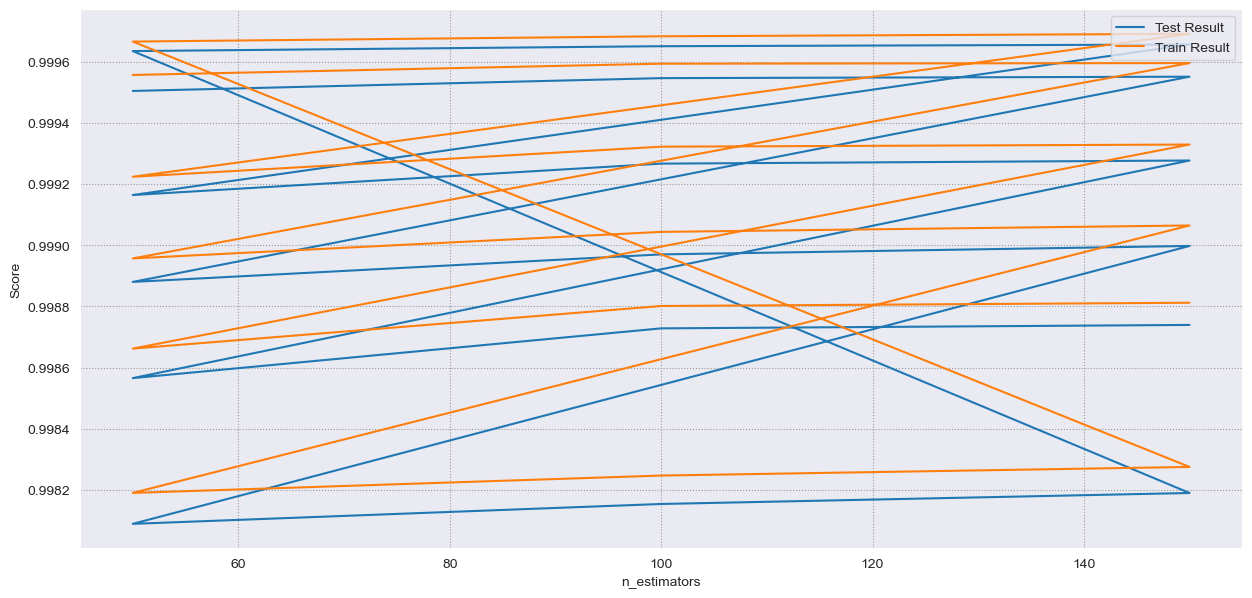

In [268]:
# Plot the train and test scores for the fitted hyperparameters

plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(rf_adasyn_cv_results['param_n_estimators'], rf_adasyn_cv_results['mean_test_score'])
plt.plot(rf_adasyn_cv_results['param_n_estimators'], rf_adasyn_cv_results['mean_train_score'])
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [269]:
#print the optimum value of hyperparameters

grid_search_rf_adasyn.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=300,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [270]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_rf_adasyn.best_score_)
print("Best hyperparameters: ", grid_search_rf_adasyn.best_params_)

Best ROC_AUC:  0.9996570639335661
Best hyperparameters:  {'criterion': 'entropy', 'min_samples_leaf': 300, 'n_estimators': 150}


In [271]:
# Let us fit the best estimator we got from Grid Search on train data

rf_best_adasyn = grid_search_rf_adasyn.best_estimator_
rf_best_adasyn.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(criterion='entropy', min_samples_leaf=300,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [272]:
# Evaluating the model on train and test data

display_scores(rf_best_adasyn)

Model: RandomForestClassifier
===== Training Data Scores =====
F1 Score: 38.74%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.24      1.00      0.39       394

    accuracy                           0.99    227845
   macro avg       0.62      1.00      0.69    227845
weighted avg       1.00      0.99      1.00    227845


===== Test Data Scores =====
F1 Score: 34.65%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.90      0.35        98

    accuracy                           0.99     56962
   macro avg       0.61      0.95      0.67     56962
weighted avg       1.00      0.99      1.00     56962



Best Threshold=0.345226



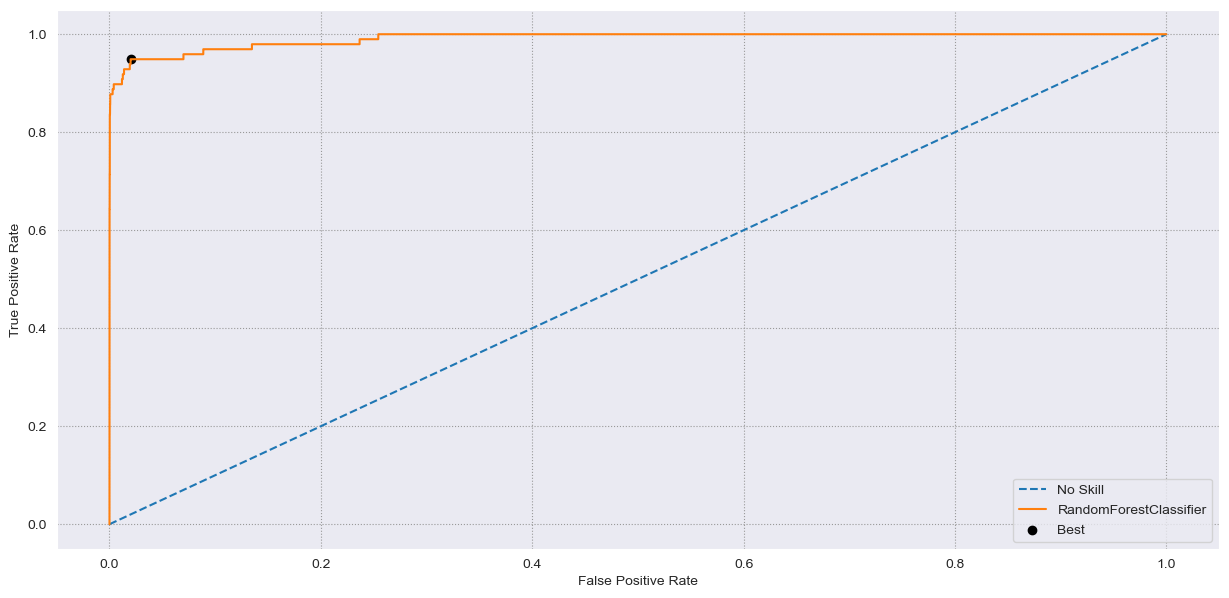

In [273]:
# Plotting the ROC AUC curve

best_rf_thresh_adasyn = plot_roc_auc_curve(rf_best_adasyn, X_test, y_test)

Model: RandomForestClassifier


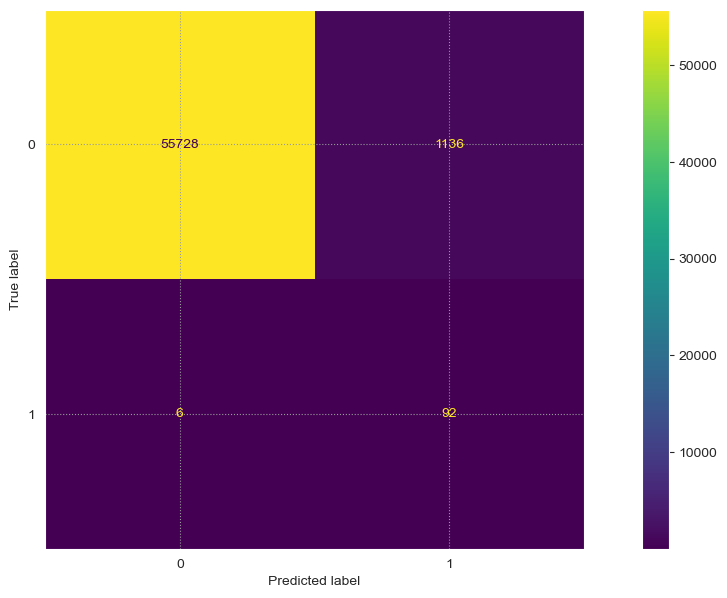

In [274]:
# Plotting the confusion matrix

plot_confusion_matrix(model=rf_best_adasyn, threshold=best_rf_thresh_adasyn)

In [275]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(rf_best_adasyn, dataset_train_type=ModelTrainDatasetType.ADASYN)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\RANDOMFORESTCLASSIFIER_ADASYN.pkl


In [276]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, rf_best_adasyn, best_thresh=best_rf_thresh_adasyn, dataset_train_type=ModelTrainDatasetType.ADASYN)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   
11      LogisticRegression                     SMOTE              0.9082   
12  DecisionTreeClassifier                     SMOTE              0.8367   
13  RandomForestClassifier                     SMOTE              0.9388   
14    KNeighborsClassifier                     SMOTE              0.8980   
15           XGBClassifier                     SMOTE              0.9286   
16      LogisticRegression                    ADASYN              0.9082   
17  DecisionTreeClassifier                    ADASYN              0.8776   
18  RandomForestClassifier                    ADASYN              0.9388   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558  
11       0.9885     0.1196    0.2114  0.9483  
12       0.9736     0.0517    0.0974  0.9052  
13       0.9748     0.0602    0.1132  0.9568  
14       0.9948     0.2304    0.3667  0.9464  
15       0.9836     0.0889    0.1622  0.9561  
16       0.9908     0.1452    0.2504  0.9495  
17       0.9670     0.0438    0.0835  0.9223  
18       0.9800     0.0749    0.1388  0.9594

## MODEL 4: KNN

In [277]:
# KNN
knn_adasyn = KNeighborsClassifier(n_jobs=-1)

# Param Grid
param_grid = {'n_neighbors': [10, 20, 30]}

# create 3 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state=MODEL_RANDOM_STATE)

grid_search_knn_adasyn = GridSearchCV(estimator=knn_adasyn, cv=folds, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, verbose=1, return_train_score=True)

In [278]:
# Fit the grid search to the data

grid_search_knn_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [10, 20, 30]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [279]:
# cross validation results of KNN model on ADASYN data

knn_adasyn_cv_results = pd.DataFrame(grid_search_knn_adasyn.cv_results_)
knn_adasyn_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.124667      0.000943       116.253775        0.588079   
1       0.146333      0.023098       117.156776        0.490272   
2       0.125667      0.003091       118.840777        0.649817   

  param_n_neighbors               params  split0_test_score  \
0                10  {'n_neighbors': 10}           0.999591   
1                20  {'n_neighbors': 20}           0.999611   
2                30  {'n_neighbors': 30}           0.999631   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999604           0.999591         0.999595        0.000006   
1           0.999631           0.999598         0.999613        0.000013   
2           0.999637           0.999611         0.999626        0.000011   

   rank_test_score  split0_train_score  split1_train_score  \
0                3                 1.0                 1.0   
1                2                 1.0                 1.0   
2                1                 1.0                 1.0   

   split2_train_score  mean_train_score  std_train_score  
0                 1.0               1.0     3.852309e-09  
1                 1.0               1.0     3.005722e-08  
2                 1.0               1.0     5.050109e-08

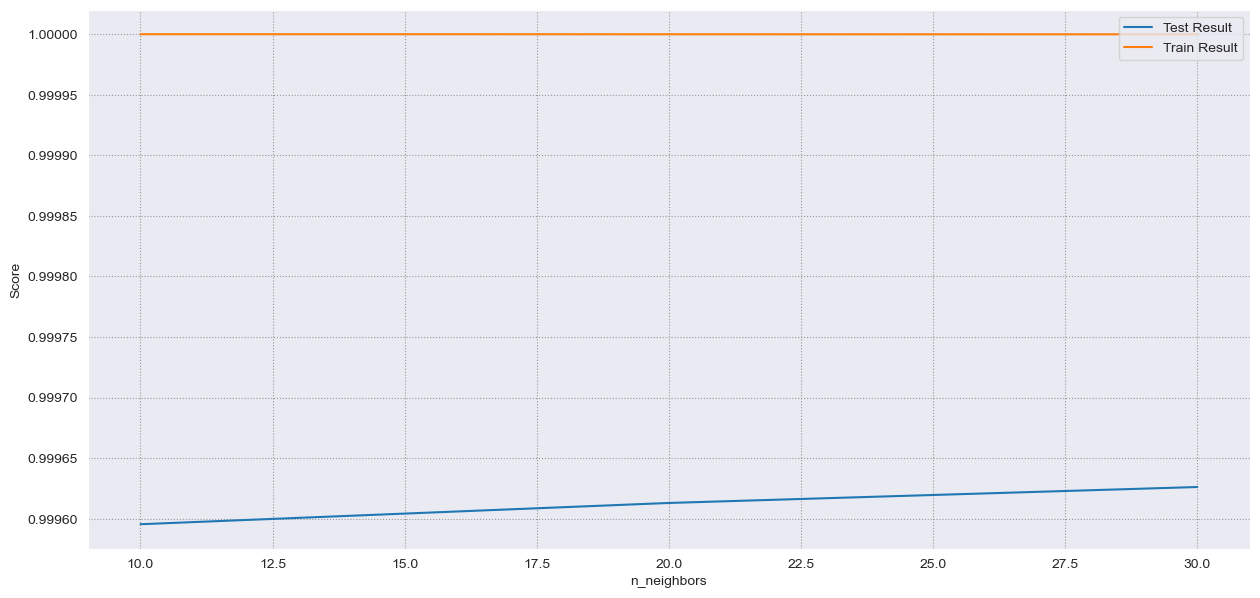

In [280]:
# Plot the train and test scores for the fitted hyperparameters

plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(knn_adasyn_cv_results['param_n_neighbors'], knn_adasyn_cv_results['mean_test_score'])
plt.plot(knn_adasyn_cv_results['param_n_neighbors'], knn_adasyn_cv_results['mean_train_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [281]:
#print the optimum value of hyperparameters

grid_search_knn_adasyn.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

In [282]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_knn_adasyn.best_score_)
print("Best hyperparameters: ", grid_search_knn_adasyn.best_params_)

Best ROC_AUC:  0.9996262190247562
Best hyperparameters:  {'n_neighbors': 30}


In [283]:
# Let us fit the best estimator we got from Grid Search on train data

knn_best_adasyn = grid_search_knn_adasyn.best_estimator_
knn_best_adasyn.fit(X_train_adasyn, y_train_adasyn)

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

In [284]:
# Evaluating the model on train and test data

display_scores(knn_best_adasyn)

Model: KNeighborsClassifier
===== Training Data Scores =====
F1 Score: 32.37%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.19      1.00      0.32       394

    accuracy                           0.99    227845
   macro avg       0.60      1.00      0.66    227845
weighted avg       1.00      0.99      1.00    227845


===== Test Data Scores =====
F1 Score: 30.82%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.90      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.95      0.65     56962
weighted avg       1.00      0.99      1.00     56962



Best Threshold=0.400000



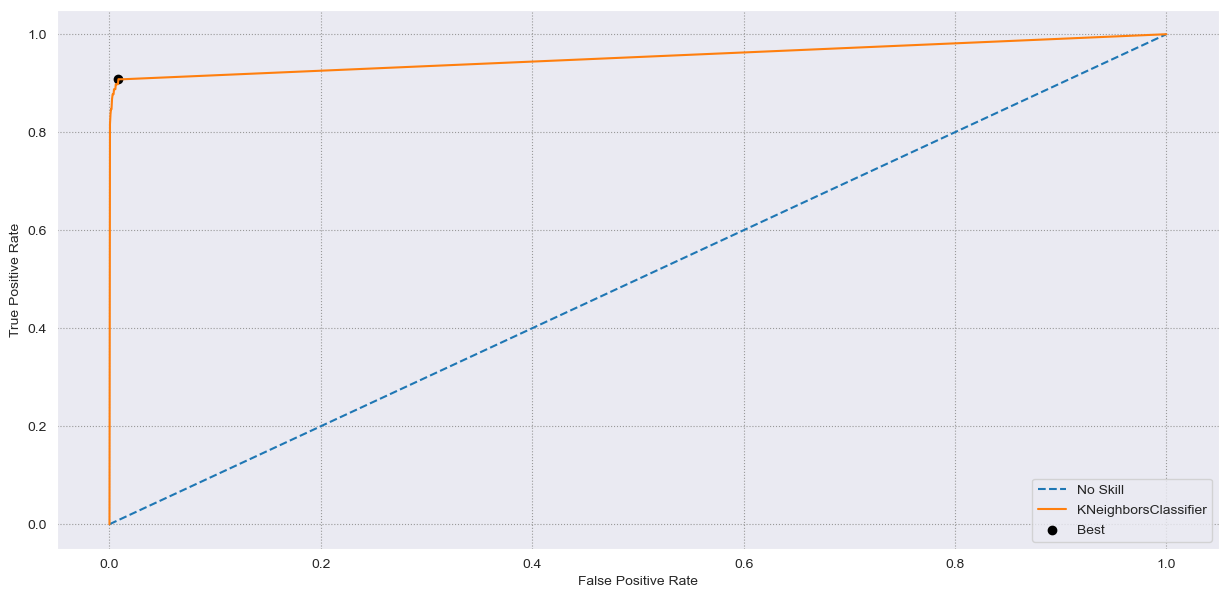

In [285]:
# Plotting the ROC AUC curve

best_knn_thresh_adasyn = plot_roc_auc_curve(knn_best_adasyn, X_test, y_test)

Model: KNeighborsClassifier


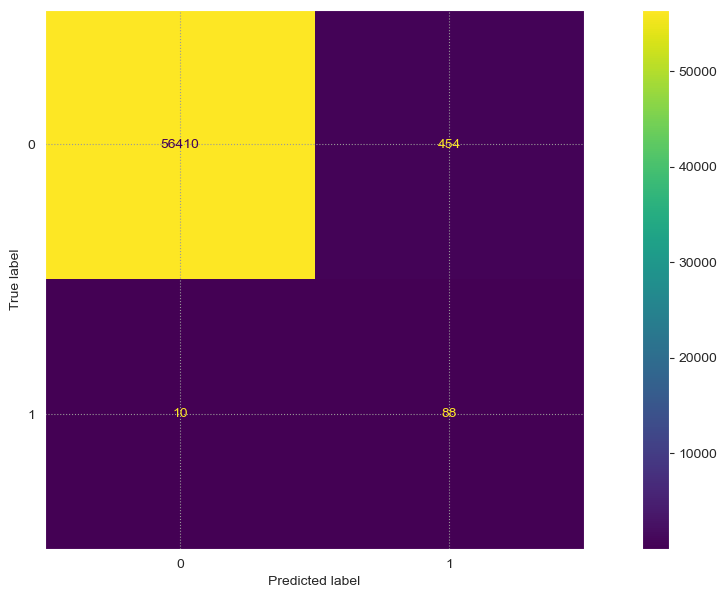

In [286]:
# Plotting the confusion matrix

plot_confusion_matrix(model=knn_best_adasyn, threshold=best_knn_thresh_adasyn)

In [287]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(knn_best_adasyn, dataset_train_type=ModelTrainDatasetType.ADASYN)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\KNEIGHBORSCLASSIFIER_ADASYN.pkl


In [288]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, knn_best_adasyn, best_thresh=best_knn_thresh_adasyn, dataset_train_type=ModelTrainDatasetType.ADASYN)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   
11      LogisticRegression                     SMOTE              0.9082   
12  DecisionTreeClassifier                     SMOTE              0.8367   
13  RandomForestClassifier                     SMOTE              0.9388   
14    KNeighborsClassifier                     SMOTE              0.8980   
15           XGBClassifier                     SMOTE              0.9286   
16      LogisticRegression                    ADASYN              0.9082   
17  DecisionTreeClassifier                    ADASYN              0.8776   
18  RandomForestClassifier                    ADASYN              0.9388   
19    KNeighborsClassifier                    ADASYN              0.8980   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558  
11       0.9885     0.1196    0.2114  0.9483  
12       0.9736     0.0517    0.0974  0.9052  
13       0.9748     0.0602    0.1132  0.9568  
14       0.9948     0.2304    0.3667  0.9464  
15       0.9836     0.0889    0.1622  0.9561  
16       0.9908     0.1452    0.2504  0.9495  
17       0.9670     0.0438    0.0835  0.9223  
18       0.9800     0.0749    0.1388  0.9594  
19       0.9920     0.1624    0.2750  0.9450

## MODEL 5: XGBOOST

In [289]:
# XGBoost Classifier
xgb_adasyn = XGBClassifier(objective='binary:logistic')

# Param Grid
param_grid = {
        'gamma': [0.03, 0.06, 0.08],
        'max_depth': [8, 10, 12, 15, 25],
        'eta': [0.01, 0.05, 0.07],
        'learning_rate': [0.10, 0.15, 0.20, 0.5]
        }

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=MODEL_RANDOM_STATE)

grid_search_xgb_adasyn = GridSearchCV(estimator=xgb_adasyn, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, return_train_score=True)

In [290]:
# Fit the grid search to the data

grid_search_xgb_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.01, 0.05, 0.07], 'gamma': [0.03, 0.06, 0.08],
                         'learning_rate': [0.1, 0.15, 0.2, 0.5],
                         'max_depth': [8, 10, 12, 15, 25]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [291]:
# cross validation results of XGBoost model on ADASYN data

xgb_adasyn_cv_results = pd.DataFrame(grid_search_xgb_adasyn.cv_results_)
xgb_adasyn_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta  \
0        17.959817      2.700765         0.507401        0.056013      0.01   
1        20.693020      3.532933         0.638401        0.141455      0.01   
2        26.058824      3.569302         0.732601        0.135216      0.01   
3        23.839422      2.393256         0.746001        0.102120      0.01   
4        27.779026      3.228324         0.939801        0.196818      0.01   
..             ...           ...              ...             ...       ...   
175      10.542210      2.233055         0.275601        0.021988      0.07   
176      11.920212      0.694791         0.293799        0.061134      0.07   
177       9.128008      0.088898         0.299600        0.040825      0.07   
178       9.257809      0.367771         0.207400        0.044509      0.07   
179       7.891208      0.338711         0.187800        0.005269      0.07   

    param_gamma param_learning_rate param_max_depth  \
0          0.03                 0.1               8   
1          0.03                 0.1              10   
2          0.03                 0.1              12   
3          0.03                 0.1              15   
4          0.03                 0.1              25   
..          ...                 ...             ...   
175        0.08                 0.5               8   
176        0.08                 0.5              10   
177        0.08                 0.5              12   
178        0.08                 0.5              15   
179        0.08                 0.5              25   

                                                params  split0_test_score  \
0    {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           0.999985   
1    {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           0.999997   
2    {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           1.000000   
3    {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           1.000000   
4    {'eta': 0.01, 'gamma': 0.03, 'learning_rate': ...           1.000000   
..                                                 ...                ...   
175  {'eta': 0.07, 'gamma': 0.08, 'learning_rate': ...           1.000000   
176  {'eta': 0.07, 'gamma': 0.08, 'learning_rate': ...           1.000000   
177  {'eta': 0.07, 'gamma': 0.08, 'learning_rate': ...           1.000000   
178  {'eta': 0.07, 'gamma': 0.08, 'learning_rate': ...           1.000000   
179  {'eta': 0.07, 'gamma': 0.08, 'learning_rate': ...           1.000000   

     ...  mean_test_score  std_test_score  rank_test_score  \
0    ...         0.999970        0.000022              178   
1    ...         0.999981        0.000015              166   
2    ...         0.999987        0.000010              139   
3    ...         0.999987        0.000010              145   
4    ...         0.999991        0.000008               67   
..   ...              ...             ...              ...   
175  ...         0.999994        0.000008               10   
176  ...         0.999988        0.000011              133   
177  ...         0.999992        0.000009               37   
178  ...         0.999991        0.000009              100   
179  ...         0.999992        0.000009               52   

     split0_train_score  split1_train_score  split2_train_score  \
0              0.999996                 1.0            0.999999   
1              1.000000                 1.0            1.000000   
2              1.000000                 1.0            1.000000   
3              1.000000                 1.0            1.000000   
4              1.000000                 1.0            1.000000   
..                  ...                 ...                 ...   
175            1.000000                 1.0            1.000000   
176            1.000000                 1.0            1.000000   
177            1.000000                 1.0            1.000000   
178            1.000000                 1.0            

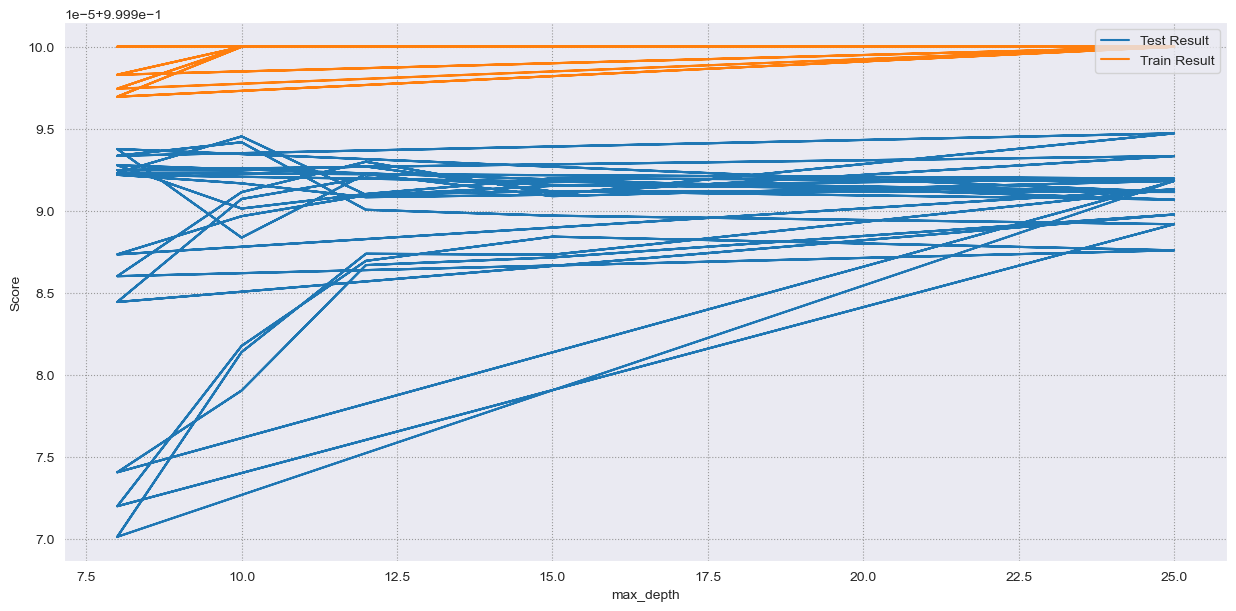

In [292]:
# Plot the train and test scores for the fitted hyperparameters

plt.figure(figsize=SNS_DEFAULT_FIG_SIZE)
plt.plot(xgb_adasyn_cv_results['param_max_depth'], xgb_adasyn_cv_results['mean_test_score'])
plt.plot(xgb_adasyn_cv_results['param_max_depth'], xgb_adasyn_cv_results['mean_train_score'])
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(['Test Result', 'Train Result'], loc='upper right')
plt.show()

In [293]:
#print the optimum value of hyperparameters

grid_search_xgb_adasyn.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=0.06, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=25,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [294]:
# print best hyperparameters

print("Best ROC_AUC: ", grid_search_xgb_adasyn.best_score_)
print("Best hyperparameters: ", grid_search_xgb_adasyn.best_params_)

Best ROC_AUC:  0.9999947243374478
Best hyperparameters:  {'eta': 0.01, 'gamma': 0.06, 'learning_rate': 0.2, 'max_depth': 25}


In [295]:
# Let us fit the best estimator we got from Grid Search on train data

xgb_best_adasyn = grid_search_xgb_adasyn.best_estimator_
xgb_best_adasyn.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=0.06, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=25,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [296]:
# Evaluating the model on train and test data

display_scores(xgb_best_adasyn)

Model: XGBClassifier
===== Training Data Scores =====
F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845


===== Test Data Scores =====
F1 Score: 84.73%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.88      0.85        98

    accuracy                           1.00     56962
   macro avg       0.91      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Best Threshold=0.000576



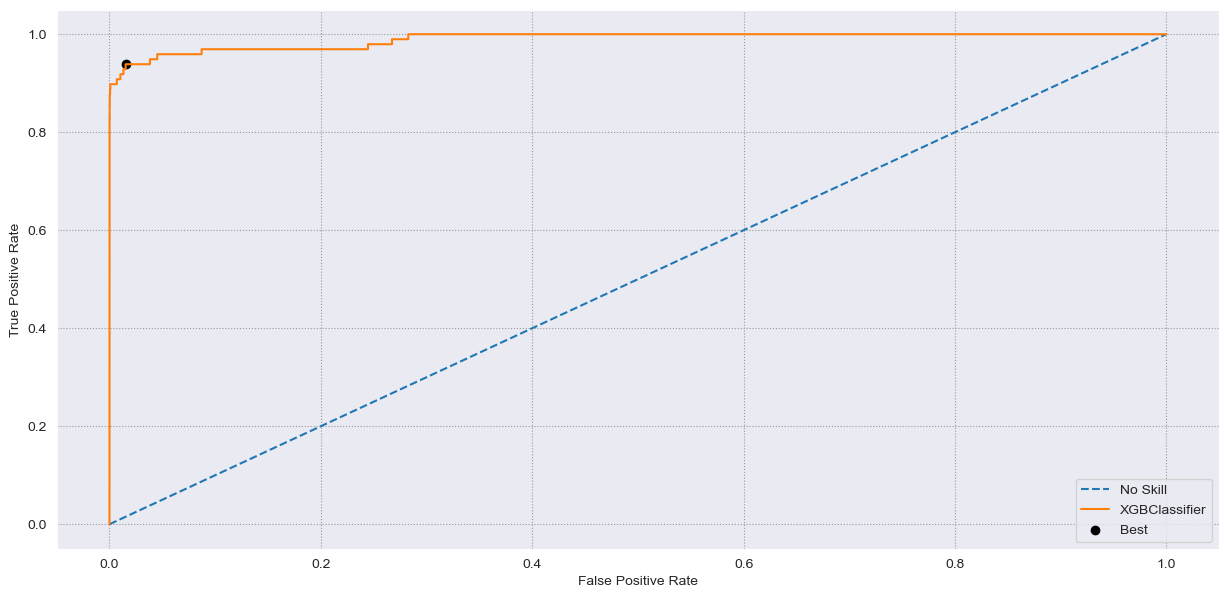

In [297]:
# Plotting the ROC AUC curve

best_xgb_thresh_adasyn = plot_roc_auc_curve(xgb_best_adasyn, X_test, y_test)

Model: XGBClassifier


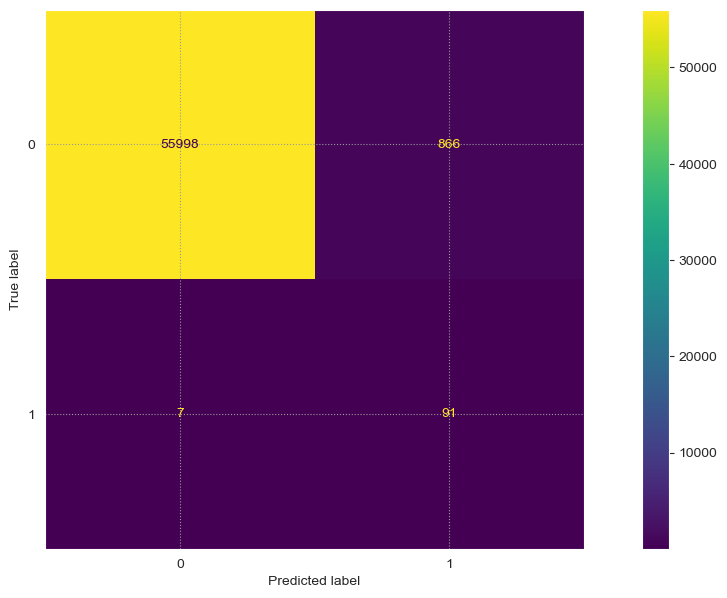

In [298]:
# Plotting the confusion matrix

plot_confusion_matrix(model=xgb_best_adasyn, threshold=best_xgb_thresh_adasyn)

In [299]:
# Lets us save the model in google drive so we can reuse it later without the need of retraining

save_model_to_my_drive(xgb_best_adasyn, dataset_train_type=ModelTrainDatasetType.ADASYN)

Model successfully saved in D:/upGrad Masters/Course 10 - Capstone Project (Model Building for Fraud Detection)\Saved Models\XGBCLASSIFIER_ADASYN.pkl


In [300]:
# Let us store the model results in the master results dataframe

model_results_master_df = add_model_results_to_master_df(model_results_master_df, xgb_best_adasyn, best_thresh=best_xgb_thresh_adasyn, dataset_train_type=ModelTrainDatasetType.ADASYN)
model_results_master_df

Model Dataset_Balance_Technique  Recall/Sensitivity  \
0       LogisticRegression                Imbalanced              0.9184   
1                      SVC                Imbalanced              0.8980   
2   DecisionTreeClassifier                Imbalanced              0.8163   
3   RandomForestClassifier                Imbalanced              0.9184   
4     KNeighborsClassifier                Imbalanced              0.8673   
5            XGBClassifier                Imbalanced              0.8980   
6       LogisticRegression       Random Oversampling              0.8980   
7   DecisionTreeClassifier       Random Oversampling              0.8776   
8   RandomForestClassifier       Random Oversampling              0.9388   
9     KNeighborsClassifier       Random Oversampling              0.8776   
10           XGBClassifier       Random Oversampling              0.9286   
11      LogisticRegression                     SMOTE              0.9082   
12  DecisionTreeClassifier                     SMOTE              0.8367   
13  RandomForestClassifier                     SMOTE              0.9388   
14    KNeighborsClassifier                     SMOTE              0.8980   
15           XGBClassifier                     SMOTE              0.9286   
16      LogisticRegression                    ADASYN              0.9082   
17  DecisionTreeClassifier                    ADASYN              0.8776   
18  RandomForestClassifier                    ADASYN              0.9388   
19    KNeighborsClassifier                    ADASYN              0.8980   
20           XGBClassifier                    ADASYN              0.9286   

    Specificity  Precision  F1_Score     AUC  
0        0.9843     0.0915    0.1664  0.9513  
1        0.9822     0.0798    0.1465  0.9401  
2        0.9976     0.3670    0.5063  0.9069  
3        0.9849     0.0948    0.1719  0.9516  
4        0.9991     0.6296    0.7296  0.9332  
5        0.9984     0.4862    0.6308  0.9482  
6        0.9909     0.1450    0.2496  0.9444  
7        0.9942     0.2067    0.3346  0.9359  
8        0.9699     0.0509    0.0966  0.9543  
9        0.9988     0.5584    0.6825  0.9382  
10       0.9830     0.0858    0.1572  0.9558  
11       0.9885     0.1196    0.2114  0.9483  
12       0.9736     0.0517    0.0974  0.9052  
13       0.9748     0.0602    0.1132  0.9568  
14       0.9948     0.2304    0.3667  0.9464  
15       0.9836     0.0889    0.1622  0.9561  
16       0.9908     0.1452    0.2504  0.9495  
17       0.9670     0.0438    0.0835  0.9223  
18       0.9800     0.0749    0.1388  0.9594  
19       0.9920     0.1624    0.2750  0.9450  
20       0.9848     0.0951    0.1725  0.9567

### Visualisation of performance metrics of all models

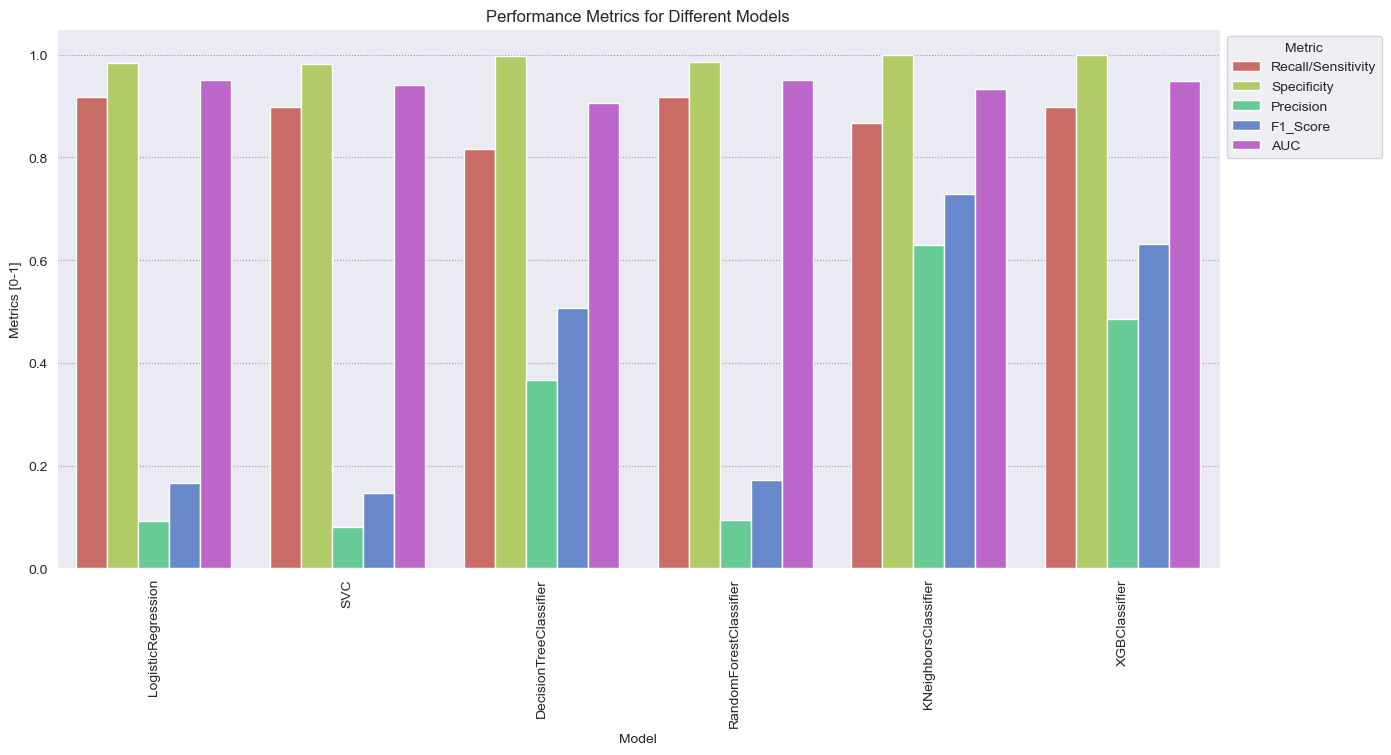

In [307]:
# Let us plot a bar plot to visualise the performace metrics of all the models we trained on IMBALANCED data

plot_performance_metrics_all_models(model_results_master_df, 
                                    balancing_technique=ModelTrainDatasetType.IMBALANCED)

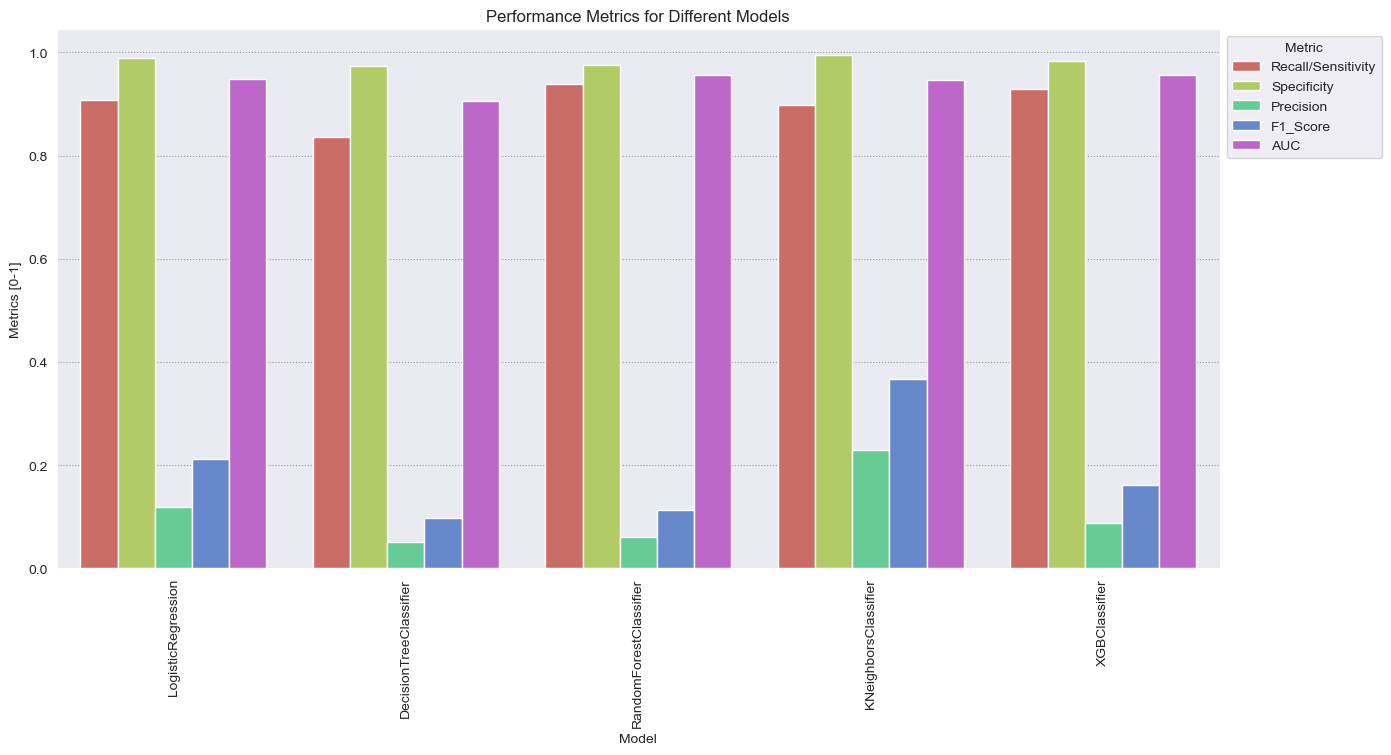

In [302]:
# Let us plot a bar plot to visualise the performace metrics of all the models we trained on RANDOM OVERSAMPLED data

plot_performance_metrics_all_models(model_results_master_df, 
                                    balancing_technique=ModelTrainDatasetType.SMOTE)

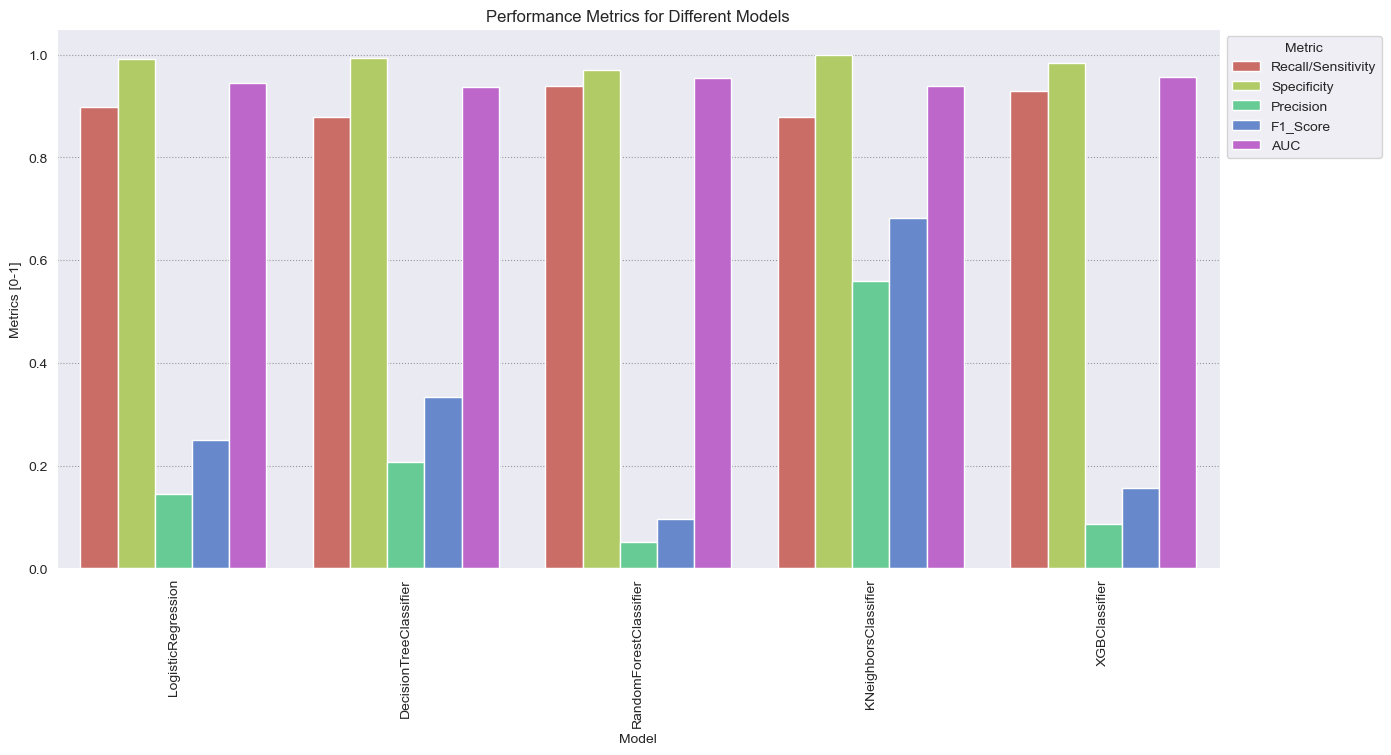

In [303]:
# Let us plot a bar plot to visualise the performace metrics of all the models we trained on SMOTE data

plot_performance_metrics_all_models(model_results_master_df, 
                                    balancing_technique=ModelTrainDatasetType.RANDOM_OVERSAMPLING)

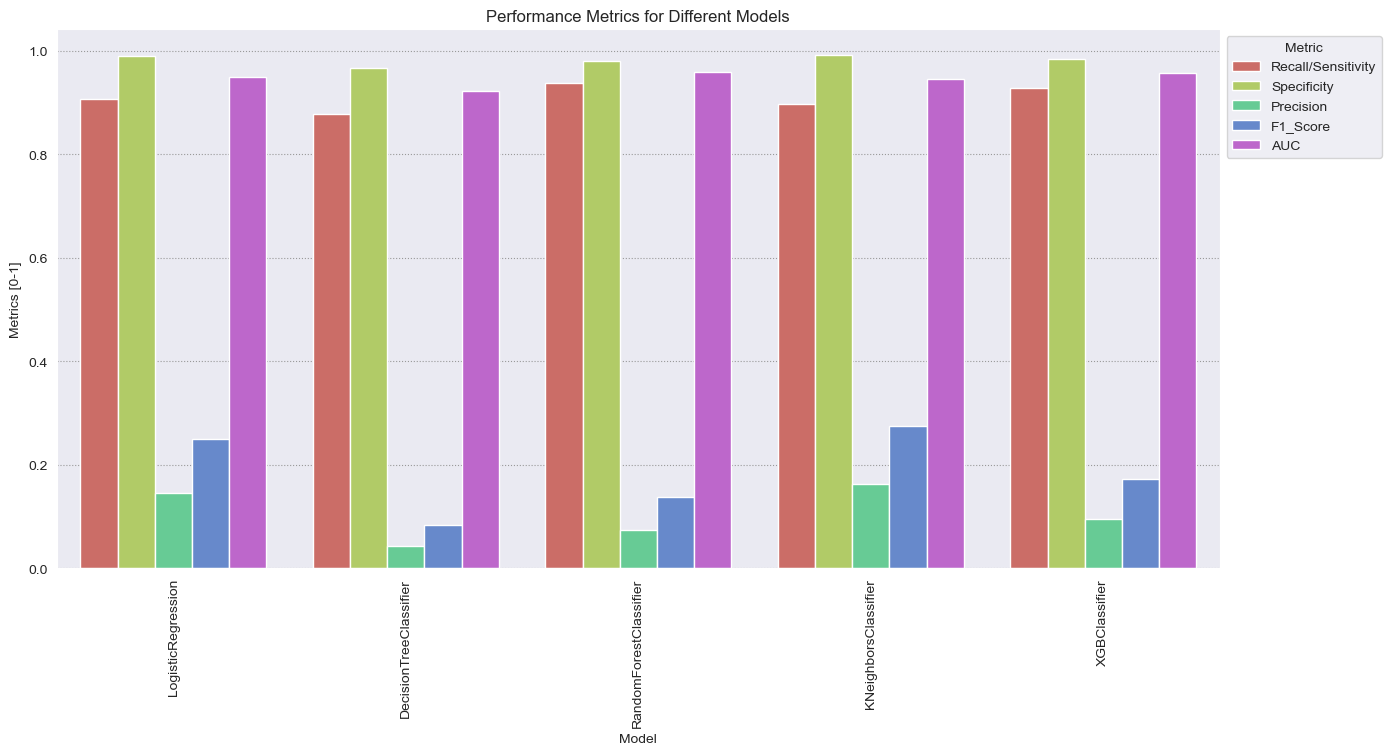

In [304]:
# Let us plot a bar plot to visualise the performace metrics of all the models we trained on ADASYN data

plot_performance_metrics_all_models(model_results_master_df, 
                                    balancing_technique=ModelTrainDatasetType.ADASYN)

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

__The best oversampling technique with a good balance of AUC and recall metrics will be ADASYN as evident from the results above and the best model trained on ADASYN balanced data is the XGBoost classifier__

In [305]:
# perform the best oversampling method on X_train & y_train

clf = grid_search_xgb_adasyn.best_estimator_  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn) # fit on the balanced dataset

y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

threshold = thresholds[np.argmax(tpr-fpr)]
print("Best Threshold",threshold)
y_pred = clf.predict(X_test)
y_class = list(map(lambda x: 1 if x > threshold else 0,y_pred_prob))
print("Test AUC : ",round(roc_auc_score(y_test, y_class),4))

Best Threshold 0.0005762628
Test AUC :  0.9567


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


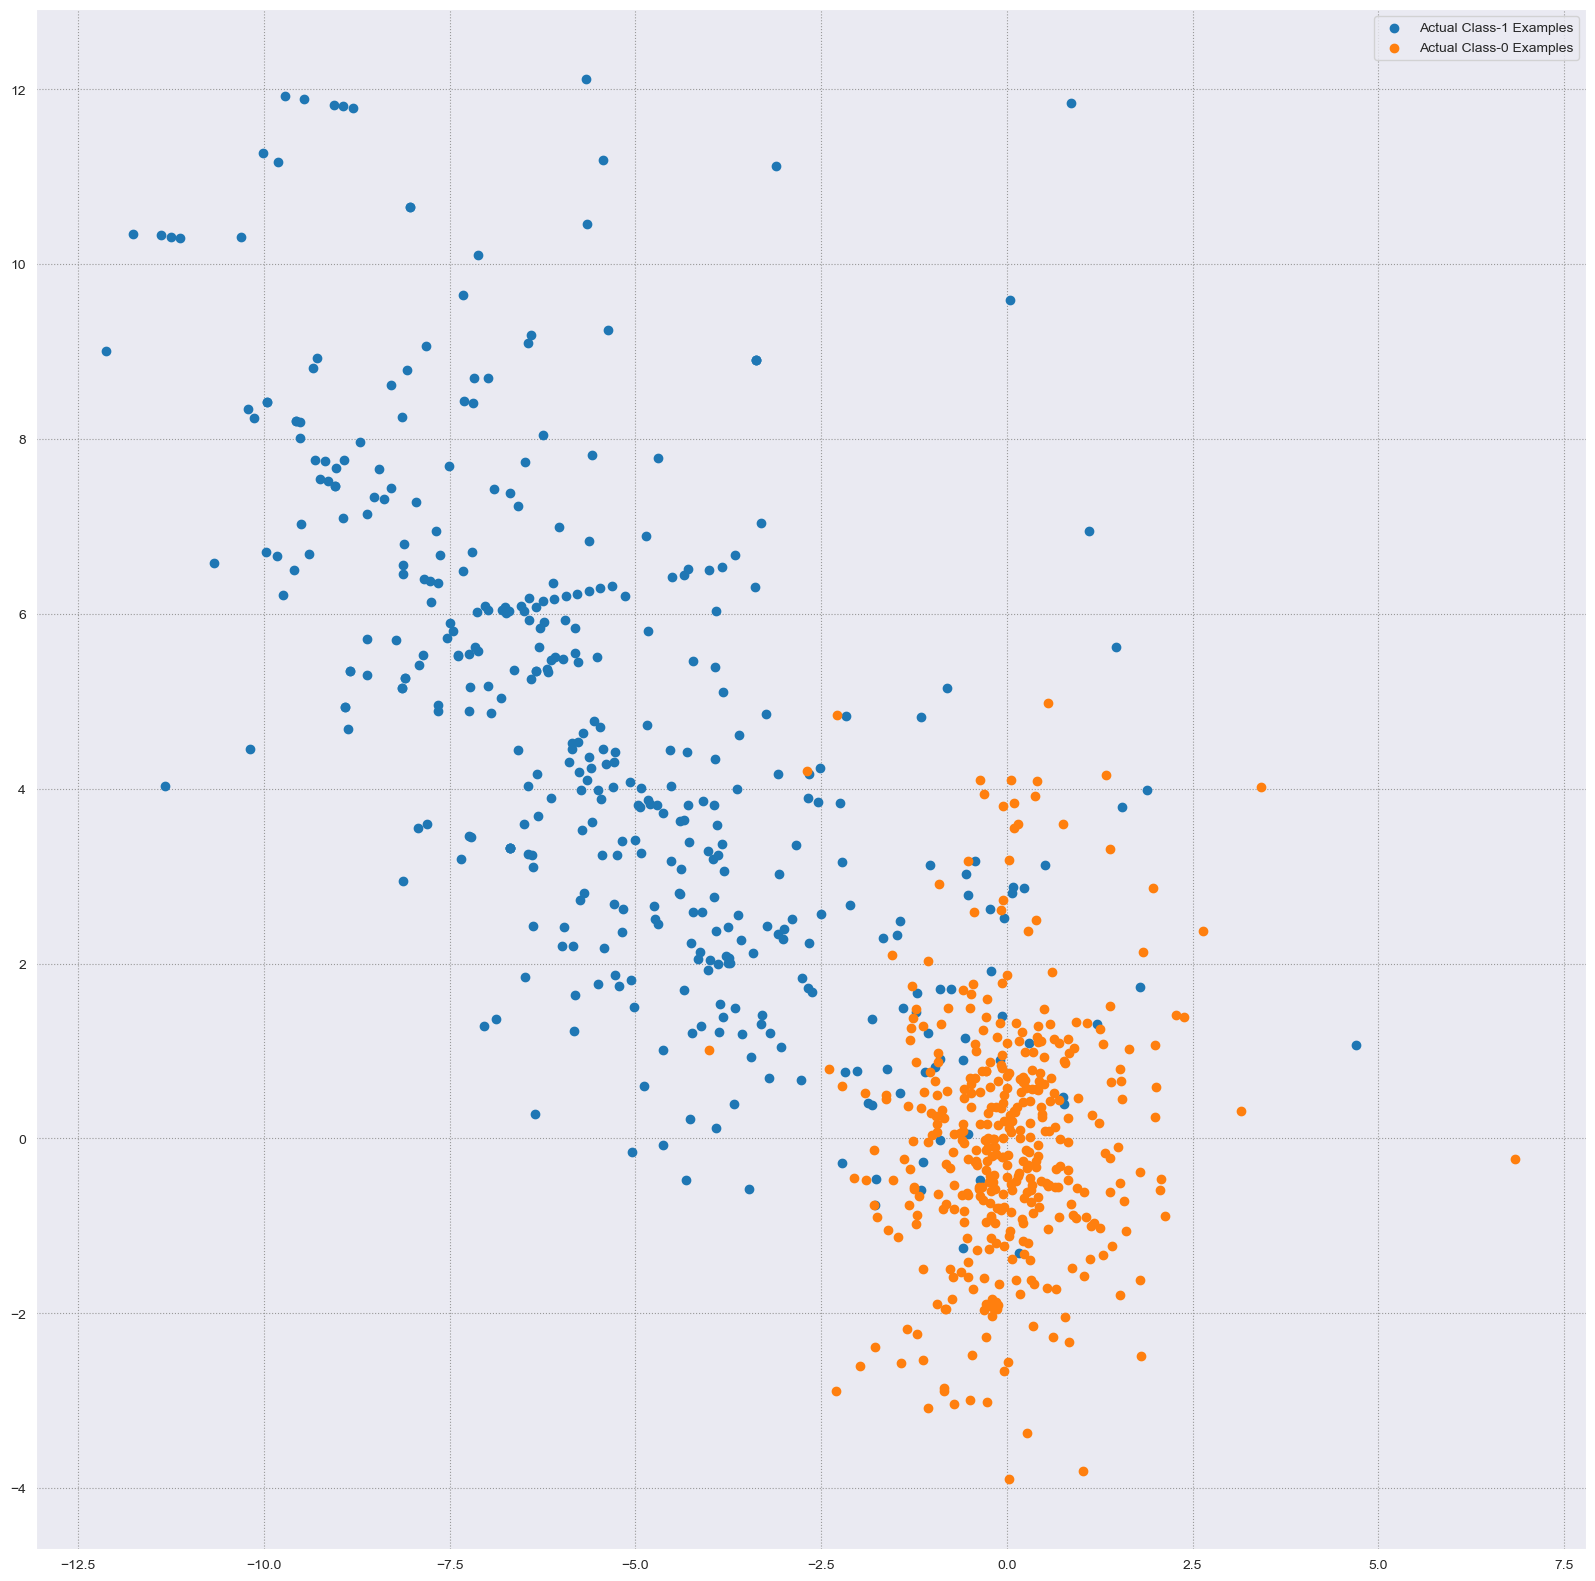

In [306]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

### CONCLUSION:

From the results (model_results_master_df), the __XGBClassifier with the ADASYN (Adaptive Synthetic Sampling)__ balance technique performs well across multiple metrics. XGB ADASYN will be considered the best model overall for credit card fraud detection as infered below:

1. **High Sensitivity (Recall):**
   - The XGBClassifier with ADASYN consistently shows high sensitivity, suggesting that it is effective in identifying instances of the minority class (fraudulent transactions). High sensitivity is crucial in fraud detection because it minimizes the number of false negatives, ensuring that actual fraudulent transactions are not overlooked.

2. **Balanced Specificity:**
   - While focusing on sensitivity, XGB ADASYN maintains a reasonable level of specificity. Balanced specificity is important to avoid classifying too many non-fraudulent transactions as fraudulent (minimizing false positives), which is critical in real-world applications to prevent inconveniencing legitimate users.

3. **Trade-off Between Precision and Recall:**
   - Credit card fraud detection often involves a trade-off between precision and recall. XGB ADASYN might strike a balance by achieving high recall while still maintaining a reasonable level of precision. This is essential to minimize both false negatives and false positives.

4. **ADASYN's Adaptive Sampling:**
   - The adaptive nature of ADASYN, which adjusts synthetic sample generation based on the difficulty of learning certain instances, can contribute to a diverse and well-distributed dataset. This adaptability may improve the model's generalization performance on the minority class, making it more robust.

5. **Ensemble Nature of XGBoost:**
   - XGBoost (Extreme Gradient Boosting) is an ensemble learning method that combines the predictions of multiple weak learners (trees) to form a strong learner. This ensemble nature often leads to improved performance and robustness, making XGB well-suited for complex tasks like fraud detection.

6. **Consistent Performance Across Techniques:**
   - The XGBClassifier appears to perform well across various balance techniques, including ADASYN. Consistency in performance indicates that the model is adaptable to different aspects of the data and balance techniques.